In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
def ryan_initweight(topo):
    np.random.seed(1)
    params = {}
    for i in range(1, len(topo)):
        params['W' + str(i)] = 0.01*np.random.randn(topo[i], topo[i-1])
        params['b' + str(i)] = 0.01*np.zeros(shape=(topo[i], 1))
    return params

def ryan_onehot(labels):
    labels = labels.as_matrix()
    temp = []
    for val in labels:
        if val not in temp:
            temp.append(val)
    temp.sort()
    
    result = np.zeros(shape=(len(labels),len(temp)))
    for key, val in enumerate(labels):
        result[key][temp.index(val)] = 1
    return result

def ryan_sigmoid(Z):
    A = 1.0/(1 + np.exp(-1*Z))
    return A

def ryan_cal_Z(W,b,A):
    Z = np.dot(W, A) + b
    cache = [A,W,b,Z]
    return Z, cache

def ryan_forward(X, params, predict = 0):
    caches = []
    A = X
    for i in range(int(len(params)//2)):
        if predict == 0:
            Z, cache = ryan_cal_Z(params['W' + str(i+1)], params['b' + str(i+1)], A)
            A = ryan_sigmoid(Z)
            caches.append(cache)
        else:
            Z,_ = ryan_cal_Z(params['W' + str(i+1)], params['b' + str(i+1)], A)
            A = ryan_sigmoid(Z)
    return A, caches

def ryan_cost_func(lastA, Y):
    t1 = np.multiply(Y, np.log(lastA))
    t2 = np.multiply(1.0 - Y, np.log(1.0 - lastA))
    cost = (-1.0/Y.shape[1]) * np.sum(t1 + t2)
    return cost

def ryan_cal_grads(dZ, cache):
    m = cache[0].shape[1]
    dW = np.dot(dZ, cache[0].T)/m
    db = np.sum(dZ, axis=1, keepdims=True)/m
    dA = np.dot(cache[1].T, dZ)
    
    return dA, dW, db
    
def ryan_sigmoid_back(dA, Z):
    temp = 1.0/(1 + np.exp(-1*Z))
    dZ = np.multiply(dA, np.multiply(temp, (np.subtract(np.ones(temp.shape), temp))))
    return dZ

def ryan_backward(lastA, Y, caches):
    m = Y.shape[1]
    L = len(caches)
    grads = {}
    temp1, temp2, temp3 = 0, 0, 0
    temp1 = np.divide(1 - Y, 1 - lastA) - np.divide(Y, lastA)
    for i in reversed(range(L)):
        current_cache = caches[i]
        dZ = ryan_sigmoid_back(temp1, current_cache[-1])
        temp1, temp2, temp3 = ryan_cal_grads(dZ, current_cache[0:-1])
        grads["dA" + str(i + 1)] = temp1
        grads["dW" + str(i + 1)] = temp2
        grads["db" + str(i + 1)] = temp3

    return grads

def ryan_update_params(params, grads, learning_rate):
    for i in range(int(len(params)//2)):
        params["W" + str(i + 1)] = params["W" + str(i + 1)] - learning_rate * grads["dW" + str(i + 1)]
        params["b" + str(i + 1)] = params["b" + str(i + 1)] - learning_rate * grads["db" + str(i + 1)]
        
    return params

def ryan_gd(X, Y, topo, learning_rate=0.01, iters=5000):
    params = ryan_initweight(topo)
    costs = []
    for i in range(iters):
        lastA, caches = ryan_forward(X, params)
        cost = ryan_cost_func(lastA, Y)
        grads = ryan_backward(lastA, Y, caches)
        params = ryan_update_params(params, grads, learning_rate)
        
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if i % 50 == 0:
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.show()
    
    return params

def ryan_softmax_predict(X, Y, params):
    lastA,_ = ryan_forward(X, params, predict = 1)
    labels = Y.as_matrix()
    count = 0.0
    softmax_prob = np.zeros(lastA.T.shape)
    pred = []
    
    # softmax with probability
    for i in range(lastA.T.shape[0]):
        temp = np.exp(lastA.T[i])
        softmax_prob[i] = temp/np.sum(temp)
    
    # make prediction
    for i in range(labels.shape[0]):
        pred.append(np.argmax(softmax_prob[i]))
        if(np.argmax(softmax_prob[i]) != labels[i]):
            count += 1
    
    return softmax_prob, pred, 1.0 - count/labels.shape[0]

In [8]:
df_train = pd.read_csv('ex3_train.csv.xls');
df_test = pd.read_csv('ex3_test.csv.xls');

In [9]:
X_train = df_train.iloc[:,0:400].T
Y_train = ryan_onehot(df_train['y']).T
Y_train1 = df_train['y']

X_test = df_test.iloc[:,0:400].T
Y_test = df_test['y']

Cost after iteration 0: 6.971709
Cost after iteration 500: 0.656990
Cost after iteration 1000: 0.432211
Cost after iteration 1500: 0.334683


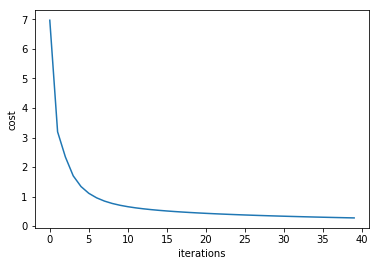

Train accuracy: 0.9691428571428572
Test accuracy: 0.9286666666666666


In [10]:
topo = [400, 25, 10]
learning_rate = 0.6
iterations = 2000
optimize = ryan_gd(X_train, Y_train, topo, learning_rate, iterations)

_, _, accuracy = ryan_softmax_predict(X_train, Y_train1, optimize)
_, _, accuracy1 = ryan_softmax_predict(X_test, Y_test, optimize)
print("Train accuracy: " + str(accuracy))
print("Test accuracy: " + str(accuracy1))

[[-0.6976269  -0.69748612 -0.69803731 ..., -0.         -0.69761847
  -0.6979676 ]
 [-0.67807911 -0.67864907 -0.67903968 ..., -0.67875733 -0.67849807
  -0.67848946]
 [-0.68543119 -0.68552992 -0.68561632 ..., -0.68546444 -0.6848794  -0.        ]
 ..., 
 [-0.70085079 -0.70052315 -0.         ..., -0.70071941 -0.69981954
  -0.70051792]
 [-0.69601522 -0.69582543 -0.6958007  ..., -0.69615811 -0.6959086
  -0.69567535]
 [-0.69210098 -0.         -0.69290774 ..., -0.69282988 -0.69186089
  -0.69267012]]
Cost after iteration 0: 6.971709
[[-0.26882295 -0.2693748  -0.26921254 ..., -0.         -0.26903858
  -0.27146111]
 [-0.26696433 -0.26778947 -0.26756206 ..., -0.26742426 -0.26733047
  -0.26951704]
 [-0.27046946 -0.27112577 -0.2707548  ..., -0.27067715 -0.27040378 -0.        ]
 ..., 
 [-0.27017534 -0.27059098 -0.         ..., -0.27021598 -0.26982924
  -0.27245055]
 [-0.27113419 -0.27164476 -0.27120334 ..., -0.27136736 -0.27127918
  -0.27342355]
 [-0.26916427 -0.         -0.26969824 ..., -0.26962744 

[[-0.11388313 -0.10147544 -0.10171755 ..., -0.         -0.10257629
  -0.10623163]
 [-0.10926644 -0.096848   -0.09706674 ..., -0.09377162 -0.09779152
  -0.10135123]
 [-0.11829468 -0.10568329 -0.1058522  ..., -0.10239865 -0.10639101 -0.        ]
 ..., 
 [-0.11226035 -0.09992026 -0.         ..., -0.09658665 -0.10043399
  -0.1043487 ]
 [-0.11895944 -0.1063656  -0.10641756 ..., -0.1031855  -0.10738763
  -0.11100122]
 [-0.11401128 -0.         -0.1018866  ..., -0.09831177 -0.10238146
  -0.10618143]]
[[-0.11382064 -0.10146255 -0.10170056 ..., -0.         -0.10259939
  -0.10621737]
 [-0.10929756 -0.09691075 -0.09712776 ..., -0.093891   -0.09788089
  -0.10140768]
 [-0.11826993 -0.10571116 -0.10587523 ..., -0.10248403 -0.10643559 -0.        ]
 ..., 
 [-0.11225283 -0.09996943 -0.         ..., -0.09667553 -0.10048547
  -0.10437828]
 [-0.11892424 -0.10638666 -0.10643027 ..., -0.10326878 -0.1074385
  -0.11101361]
 [-0.1139964  -0.         -0.10192393 ..., -0.09839027 -0.10243376
  -0.1062032 ]]
[[-0.

[[-0.11264002 -0.10125916 -0.10137747 ..., -0.         -0.10356062
  -0.10622389]
 [-0.1095716  -0.09793121 -0.09828571 ..., -0.09591489 -0.09940294
  -0.10217536]
 [-0.11763577 -0.10631193 -0.10630396 ..., -0.10431611 -0.10721236 -0.        ]
 ..., 
 [-0.11181939 -0.10126164 -0.         ..., -0.09800489 -0.10111187
  -0.10471837]
 [-0.11800504 -0.10674763 -0.10661659 ..., -0.10507844 -0.10854856
  -0.11120816]
 [-0.11350355 -0.         -0.10310657 ..., -0.09950567 -0.10322439
  -0.1064742 ]]
[[-0.11260378 -0.10125205 -0.10135958 ..., -0.         -0.10363922
  -0.10624692]
 [-0.10956041 -0.09795038 -0.09832283 ..., -0.09596208 -0.09944121
  -0.10218009]
 [-0.11760712 -0.10633579 -0.10631309 ..., -0.10440203 -0.10723762 -0.        ]
 ..., 
 [-0.11178723 -0.10133407 -0.         ..., -0.09802113 -0.10110847
  -0.10471376]
 [-0.11796063 -0.10675623 -0.10661738 ..., -0.10516512 -0.10860123
  -0.11121483]
 [-0.11347587 -0.         -0.10318376 ..., -0.09951532 -0.10323731
  -0.10647424]]
[[-0

[[-0.11257421 -0.10081259 -0.10007816 ..., -0.         -0.10809652
  -0.10808362]
 [-0.10825071 -0.0971131  -0.0986342  ..., -0.09469533 -0.09903174
  -0.10107486]
 [-0.11702499 -0.10663727 -0.10569805 ..., -0.10736628 -0.10773014 -0.        ]
 ..., 
 [-0.11047808 -0.10427322 -0.         ..., -0.09607094 -0.09961393
  -0.10365134]
 [-0.11675189 -0.10647407 -0.10613761 ..., -0.10807738 -0.1103246
  -0.11138627]
 [-0.11260831 -0.         -0.10671353 ..., -0.09757425 -0.10248907
  -0.10592034]]
[[-0.11262907 -0.10075936 -0.09994184 ..., -0.         -0.10848114
  -0.10824973]
 [-0.10812061 -0.09698887 -0.09861289 ..., -0.09446535 -0.09892477
  -0.10094968]
 [-0.11700676 -0.10662559 -0.10560427 ..., -0.10756049 -0.1077479  -0.        ]
 ..., 
 [-0.11038335 -0.10449927 -0.         ..., -0.09582077 -0.09945535
  -0.10353975]
 [-0.11668584 -0.10642264 -0.10607841 ..., -0.10825557 -0.11043186
  -0.11139347]
 [-0.11255468 -0.         -0.10699861 ..., -0.09733095 -0.10238238
  -0.10585684]]
[[-0.

[[-0.11624571 -0.09553025 -0.09066428 ..., -0.         -0.12558854
  -0.11461317]
 [-0.10104795 -0.08976892 -0.09633083 ..., -0.08150025 -0.09240611
  -0.09488955]
 [-0.11697912 -0.10405816 -0.09901231 ..., -0.1136879  -0.10755967 -0.        ]
 ..., 
 [-0.10621555 -0.11590789 -0.         ..., -0.08322006 -0.09179674
  -0.09767624]
 [-0.11435426 -0.10258079 -0.10238753 ..., -0.11275484 -0.11385489
  -0.11126852]
 [-0.11038744 -0.         -0.12155699 ..., -0.08442206 -0.0962457
  -0.10220514]]
[[-0.11650835 -0.09499301 -0.08985727 ..., -0.         -0.12674611
  -0.11495267]
 [-0.10047263 -0.08919076 -0.09610565 ..., -0.08057425 -0.09190494
  -0.09445525]
 [-0.11699934 -0.10377413 -0.09842954 ..., -0.11399723 -0.10749439 -0.        ]
 ..., 
 [-0.10590235 -0.1168211  -0.         ..., -0.0823524  -0.09124802
  -0.09721247]
 [-0.11419646 -0.1022368  -0.1020804  ..., -0.11293065 -0.11404969
  -0.1112412 ]
 [-0.1102273  -0.         -0.12272492 ..., -0.08349883 -0.09576773
  -0.10190135]]
[[-0.

[[-0.12167854 -0.07342776 -0.06313084 ..., -0.         -0.15925479
  -0.1182328 ]
 [-0.07738474 -0.06684721 -0.08338358 ..., -0.05310281 -0.07393056
  -0.07924003]
 [-0.11742462 -0.09043176 -0.07553117 ..., -0.11717621 -0.10196799 -0.        ]
 ..., 
 [-0.09326546 -0.15306137 -0.         ..., -0.05843688 -0.07304919
  -0.07818088]
 [-0.10762413 -0.08841426 -0.09069244 ..., -0.1146409  -0.11991682
  -0.10988223]
 [-0.1034301  -0.         -0.1701383  ..., -0.05716971 -0.07891627
  -0.08854497]]
[[-0.12171698 -0.07224657 -0.06187082 ..., -0.         -0.16066064
  -0.11800908]
 [-0.07597782 -0.06550147 -0.08238657 ..., -0.05177032 -0.0728642
  -0.07835039]
 [-0.11739869 -0.08954356 -0.07418177 ..., -0.11693178 -0.10146275 -0.        ]
 ..., 
 [-0.09245799 -0.15531407 -0.         ..., -0.05740367 -0.07207145
  -0.07696344]
 [-0.10716612 -0.08756386 -0.09002411 ..., -0.11455541 -0.12022941
  -0.10978901]
 [-0.10297536 -0.         -0.1731798  ..., -0.05599073 -0.07797928
  -0.08764392]]
[[-0.

[[-0.11658511 -0.05023036 -0.04133683 ..., -0.         -0.1823051
  -0.10488668]
 [-0.04561254 -0.03681573 -0.05579566 ..., -0.02713056 -0.04820479
  -0.05818882]
 [-0.11386602 -0.06696475 -0.04481723 ..., -0.09950682 -0.08396101 -0.        ]
 ..., 
 [-0.07205532 -0.20907117 -0.         ..., -0.04071546 -0.05186128
  -0.04824207]
 [-0.09421101 -0.06741501 -0.07432068 ..., -0.10883407 -0.12753059
  -0.10740676]
 [-0.09094658 -0.         -0.250908   ..., -0.03574104 -0.05838899
  -0.06481033]]
[[-0.11610539 -0.04940509 -0.04068669 ..., -0.         -0.18292308
  -0.10394607]
 [-0.0443261  -0.03563267 -0.05448005 ..., -0.02621129 -0.04705582
  -0.05726667]
 [-0.11350835 -0.06579025 -0.04352904 ..., -0.09814941 -0.08283319 -0.        ]
 ..., 
 [-0.07099145 -0.21162815 -0.         ..., -0.04018207 -0.05099561
  -0.04690752]
 [-0.09348196 -0.0664435  -0.07355542 ..., -0.10839404 -0.12790681
  -0.10729025]
 [-0.09029653 -0.         -0.25493744 ..., -0.0350223  -0.05755451
  -0.0636638 ]]
[[-0.

[[-0.10244979 -0.03564466 -0.03188201 ..., -0.         -0.1873048
  -0.07985145]
 [-0.02248789 -0.01641712 -0.03022492 ..., -0.01167426 -0.02553054
  -0.03978264]
 [-0.09979208 -0.0405879  -0.02092897 ..., -0.06383841 -0.05474613 -0.        ]
 ..., 
 [-0.04770202 -0.2561035  -0.         ..., -0.03279974 -0.03491818
  -0.02286644]
 [-0.07677006 -0.04730545 -0.05785869 ..., -0.09544204 -0.13728383
  -0.10547387]
 [-0.07566668 -0.         -0.33630601 ..., -0.02328997 -0.0429026
  -0.04084258]]
[[-0.10179747 -0.03521932 -0.03169121 ..., -0.         -0.1870539
  -0.07880915]
 [-0.02184783 -0.01588673 -0.02946412 ..., -0.01127787 -0.02483271
  -0.03918611]
 [-0.09898733 -0.03964669 -0.02025829 ..., -0.06246591 -0.05357953 -0.        ]
 ..., 
 [-0.04680132 -0.25723048 -0.         ..., -0.03263621 -0.03437587
  -0.02213513]
 [-0.07609891 -0.04664331 -0.05727885 ..., -0.09478227 -0.13773171
  -0.10544807]
 [-0.07508828 -0.         -0.33898037 ..., -0.02293677 -0.04246185
  -0.04005429]]
[[-0.10

[[-0.08675399 -0.02748314 -0.029303   ..., -0.         -0.17106183
  -0.05772451]
 [-0.01181762 -0.00793973 -0.0171823  ..., -0.00533902 -0.01335086
  -0.02835592]
 [-0.07836309 -0.02273298 -0.01009381 ..., -0.03824585 -0.03156816 -0.        ]
 ..., 
 [-0.02964433 -0.26480052 -0.         ..., -0.03087782 -0.02454936
  -0.01080674]
 [-0.06299383 -0.03498475 -0.04589391 ..., -0.07818624 -0.14940292
  -0.10624701]
 [-0.06394962 -0.         -0.37376274 ..., -0.01675758 -0.03590928
  -0.02634813]]
[[-0.08611446 -0.02720826 -0.02925185 ..., -0.         -0.1699812
  -0.05695334]
 [-0.01153463 -0.00772735 -0.01682439 ..., -0.00518045 -0.01301224
  -0.02798837]
 [-0.07744083 -0.02219138 -0.00982508 ..., -0.03749775 -0.03083198 -0.        ]
 ..., 
 [-0.02904751 -0.26445096 -0.         ..., -0.03086877 -0.02421454
  -0.01049691]
 [-0.06252879 -0.03460889 -0.04546219 ..., -0.07741964 -0.14997362
  -0.10633638]
 [-0.0635581  -0.         -0.37412895 ..., -0.01654997 -0.03575383
  -0.02591393]]
[[-0.

[[-0.07220088 -0.02168203 -0.02845426 ..., -0.         -0.1409418
  -0.04243095]
 [-0.00701178 -0.00444951 -0.01095019 ..., -0.00274786 -0.00747444
  -0.02113279]
 [-0.05762512 -0.01305383 -0.00581736 ..., -0.02521079 -0.01804296 -0.        ]
 ..., 
 [-0.01809014 -0.24670141 -0.         ..., -0.03175861 -0.01785457
  -0.00571699]
 [-0.05402494 -0.02798127 -0.03625301 ..., -0.05963064 -0.164219
  -0.10917653]
 [-0.05622259 -0.         -0.36094361 ..., -0.01257391 -0.0341764
  -0.01837533]]
[[-0.07163761 -0.02147057 -0.02842709 ..., -0.         -0.13961274
  -0.0419255 ]
 [-0.00687876 -0.00435677 -0.01077069 ..., -0.00268002 -0.00730708
  -0.02089047]
 [-0.05684751 -0.01277293 -0.00571057 ..., -0.02484201 -0.01763586 -0.        ]
 ..., 
 [-0.01771752 -0.24562853 -0.         ..., -0.03183894 -0.01762358
  -0.00558305]
 [-0.05374212 -0.02776233 -0.03587551 ..., -0.05887295 -0.16487064
  -0.10932086]
 [-0.05596235 -0.         -0.35959469 ..., -0.01242784 -0.03417733
  -0.01813107]]
[[-0.071

[[-0.05982574 -0.01716807 -0.02782715 ..., -0.         -0.11105454
  -0.03253407]
 [-0.00465424 -0.0028376  -0.00763342 ..., -0.00159461 -0.00445201
  -0.01618231]
 [-0.04123596 -0.00802555 -0.00408129 ..., -0.01863872 -0.01056081 -0.        ]
 ..., 
 [-0.01093847 -0.21811613 -0.         ..., -0.03443393 -0.01302402
  -0.00343473]
 [-0.04884005 -0.02370924 -0.02767508 ..., -0.04266445 -0.17980953
  -0.11250726]
 [-0.05079033 -0.         -0.3183846  ..., -0.00948358 -0.03525517
  -0.0137316 ]]
[[-0.05936345 -0.01700433 -0.02780199 ..., -0.         -0.10994428
  -0.03220865]
 [-0.00458493 -0.0027911  -0.00752942 ..., -0.00156263 -0.00436134
  -0.01600915]
 [-0.04065451 -0.00787743 -0.00403659 ..., -0.01844447 -0.01033308 -0.        ]
 ..., 
 [-0.01071063 -0.21686685 -0.         ..., -0.03457492 -0.01285101
  -0.00337126]
 [-0.04868694 -0.02356492 -0.02734279 ..., -0.04202706 -0.18043893
  -0.11262481]
 [-0.05059098 -0.         -0.31631779 ..., -0.00937123 -0.03533865
  -0.0135823 ]]
[[-0

[[-0.05099395 -0.01409888 -0.02733726 ..., -0.         -0.09060019
  -0.0267885 ]
 [-0.0034979  -0.00206377 -0.00581039 ..., -0.00108033 -0.00293687
  -0.01297941]
 [-0.03056453 -0.00557534 -0.00340796 ..., -0.01537549 -0.00673691 -0.        ]
 ..., 
 [-0.0070426  -0.19249498 -0.         ..., -0.03775027 -0.00979008
  -0.00241314]
 [-0.04637194 -0.02097295 -0.02123696 ..., -0.03071019 -0.19209647
  -0.1141155 ]
 [-0.04682976 -0.         -0.27441677 ..., -0.00735977 -0.03739075
  -0.01108846]]
[[-0.05061736 -0.01397078 -0.02731655 ..., -0.         -0.08977619
  -0.02656477]
 [-0.00345558 -0.00203538 -0.00573949 ..., -0.00106236 -0.00288184
  -0.01284768]
 [-0.03013141 -0.00548695 -0.00338681 ..., -0.01525415 -0.00659714 -0.        ]
 ..., 
 [-0.0068977  -0.19133145 -0.         ..., -0.03792301 -0.00965579
  -0.00237743]
 [-0.04628618 -0.02085319 -0.0209608  ..., -0.03021785 -0.19261654
  -0.1141348 ]
 [-0.04664944 -0.         -0.27237186 ..., -0.0072705  -0.03750621
  -0.01098407]]
[[-0

[[-0.04291354 -0.01140005 -0.02691648 ..., -0.         -0.0741773
  -0.02236719]
 [-0.00269152 -0.00151648 -0.00440484 ..., -0.00074949 -0.00191443
  -0.01025677]
 [-0.02173949 -0.00391887 -0.00306532 ..., -0.01297661 -0.00412331 -0.        ]
 ..., 
 [-0.00431436 -0.1667089  -0.         ..., -0.04203579 -0.00700577
  -0.00175674]
 [-0.04476368 -0.01819497 -0.01542053 ..., -0.02075525 -0.2020119
  -0.11260753]
 [-0.04260286 -0.         -0.22937414 ..., -0.00549515 -0.04019614
  -0.00895212]]
[[-0.04261633 -0.01130278 -0.02690205 ..., -0.         -0.07362824
  -0.02222015]
 [-0.00266557 -0.00149852 -0.00435808 ..., -0.00073926 -0.00188294
  -0.01016134]
 [-0.02143562 -0.00386681 -0.00305677 ..., -0.01289409 -0.00404214 -0.        ]
 ..., 
 [-0.00422924 -0.16573737 -0.         ..., -0.04221454 -0.00690828
  -0.00173651]
 [-0.04471049 -0.01808184 -0.0152145  ..., -0.02041977 -0.20228807
  -0.11244775]
 [-0.04243032 -0.         -0.22771776 ..., -0.00542946 -0.04030842
  -0.00887697]]
[[-0.0

[[-0.0364977  -0.00933307 -0.0266034  ..., -0.         -0.06318804
  -0.01945017]
 [-0.00218052 -0.0011558  -0.00348682 ..., -0.00055307 -0.00132206
  -0.00828259]
 [-0.0155708  -0.00291558 -0.00293232 ..., -0.01120455 -0.00259213 -0.        ]
 ..., 
 [-0.00271159 -0.14565065 -0.         ..., -0.04606593 -0.00501302
  -0.00136931]
 [-0.0435986  -0.01553817 -0.01120724 ..., -0.01415603 -0.20503956
  -0.10661109]
 [-0.03853476 -0.         -0.1951612  ..., -0.00414975 -0.04260098
  -0.0073674 ]]
[[-0.03626003 -0.00925785 -0.02659088 ..., -0.         -0.06281275
  -0.01935249]
 [-0.0021634  -0.00114342 -0.00345672 ..., -0.00054668 -0.00130341
  -0.0082129 ]
 [-0.01535914 -0.00288294 -0.0029292  ..., -0.0111377  -0.00254397 -0.        ]
 ..., 
 [-0.00266141 -0.14487146 -0.         ..., -0.0462169  -0.00494428
  -0.00135672]
 [-0.0435527  -0.01543122 -0.01106236 ..., -0.01393929 -0.20499975
  -0.10627007]
 [-0.0383689  -0.         -0.19398378 ..., -0.00410323 -0.04268555
  -0.00731001]]
[[-0

[[-0.03134942 -0.00772602 -0.0262788  ..., -0.         -0.05543049
  -0.01749036]
 [-0.00183349 -0.00090058 -0.00289936 ..., -0.00042609 -0.00096303
  -0.00681988]
 [-0.01128195 -0.00227105 -0.00288453 ..., -0.00969486 -0.00167411 -0.        ]
 ..., 
 [-0.00176029 -0.12888756 -0.         ..., -0.04915148 -0.00361841
  -0.00111874]
 [-0.04250305 -0.01311052 -0.00828573 ..., -0.00992462 -0.20067663
  -0.09691964]
 [-0.03465639 -0.         -0.17179031 ..., -0.00320129 -0.04422104
  -0.00614081]]
[[-0.03115826 -0.00766724 -0.02626367 ..., -0.         -0.0551545
  -0.01742351]
 [-0.00182148 -0.00089159 -0.00288011 ..., -0.0004218  -0.00095136
  -0.00676718]
 [-0.01113503 -0.00224946 -0.00288339 ..., -0.00963573 -0.00164486 -0.        ]
 ..., 
 [-0.00173019 -0.12827109 -0.         ..., -0.04925378 -0.0035706
  -0.00111021]
 [-0.0424573  -0.01301671 -0.00818639 ..., -0.00978601 -0.20035302
  -0.09646185]
 [-0.03449998 -0.         -0.17101762 ..., -0.00316844 -0.04426924
  -0.00609589]]
[[-0.0

[[-0.02720693 -0.00646568 -0.02587262 ..., -0.         -0.04955654
  -0.01611841]
 [-0.00158419 -0.00071239 -0.0025187  ..., -0.00033873 -0.0007326
  -0.00569356]
 [-0.00830489 -0.00183545 -0.00286486 ..., -0.00835445 -0.00111136 -0.        ]
 ..., 
 [-0.00118365 -0.11564851 -0.         ..., -0.05101514 -0.00264909
  -0.00094333]
 [-0.04140054 -0.01104742 -0.00628373 ..., -0.00720171 -0.19045246
  -0.08536918]
 [-0.03104326 -0.         -0.15671699 ..., -0.00252436 -0.04493541
  -0.00517636]]
[[-0.02705304 -0.00641938 -0.02585382 ..., -0.         -0.04934121
  -0.01607009]
 [-0.00157533 -0.00070565 -0.0025059  ..., -0.00033569 -0.00072487
  -0.00565216]
 [-0.00820278 -0.00182048 -0.00286425 ..., -0.00830229 -0.00109321 -0.        ]
 ..., 
 [-0.00116514 -0.11516174 -0.         ..., -0.05106715 -0.00261583
  -0.00093714]
 [-0.04135451 -0.01097014 -0.00621544 ..., -0.00711151 -0.18993138
  -0.08487525]
 [-0.03089965 -0.         -0.15622476 ..., -0.00250052 -0.04494511
  -0.00514089]]
[[-0.

[[-0.02463717 -0.00569694 -0.02551598 ..., -0.         -0.04596669
  -0.01532756]
 [-0.00143921 -0.00060222 -0.00231506 ..., -0.0002898  -0.00061029
  -0.00500336]
 [-0.00668132 -0.00159529 -0.00285449 ..., -0.00746408 -0.00083268 -0.        ]
 ..., 
 [-0.0008997  -0.10756515 -0.         ..., -0.0516781  -0.00211979
  -0.00084214]
 [-0.04057377 -0.0097596  -0.00519937 ..., -0.00579174 -0.18024241
  -0.07655392]
 [-0.02855409 -0.         -0.14910439 ..., -0.00213664 -0.04486893
  -0.0045875 ]]
[[-0.02450611 -0.00565798 -0.02549519 ..., -0.         -0.04578353
  -0.0152879 ]
 [-0.00143197 -0.00059673 -0.00230517 ..., -0.0002874  -0.00060442
  -0.00496818]
 [-0.00660322 -0.00158357 -0.00285392 ..., -0.00741768 -0.00081982 -0.        ]
 ..., 
 [-0.00088661 -0.10715531 -0.         ..., -0.05169933 -0.0020943
  -0.00083709]
 [-0.04052803 -0.00969425 -0.00514724 ..., -0.00572518 -0.17963177
  -0.07607365]
 [-0.028422   -0.         -0.14874932 ..., -0.00211742 -0.04485054
  -0.00455766]]
[[-0.

[[-0.02233287 -0.00501523 -0.02510998 ..., -0.         -0.0427339
  -0.01463208]
 [-0.00131364 -0.00050748 -0.00214618 ..., -0.00024883 -0.00051165
  -0.004384  ]
 [-0.00537564 -0.00139597 -0.00284293 ..., -0.00663855 -0.0006247  -0.        ]
 ..., 
 [-0.0006879  -0.10038468 -0.         ..., -0.05185261 -0.0016933
  -0.00075448]
 [-0.03971062 -0.00861987 -0.00432667 ..., -0.00469342 -0.16813204
  -0.06773442]
 [-0.02616285 -0.         -0.14327032 ..., -0.0018054  -0.04426872
  -0.00406588]]
[[-0.02222176 -0.00498254 -0.02508815 ..., -0.         -0.04257705
  -0.01459842]
 [-0.00130766 -0.00050301 -0.00213823 ..., -0.00024691 -0.00050713
  -0.00435408]
 [-0.00531634 -0.00138669 -0.00284226 ..., -0.00659837 -0.00061562 -0.        ]
 ..., 
 [-0.00067865 -0.10003948 -0.         ..., -0.05184995 -0.00167391
  -0.00075031]
 [-0.03966559 -0.0085655  -0.00428692 ..., -0.00464423 -0.16747219
  -0.06729096]
 [-0.02604407 -0.         -0.14300875 ..., -0.00178977 -0.044223
  -0.00404089]]
[[-0.022

[[-0.02037358 -0.00444122 -0.02469282 ..., -0.         -0.03994691
  -0.01403026]
 [-0.00120911 -0.00043004 -0.00200715 ..., -0.00021591 -0.00043488
  -0.00385583]
 [-0.00438014 -0.00123646 -0.00282892 ..., -0.00592899 -0.00047686 -0.        ]
 ..., 
 [-0.00053689 -0.09430081 -0.         ..., -0.05164805 -0.00136732
  -0.00068127]
 [-0.03886395 -0.00767112 -0.00365683 ..., -0.00387506 -0.15542808
  -0.05972747]
 [-0.02402941 -0.         -0.13885082 ..., -0.00153397 -0.04318004
  -0.0036276 ]]
[[-0.02027875 -0.00441357 -0.02467086 ..., -0.         -0.03981065
  -0.0140005 ]
 [-0.00120409 -0.00042637 -0.00200043 ..., -0.00021435 -0.00043132
  -0.00383025]
 [-0.00433468 -0.00122894 -0.0028281  ..., -0.00589472 -0.00047035 -0.        ]
 ..., 
 [-0.00053022 -0.09400619 -0.         ..., -0.05162952 -0.00135241
  -0.00067774]
 [-0.03881994 -0.00762578 -0.00362608 ..., -0.00383805 -0.15475511
  -0.05933154]
 [-0.02392435 -0.         -0.1386449  ..., -0.00152106 -0.04311059
  -0.00360652]]
[[-0

[[-0.01837237 -0.00386109 -0.02419407 ..., -0.         -0.03703392
  -0.01338183]
 [-0.00110364 -0.00035432 -0.00186366 ..., -0.00018395 -0.00036253
  -0.00331707]
 [-0.00347525 -0.00108139 -0.00280752 ..., -0.00521247 -0.00035152 -0.        ]
 ..., 
 [-0.00040792 -0.08806658 -0.         ..., -0.05108372 -0.00107018
  -0.00060704]
 [-0.03786722 -0.00672698 -0.00304015 ..., -0.00314348 -0.14009405
  -0.05128505]
 [-0.02179215 -0.         -0.13453859 ..., -0.00126626 -0.04131897
  -0.00318569]]
[[-0.0182932  -0.00383829 -0.0241728  ..., -0.         -0.03691678
  -0.0133551 ]
 [-0.00109948 -0.0003514  -0.00185786 ..., -0.00018272 -0.00035979
  -0.00329584]
 [-0.00344182 -0.0010754  -0.00280647 ..., -0.00518455 -0.00034707 -0.        ]
 ..., 
 [-0.00040331 -0.08781892 -0.         ..., -0.05105383 -0.00105919
  -0.00060411]
 [-0.03782465 -0.00669021 -0.00301715 ..., -0.00311665 -0.13943952
  -0.05094918]
 [-0.0217032  -0.         -0.134366   ..., -0.00125589 -0.04122674
  -0.00316834]]
[[-0

[[-0.01696382 -0.00345761 -0.0237979  ..., -0.         -0.03492183
  -0.01288966]
 [-0.00102985 -0.00030351 -0.00175845 ..., -0.00016241 -0.00031513
  -0.00294165]
 [-0.00290798 -0.0009763  -0.00278584 ..., -0.00472325 -0.00027786 -0.        ]
 ..., 
 [-0.0003313  -0.0836438  -0.         ..., -0.05046426 -0.00088352
  -0.00055488]
 [-0.03706999 -0.00607998 -0.00264691 ..., -0.00268987 -0.12794264
  -0.04532762]
 [-0.02021456 -0.         -0.13136272 ..., -0.00108484 -0.03943738
  -0.00287876]]
[[-0.0168949  -0.00343799 -0.02377755 ..., -0.         -0.0348168
  -0.01286458]
 [-0.00102625 -0.00030109 -0.00175317 ..., -0.00016138 -0.00031288
  -0.00292343]
 [-0.00288173 -0.00097123 -0.00278459 ..., -0.00469979 -0.00027455 -0.        ]
 ..., 
 [-0.00032783 -0.08342645 -0.         ..., -0.0504291  -0.00087488
  -0.00055233]
 [-0.03702872 -0.00604874 -0.00262854 ..., -0.00266896 -0.12732198
  -0.04503808]
 [-0.0201379  -0.         -0.13119937 ..., -0.00107614 -0.03933163
  -0.00286384]]
[[-0.

[[-0.01573203 -0.00310914 -0.02342043 ..., -0.         -0.03301595
  -0.01242462]
 [-0.00096558 -0.0002612  -0.00166168 ..., -0.00014422 -0.0002761
  -0.00261932]
 [-0.00246015 -0.00088687 -0.00276059 ..., -0.00431255 -0.00022271 -0.        ]
 ..., 
 [-0.00027321 -0.07974517 -0.         ..., -0.04976471 -0.00073609
  -0.00050924]
 [-0.03629774 -0.00552803 -0.00233083 ..., -0.00233399 -0.1165325
  -0.04020633]
 [-0.01885944 -0.         -0.12826227 ..., -0.00093258 -0.03734145
  -0.00261364]]
[[-0.01567144 -0.00309212 -0.0234011  ..., -0.         -0.0329205
  -0.01240076]
 [-0.00096242 -0.00025917 -0.00165678 ..., -0.00014335 -0.00027424
  -0.00260367]
 [-0.00243929 -0.00088253 -0.00275917 ..., -0.00429286 -0.00022021 -0.        ]
 ..., 
 [-0.00027056 -0.07955269 -0.         ..., -0.04972628 -0.00072923
  -0.00050699]
 [-0.03625779 -0.00550125 -0.00231595 ..., -0.00231746 -0.11595557
  -0.03995803]
 [-0.01879382 -0.         -0.12809789 ..., -0.00092527 -0.03722686
  -0.00260069]]
[[-0.01

[[-0.01475275 -0.00283584 -0.023099   ..., -0.         -0.03145074
  -0.01202609]
 [-0.00091472 -0.00022927 -0.0015807  ..., -0.0001302  -0.00024677
  -0.00236949]
 [-0.00213669 -0.00081738 -0.00273522 ..., -0.00400135 -0.0001847  -0.        ]
 ..., 
 [-0.00023262 -0.07662761 -0.         ..., -0.049094   -0.00062974
  -0.00047292]
 [-0.03562826 -0.00510017 -0.00209818 ..., -0.00207794 -0.10706826
  -0.03624881]
 [-0.01781497 -0.         -0.12542372 ..., -0.00081707 -0.03535468
  -0.00240538]]
[[-0.01469831 -0.00282076 -0.02308055 ..., -0.         -0.03136224
  -0.01200309]
 [-0.0009119  -0.00022754 -0.00157608 ..., -0.00012943 -0.00024518
  -0.00235581]
 [-0.00211956 -0.00081355 -0.00273365 ..., -0.00398452 -0.00018273 -0.        ]
 ..., 
 [-0.0002305  -0.07645396 -0.         ..., -0.04905347 -0.00062411
  -0.0004709 ]
 [-0.03558951 -0.00507671 -0.00208574 ..., -0.0020644  -0.1065347
  -0.03603266]
 [-0.01775805 -0.         -0.1252532  ..., -0.00081082 -0.03523581
  -0.00239387]]
[[-0.

[[ -1.39194323e-02  -2.60650039e-03  -2.28094445e-02 ...,  -0.00000000e+00
   -3.00770509e-02  -1.16634795e-02]
 [ -8.71700399e-04  -2.03493062e-04  -1.50858090e-03 ...,  -1.18580814e-04
   -2.23067861e-04  -2.16305895e-03]
 [ -1.88427809e-03  -7.59388989e-04  -2.70918843e-03 ...,  -3.74955190e-03
   -1.56197934e-04  -0.00000000e+00]
 ..., 
 [ -2.01743616e-04  -7.39674863e-02  -0.00000000e+00 ...,  -4.84325355e-02
   -5.46986493e-04  -4.42007778e-04]
 [ -3.50165895e-02  -4.74522970e-03  -1.91327067e-03 ...,  -1.87855725e-03
   -9.88459808e-02  -3.29925811e-02]
 [ -1.69593043e-02  -0.00000000e+00  -1.22636101e-01 ...,  -7.23571764e-04
   -3.34398936e-02  -2.23010668e-03]]
[[ -1.38698817e-02  -2.59296970e-03  -2.27917263e-02 ...,  -0.00000000e+00
   -2.99940398e-02  -1.16411815e-02]
 [ -8.69152897e-04  -2.02004372e-04  -1.50419511e-03 ...,  -1.17899477e-04
   -2.21696771e-04  -2.15099445e-03]
 [ -1.86993015e-03  -7.55975656e-04  -2.70749852e-03 ...,  -3.73499662e-03
   -1.54610677e-04  -

[[ -1.30683228e-02  -2.37594836e-03  -2.24964663e-02 ...,  -0.00000000e+00
   -2.86289708e-02  -1.12682521e-02]
 [ -8.28148174e-04  -1.78658375e-04  -1.43169575e-03 ...,  -1.07032705e-04
   -2.00132571e-04  -1.95956285e-03]
 [ -1.64807432e-03  -7.01326020e-04  -2.67775348e-03 ...,  -3.50658444e-03
   -1.30544963e-04  -0.00000000e+00]
 ..., 
 [ -1.73506316e-04  -7.12511382e-02  -0.00000000e+00 ...,  -4.76561412e-02
   -4.69927927e-04  -4.10433622e-04]
 [ -3.43494085e-02  -4.39299778e-03  -1.73678978e-03 ...,  -1.69217293e-03
   -9.03959000e-02  -2.97972245e-02]
 [ -1.61247882e-02  -0.00000000e+00  -1.19334278e-01 ...,  -6.33434320e-04
   -3.12834722e-02  -2.05309604e-03]]
[[ -1.30234323e-02  -2.36390431e-03  -2.24794172e-02 ...,  -0.00000000e+00
   -2.85512444e-02  -1.12466658e-02]
 [ -8.25864679e-04  -1.77393295e-04  -1.42754889e-03 ...,  -1.06432983e-04
   -1.98959808e-04  -1.94906293e-03]
 [ -1.63621728e-03  -6.98297888e-04  -2.67594786e-03 ...,  -3.49419967e-03
   -1.29284929e-04  -

[[ -1.23772996e-02  -2.19197533e-03  -2.22272009e-02 ...,  -0.00000000e+00
   -2.74168633e-02  -1.09273736e-02]
 [ -7.93180967e-04  -1.59707888e-04  -1.36685466e-03 ...,  -9.79101766e-05
   -1.82501888e-04  -1.80077956e-03]
 [ -1.47214737e-03  -6.55113197e-04  -2.64820796e-03 ...,  -3.32099716e-03
   -1.12139342e-04  -0.00000000e+00]
 ..., 
 [ -1.52891772e-04  -6.90521785e-02  -0.00000000e+00 ...,  -4.69369464e-02
   -4.12936125e-04  -3.84812869e-04]
 [ -3.37744585e-02  -4.11585347e-03  -1.60264946e-03 ...,  -1.55336396e-03
   -8.35761217e-02  -2.73140663e-02]
 [ -1.54809101e-02  -0.00000000e+00  -1.16248223e-01 ...,  -5.64754503e-04
   -2.94001124e-02  -1.91097894e-03]]
[[ -1.23359495e-02  -2.18106788e-03  -2.22105957e-02 ...,  -0.00000000e+00
   -2.73432586e-02  -1.09063835e-02]
 [ -7.91102098e-04  -1.58610144e-04  -1.36290722e-03 ...,  -9.73718945e-05
   -1.81475874e-04  -1.79147877e-03]
 [ -1.46206429e-03  -6.52375692e-04  -2.64631796e-03 ...,  -3.31024270e-03
   -1.11103860e-04  -

[[ -1.16250953e-02  -1.99551963e-03  -2.19151076e-02 ...,  -0.00000000e+00
   -2.60586774e-02  -1.05347726e-02]
 [ -7.55643916e-04  -1.40402201e-04  -1.29390356e-03 ...,  -8.82601010e-05
   -1.64360827e-04  -1.63539138e-03]
 [ -1.29642867e-03  -6.05829539e-04  -2.61155528e-03 ...,  -3.13181951e-03
   -9.44159760e-05  -0.00000000e+00]
 ..., 
 [ -1.32663893e-04  -6.66713837e-02  -0.00000000e+00 ...,  -4.60455910e-02
   -3.56545487e-04  -3.56958692e-04]
 [ -3.31130600e-02  -3.82434080e-03  -1.46583694e-03 ...,  -1.41459336e-03
   -7.62761046e-02  -2.47357665e-02]
 [ -1.48172104e-02  -0.00000000e+00  -1.12416455e-01 ...,  -4.95030917e-04
   -2.72400911e-02  -1.75804071e-03]]
[[ -1.15873611e-02  -1.98577920e-03  -2.18988475e-02 ...,  -0.00000000e+00
   -2.59894714e-02  -1.05144703e-02]
 [ -7.53777700e-04  -1.39471308e-04  -1.29018215e-03 ...,  -8.77841619e-05
   -1.63480238e-04  -1.62731372e-03]
 [ -1.28803843e-03  -6.03386567e-04  -2.60958676e-03 ...,  -3.12269614e-03
   -9.35874423e-05  -

   -2.55064503e-02  -1.64079006e-03]]
[[ -1.10065212e-02  -1.83735025e-03  -2.16401371e-02 ...,  -0.00000000e+00
   -2.49114152e-02  -1.01945103e-02]
 [ -7.25281147e-04  -1.25605713e-04  -1.23220480e-03 ...,  -8.05622593e-05
   -1.50285503e-04  -1.50575412e-03]
 [ -1.16388524e-03  -5.66148580e-04  -2.57765339e-03 ...,  -2.98680885e-03
   -8.15297557e-05  -0.00000000e+00]
 ..., 
 [ -1.17651637e-04  -6.47276562e-02  -0.00000000e+00 ...,  -4.52123303e-02
   -3.14517182e-04  -3.34101399e-04]
 [ -3.25402276e-02  -3.59327459e-03  -1.36039361e-03 ...,  -1.30971855e-03
   -7.04259827e-02  -2.27189641e-02]
 [ -1.43012025e-02  -0.00000000e+00  -1.08863801e-01 ...,  -4.41877001e-04
   -2.54010206e-02  -1.63378017e-03]]
[[ -1.09715854e-02  -1.82851641e-03  -2.16240354e-02 ...,  -0.00000000e+00
   -2.48458185e-02  -1.01748172e-02]
 [ -7.23581714e-04  -1.24799733e-04  -1.22867784e-03 ...,  -8.01343042e-05
   -1.49513551e-04  -1.49861261e-03]
 [ -1.15671309e-03  -5.63931088e-04  -2.57563319e-03 ..., 

[[ -1.05640160e-02  -1.72629361e-03  -2.14311257e-02 ...,  -0.00000000e+00
   -2.40744139e-02  -9.94129511e-03]
 [ -7.03887916e-04  -1.15634091e-04  -1.18722385e-03 ...,  -7.51980338e-05
   -1.40690542e-04  -1.41676442e-03]
 [ -1.07546131e-03  -5.38251448e-04  -2.55120883e-03 ...,  -2.88911684e-03
   -7.31866168e-05  -0.00000000e+00]
 ..., 
 [ -1.07757596e-04  -6.33466751e-02  -0.00000000e+00 ...,  -4.45520166e-02
   -2.86804038e-04  -3.17791762e-04]
 [ -3.21138527e-02  -3.43303595e-03  -1.28879275e-03 ...,  -1.23958797e-03
   -6.63516378e-02  -2.13355737e-02]
 [ -1.39482674e-02  -0.00000000e+00  -1.06089984e-01 ...,  -4.06255388e-04
   -2.40638272e-02  -1.54581709e-03]]
[[ -1.05309912e-02  -1.71807986e-03  -2.14150646e-02 ...,  -0.00000000e+00
   -2.40114219e-02  -9.92206795e-03]
 [ -7.02303192e-04  -1.14910604e-04  -1.18384112e-03 ...,  -7.48026989e-05
   -1.39990394e-04  -1.41025201e-03]
 [ -1.06907059e-03  -5.36186098e-04  -2.54915991e-03 ...,  -2.88203107e-03
   -7.25919866e-05  -

   -2.28866157e-02  -1.46953670e-03]]
[[ -1.01453177e-02  -1.62296270e-03  -2.12222898e-02 ...,  -0.00000000e+00
   -2.32706009e-02  -9.69414295e-03]
 [ -6.83925977e-04  -1.06675360e-04  -1.14409509e-03 ...,  -7.02393764e-05
   -1.31978042e-04  -1.33554912e-03]
 [ -9.96534661e-04  -5.12239060e-04  -2.52444295e-03 ...,  -2.80140926e-03
   -6.59257540e-05  -0.00000000e+00]
 ..., 
 [ -9.90110519e-05  -6.20481017e-02  -0.00000000e+00 ...,  -4.38718567e-02
   -2.62342807e-04  -3.02404023e-04]
 [ -3.16973224e-02  -3.28539948e-03  -1.22392021e-03 ...,  -1.17682768e-03
   -6.25961687e-02  -2.00730020e-02]
 [ -1.36261638e-02  -0.00000000e+00  -1.03284820e-01 ...,  -3.74428062e-04
   -2.27910569e-02  -1.46338105e-03]]
[[ -1.01140356e-02  -1.61531442e-03  -2.12062129e-02 ...,  -0.00000000e+00
   -2.32101048e-02  -9.67538286e-03]
 [ -6.82446173e-04  -1.06024687e-04  -1.14085279e-03 ...,  -6.98736541e-05
   -1.31341419e-04  -1.32959991e-03]
 [ -9.90818507e-04  -5.10310691e-04  -2.52237384e-03 ..., 

   -2.16752913e-02  -1.39180276e-03]]
[[ -9.74837766e-03  -1.52668832e-03  -2.10129732e-02 ...,  -0.00000000e+00
   -2.24986588e-02  -9.45307093e-03]
 [ -6.65274416e-04  -9.86113926e-05  -1.10276839e-03 ...,  -6.56495312e-05
   -1.24047295e-04  -1.26129731e-03]
 [ -9.25821356e-04  -4.87925680e-04  -2.49746197e-03 ...,  -2.72254988e-03
   -5.95808716e-05  -0.00000000e+00]
 ..., 
 [ -9.12453684e-05  -6.08247669e-02  -0.00000000e+00 ...,  -4.31723785e-02
   -2.40691331e-04  -2.87867777e-04]
 [ -3.12904202e-02  -3.14903100e-03  -1.16494296e-03 ...,  -1.12042545e-03
   -5.91353520e-02  -1.89180156e-02]
 [ -1.33306951e-02  -0.00000000e+00  -1.00464697e-01 ...,  -3.45951462e-04
   -2.15849000e-02  -1.38602337e-03]]
[[ -9.71869237e-03  -1.51955749e-03  -2.09968368e-02 ...,  -0.00000000e+00
   -2.24405647e-02  -9.43477925e-03]
 [ -6.63890773e-04  -9.80251063e-05  -1.09966258e-03 ...,  -6.53107904e-05
   -1.23467037e-04  -1.25585287e-03]
 [ -9.20689856e-04  -4.86120971e-04  -2.49538043e-03 ..., 

[[ -9.39973910e-03  -1.44357122e-03  -2.08189024e-02 ...,  -0.00000000e+00
   -2.18133795e-02  -9.23595276e-03]
 [ -6.49126702e-04  -9.18726946e-05  -1.06617533e-03 ...,  -6.17121085e-05
   -1.17344867e-04  -1.19831442e-03]
 [ -8.66898754e-04  -4.66848864e-04  -2.47244887e-03 ...,  -2.65675116e-03
   -5.44180278e-05  -0.00000000e+00]
 ..., 
 [ -8.48279099e-05  -5.97567859e-02  -0.00000000e+00 ...,  -4.25102613e-02
   -2.22873571e-04  -2.75152571e-04]
 [ -3.09232015e-02  -3.03212187e-03  -1.11511961e-03 ...,  -1.07326802e-03
   -5.61820673e-02  -1.79373354e-02]
 [ -1.30783931e-02  -0.00000000e+00  -9.78617638e-02 ...,  -3.22301487e-04
   -2.05313213e-02  -1.31879045e-03]]
[[ -9.37141448e-03  -1.43688018e-03  -2.08026830e-02 ...,  -0.00000000e+00
   -2.17574273e-02  -9.21809426e-03]
 [ -6.47824817e-04  -9.13393009e-05  -1.06319191e-03 ...,  -6.13962055e-05
   -1.16811109e-04  -1.19328978e-03]
 [ -8.62239252e-04  -4.65147849e-04  -2.47036207e-03 ...,  -2.65154806e-03
   -5.40148045e-05  -

[[ -8.87957744e-03  -1.32223990e-03  -2.05093018e-02 ...,  -0.00000000e+00
   -2.07798298e-02  -8.90281521e-03]
 [ -6.25468155e-04  -8.24124892e-05  -1.01118209e-03 ...,  -5.60097801e-05
   -1.07799137e-04  -1.10825859e-03]
 [ -7.84295060e-04  -4.35878780e-04  -2.43280183e-03 ...,  -2.56461880e-03
   -4.73853293e-05  -0.00000000e+00]
 ..., 
 [ -7.59180630e-05  -5.81750379e-02  -0.00000000e+00 ...,  -4.14317044e-02
   -1.98297496e-04  -2.56295912e-04]
 [ -3.03579198e-02  -2.86255879e-03  -1.04411660e-03 ...,  -1.00684397e-03
   -5.19364205e-02  -1.65326765e-02]
 [ -1.27127487e-02  -0.00000000e+00  -9.37690409e-02 ...,  -2.89365104e-04
   -1.89796126e-02  -1.21988471e-03]]
[[ -8.85321497e-03  -1.31617995e-03  -2.04929183e-02 ...,  -0.00000000e+00
   -2.07271309e-02  -8.88564247e-03]
 [ -6.24283479e-04  -8.19518161e-05  -1.00838501e-03 ...,  -5.57264703e-05
   -1.07329714e-04  -1.10381938e-03]
 [ -7.80272402e-04  -4.34324093e-04  -2.43071744e-03 ...,  -2.56014188e-03
   -4.70493120e-05  -

[[ -8.44429700e-03  -1.22333706e-03  -2.02295124e-02 ...,  -0.00000000e+00
   -1.99063090e-02  -8.61577205e-03]
 [ -6.06091632e-04  -7.50355694e-05  -9.64912089e-04 ...,  -5.14048503e-05
   -1.00223939e-04  -1.03649995e-03]
 [ -7.19825788e-04  -4.10388329e-04  -2.39744963e-03 ...,  -2.49307159e-03
   -4.20768520e-05  -0.00000000e+00]
 ..., 
 [ -6.90401707e-05  -5.68624140e-02  -0.00000000e+00 ...,  -4.04380661e-02
   -1.79499153e-04  -2.40646771e-04]
 [ -2.98686263e-02  -2.72495341e-03  -9.87655361e-04 ...,  -9.54677853e-04
   -4.85392615e-02  -1.54105990e-02]
 [ -1.24146838e-02  -0.00000000e+00  -9.01646005e-02 ...,  -2.63933352e-04
   -1.77088985e-02  -1.13859638e-03]]
[[ -8.41951846e-03  -1.21778249e-03  -2.02129700e-02 ...,  -0.00000000e+00
   -1.98563822e-02  -8.59921031e-03]
 [ -6.05000580e-04  -7.46302383e-05  -9.62273681e-04 ...,  -5.11474548e-05
   -9.98039007e-05  -1.03251333e-03]
 [ -7.16278585e-04  -4.08948611e-04  -2.39537700e-03 ...,  -2.48915048e-03
   -4.17896509e-05  -

[[ -7.98822321e-03  -1.12245768e-03  -1.99136628e-02 ...,  -0.00000000e+00
   -1.89844563e-02  -8.30720104e-03]
 [ -5.86221845e-04  -6.78234335e-05  -9.16310249e-04 ...,  -4.67515674e-05
   -9.26831958e-05  -9.64803319e-04]
 [ -6.56576221e-04  -3.84078079e-04  -2.35825444e-03 ...,  -2.42350849e-03
   -3.70365759e-05  -0.00000000e+00]
 ..., 
 [ -6.23637104e-05  -5.54981492e-02  -0.00000000e+00 ...,  -3.92994241e-02
   -1.61438706e-04  -2.24407532e-04]
 [ -2.93398793e-02  -2.58468965e-03  -9.31255142e-04 ...,  -9.03144912e-04
   -4.51381620e-02  -1.42863193e-02]
 [ -1.21076147e-02  -0.00000000e+00  -8.62296729e-02 ...,  -2.39321197e-04
   -1.64136341e-02  -1.05509159e-03]]
[[ -7.96505216e-03  -1.11741071e-03  -1.98969523e-02 ...,  -0.00000000e+00
   -1.89374740e-02  -8.29131583e-03]
 [ -5.85224470e-04  -6.74709239e-05  -9.13839866e-04 ...,  -4.65199855e-05
   -9.23107578e-05  -9.61255078e-04]
 [ -6.53475722e-04  -3.82751851e-04  -2.35620382e-03 ...,  -2.42012123e-03
   -3.67940272e-05  -

   -1.53595093e-02  -9.86413225e-04]]
[[ -7.58311461e-03  -1.03535223e-03  -1.96116928e-02 ...,  -0.00000000e+00
   -1.81614293e-02  -8.02665085e-03]
 [ -5.68956577e-04  -6.18507916e-05  -8.73131621e-04 ...,  -4.27717705e-05
   -8.63181432e-05  -9.04064257e-04]
 [ -6.03882674e-04  -3.61031394e-04  -2.32157129e-03 ...,  -2.36632464e-03
   -3.29750890e-05  -0.00000000e+00]
 ..., 
 [ -5.68613318e-05  -5.42961370e-02  -0.00000000e+00 ...,  -3.81971711e-02
   -1.46723654e-04  -2.10143792e-04]
 [ -2.88563345e-02  -2.46318414e-03  -8.83411396e-04 ...,  -8.59881434e-04
   -4.22561449e-02  -1.33309836e-02]
 [ -1.18370938e-02  -0.00000000e+00  -8.26145565e-02 ...,  -2.19157966e-04
   -1.53004280e-02  -9.82540706e-04]]
[[ -7.56133025e-03  -1.03073749e-03  -1.95948489e-02 ...,  -0.00000000e+00
   -1.81170866e-02  -8.01139712e-03]
 [ -5.68038583e-04  -6.15409604e-05  -8.70811220e-04 ...,  -4.25619562e-05
   -8.59845991e-05  -9.00875360e-04]
 [ -6.01138415e-04  -3.59800343e-04  -2.31954856e-03 ..., 

[[ -7.32647996e-03  -9.81449252e-04  -1.94091681e-02 ...,  -0.00000000e+00
   -1.76386134e-02  -7.84589098e-03]
 [ -5.58210323e-04  -5.82731243e-05  -8.45813352e-04 ...,  -4.03276706e-05
   -8.24445674e-05  -8.66990470e-04]
 [ -5.72114163e-04  -3.46580516e-04  -2.29741549e-03 ...,  -2.33232522e-03
   -3.05912501e-05  -0.00000000e+00]
 ..., 
 [ -5.35730021e-05  -5.35396113e-02  -0.00000000e+00 ...,  -3.74514735e-02
   -1.38014359e-04  -2.01197344e-04]
 [ -2.85432410e-02  -2.38757858e-03  -8.54148699e-04 ...,  -8.33625073e-04
   -4.04987847e-02  -1.27464620e-02]
 [ -1.16657624e-02  -0.00000000e+00  -8.02733447e-02 ...,  -2.07188626e-04
   -1.46156724e-02  -9.37454323e-04]]
[[ -7.30555550e-03  -9.77099308e-04  -1.93922550e-02 ...,  -0.00000000e+00
   -1.75959494e-02  -7.83105164e-03]
 [ -5.57340745e-04  -5.79883497e-05  -8.43587971e-04 ...,  -4.01310747e-05
   -8.21340857e-05  -8.64014956e-04]
 [ -5.69577316e-04  -3.45407197e-04  -2.29541443e-03 ...,  -2.32962888e-03
   -3.04030836e-05  -

[[ -6.96022063e-03  -9.06313515e-04  -1.91040830e-02 ...,  -0.00000000e+00
   -1.68912525e-02  -7.58398866e-03]
 [ -5.43134159e-04  -5.34367956e-05  -8.06918561e-04 ...,  -3.69456895e-05
   -7.71246650e-05  -8.15919090e-04]
 [ -5.28836362e-04  -3.26146472e-04  -2.26169810e-03 ...,  -2.28677122e-03
   -2.74273432e-05  -0.00000000e+00]
 ..., 
 [ -4.91320956e-05  -5.24668563e-02  -0.00000000e+00 ...,  -3.63192882e-02
   -1.26365468e-04  -1.88563935e-04]
 [ -2.80873231e-02  -2.28133233e-03  -8.13724330e-04 ...,  -7.97612127e-04
   -3.80828257e-02  -1.19394648e-02]
 [ -1.14199038e-02  -0.00000000e+00  -7.68729790e-02 ...,  -1.91155403e-04
   -1.36682608e-02  -8.74389340e-04]]
[[ -6.94050027e-03  -9.02329411e-04  -1.90871013e-02 ...,  -0.00000000e+00
   -1.68509858e-02  -7.56975912e-03]
 [ -5.42331159e-04  -5.31852285e-05  -8.04828354e-04 ...,  -3.67671849e-05
   -7.68450693e-05  -8.13229482e-04]
 [ -5.26572746e-04  -3.25052363e-04  -2.25973324e-03 ...,  -2.28441703e-03
   -2.72646163e-05  -

[[ -6.61483827e-03  -8.37469559e-04  -1.87981481e-02 ...,  -0.00000000e+00
   -1.61858257e-02  -7.33292874e-03]
 [ -5.29199924e-04  -4.91585703e-05  -7.70383247e-04 ...,  -3.38731268e-05
   -7.23270292e-05  -7.69681845e-04]
 [ -4.90139569e-04  -3.07071277e-04  -2.22666305e-03 ...,  -2.24698787e-03
   -2.46848958e-05  -0.00000000e+00]
 ..., 
 [ -4.52029732e-05  -5.14630857e-02  -0.00000000e+00 ...,  -3.51737983e-02
   -1.16178124e-04  -1.76810225e-04]
 [ -2.76476355e-02  -2.18272845e-03  -7.76974202e-04 ...,  -7.65137266e-04
   -3.59034038e-02  -1.12071356e-02]
 [ -1.11851022e-02  -0.00000000e+00  -7.36125925e-02 ...,  -1.77132578e-04
   -1.28089379e-02  -8.16404900e-04]]
[[ -6.59623033e-03  -8.33817490e-04  -1.87811436e-02 ...,  -0.00000000e+00
   -1.61478136e-02  -7.31929289e-03]
 [ -5.28456999e-04  -4.89356801e-05  -7.68419596e-04 ...,  -3.37108449e-05
   -7.20744658e-05  -7.67242384e-04]
 [ -4.88110793e-04  -3.06048726e-04  -2.22473782e-03 ...,  -2.24493143e-03
   -2.45434726e-05  -

   -1.20294529e-02  -7.63084823e-04]]
[[ -6.27120034e-03  -7.70991276e-04  -1.84752240e-02 ...,  -0.00000000e+00
   -1.54839021e-02  -7.07934566e-03]
 [ -5.15608458e-04  -4.51648535e-05  -7.34209419e-04 ...,  -3.09304957e-05
   -6.77584263e-05  -7.25459374e-04]
 [ -4.53564347e-04  -2.88269856e-04  -2.19048057e-03 ...,  -2.21043582e-03
   -2.21728276e-05  -0.00000000e+00]
 ..., 
 [ -4.15296726e-05  -5.04724002e-02  -0.00000000e+00 ...,  -3.39538920e-02
   -1.06764592e-04  -1.65284657e-04]
 [ -2.72008002e-02  -2.08593589e-03  -7.41650571e-04 ...,  -7.34167917e-04
   -3.38292450e-02  -1.05053762e-02]
 [ -1.09469620e-02  -0.00000000e+00  -7.03269826e-02 ...,  -1.64200082e-04
   -1.19883301e-02  -7.60251468e-04]]
[[ -6.25367901e-03  -7.67657122e-04  -1.84582466e-02 ...,  -0.00000000e+00
   -1.54481197e-02  -7.06631707e-03]
 [ -5.14922713e-04  -4.49680738e-05  -7.32370352e-04 ...,  -3.07835468e-05
   -6.75308382e-05  -7.23250747e-04]
 [ -4.51748979e-04  -2.87315812e-04  -2.18859983e-03 ..., 

[[ -5.98065884e-03  -7.16415542e-04  -1.81870959e-02 ...,  -0.00000000e+00
   -1.48907191e-02  -6.86208597e-03]
 [ -5.04327633e-04  -4.19856207e-05  -7.03786863e-04 ...,  -2.85327986e-05
   -6.40502319e-05  -6.89396764e-04]
 [ -4.24060658e-04  -2.72506185e-04  -2.15883713e-03 ...,  -2.18186844e-03
   -2.02064763e-05  -0.00000000e+00]
 ..., 
 [ -3.85983213e-05  -4.96414075e-02  -0.00000000e+00 ...,  -3.28560279e-02
   -9.93345371e-05  -1.55681774e-04]
 [ -2.68157247e-02  -2.00496273e-03  -7.12690893e-04 ...,  -7.08964227e-04
   -3.21478553e-02  -9.93236710e-03]
 [ -1.07408240e-02  -0.00000000e+00  -6.75236668e-02 ...,  -1.54031959e-04
   -1.13220145e-02  -7.14042992e-04]]
[[ -5.96404201e-03  -7.13340511e-04  -1.81701866e-02 ...,  -0.00000000e+00
   -1.48568060e-02  -6.84958256e-03]
 [ -5.03688239e-04  -4.18091206e-05  -7.02051779e-04 ...,  -2.83981877e-05
   -6.38423350e-05  -6.87369808e-04]
 [ -4.22411176e-04  -2.71608224e-04  -2.15699772e-03 ...,  -2.18029891e-03
   -2.00981855e-05  -

[[ -5.68925830e-03  -6.63232521e-04  -1.78836370e-02 ...,  -0.00000000e+00
   -1.42962429e-02  -6.64161560e-03]
 [ -4.93204705e-04  -3.89719682e-05  -6.73440055e-04 ...,  -2.62119619e-05
   -6.04686841e-05  -6.54390678e-04]
 [ -3.95709493e-04  -2.56815107e-04  -2.12610659e-03 ...,  -2.15534694e-03
   -1.83702060e-05  -0.00000000e+00]
 ..., 
 [ -3.58109387e-05  -4.88143986e-02  -0.00000000e+00 ...,  -3.16900620e-02
   -9.23406742e-05  -1.46189701e-04]
 [ -2.64227865e-02  -1.92440709e-03  -6.84425322e-04 ...,  -6.84533838e-04
   -3.05268065e-02  -9.37580570e-03]
 [ -1.05285091e-02  -0.00000000e+00  -6.46944526e-02 ...,  -1.44515022e-04
   -1.06793916e-02  -6.68921188e-04]]
[[ -5.67353696e-03  -6.60408478e-04  -1.78668420e-02 ...,  -0.00000000e+00
   -1.42641857e-02  -6.62964870e-03]
 [ -4.92609991e-04  -3.88142315e-05  -6.71807769e-04 ...,  -2.60891548e-05
   -6.02792850e-05  -6.52534023e-04]
 [ -3.94213999e-04  -2.55971928e-04  -2.12431185e-03 ...,  -2.15397633e-03
   -1.82748443e-05  -

[[ -5.41347794e-03  -6.14379641e-04  -1.75825832e-02 ...,  -0.00000000e+00
   -1.37341438e-02  -6.43062706e-03]
 [ -4.82851023e-04  -3.62751694e-05  -6.44882737e-04 ...,  -2.40935964e-05
   -5.72018328e-05  -6.22278708e-04]
 [ -3.69965093e-04  -2.42074399e-04  -2.09418382e-03 ...,  -2.13219207e-03
   -1.67502339e-05  -0.00000000e+00]
 ..., 
 [ -3.33071861e-05  -4.80379451e-02  -0.00000000e+00 ...,  -3.05235178e-02
   -8.61200401e-05  -1.37341732e-04]
 [ -2.60446477e-02  -1.84865875e-03  -6.58345925e-04 ...,  -6.62148346e-04
   -2.90516378e-02  -8.86529479e-03]
 [ -1.03214120e-02  -0.00000000e+00  -6.20050956e-02 ...,  -1.36116369e-04
   -1.00949600e-02  -6.27387600e-04]]
[[ -5.39859450e-03  -6.11784906e-04  -1.75659426e-02 ...,  -0.00000000e+00
   -1.37038227e-02  -6.41917597e-03]
 [ -4.82296955e-04  -3.61338036e-05  -6.43346165e-04 ...,  -2.39814413e-05
   -5.70288362e-05  -6.20572704e-04]
 [ -3.68604727e-04  -2.41281904e-04  -2.09243410e-03 ...,  -2.13099580e-03
   -1.66659304e-05  -

   -9.73467480e-03  -6.01539575e-04]]
[[ -5.22345679e-03  -5.81578652e-04  -1.73670393e-02 ...,  -0.00000000e+00
   -1.33471307e-02  -6.28393175e-03]
 [ -4.75812648e-04  -3.45016782e-05  -6.25300773e-04 ...,  -2.26784334e-05
   -5.50180607e-05  -6.00698274e-04]
 [ -3.52813796e-04  -2.31980031e-04  -2.07163244e-03 ...,  -2.11732650e-03
   -1.56971244e-05  -0.00000000e+00]
 ..., 
 [ -3.16547358e-05  -4.75065854e-02  -0.00000000e+00 ...,  -2.96824167e-02
   -8.20472400e-05  -1.31324942e-04]
 [ -2.57804954e-02  -1.79668534e-03  -6.40731131e-04 ...,  -6.47116476e-04
   -2.80678608e-02  -8.52243668e-03]
 [ -1.01746968e-02  -0.00000000e+00  -6.01473295e-02 ...,  -1.30663641e-04
   -9.70564534e-03  -5.99448692e-04]]
[[ -5.20914593e-03  -5.79137245e-04  -1.73505325e-02 ...,  -0.00000000e+00
   -1.33179929e-02  -6.27284017e-03]
 [ -4.75285676e-04  -3.43708414e-05  -6.23829173e-04 ...,  -2.25733290e-05
   -5.48557667e-05  -5.99090364e-04]
 [ -3.51540930e-04  -2.31221895e-04  -2.06991519e-03 ..., 

[[ -5.05453072e-03  -5.53021533e-04  -1.71697057e-02 ...,  -0.00000000e+00
   -1.30032575e-02  -6.15261368e-03]
 [ -4.69619515e-04  -3.29811668e-05  -6.07958039e-04 ...,  -2.14509827e-05
   -5.31213749e-05  -5.81868695e-04]
 [ -3.37953260e-04  -2.23049932e-04  -2.05118949e-03 ...,  -2.10484910e-03
   -1.48021597e-05  -0.00000000e+00]
 ..., 
 [ -3.02337010e-05  -4.70367539e-02  -0.00000000e+00 ...,  -2.89082292e-02
   -7.85659578e-05  -1.26032384e-04]
 [ -2.55431465e-02  -1.75059985e-03  -6.25299924e-04 ...,  -6.34008173e-04
   -2.72152131e-02  -8.22356812e-03]
 [ -1.00412008e-02  -0.00000000e+00  -5.84935382e-02 ...,  -1.26039632e-04
   -9.36863326e-03  -5.75084539e-04]]
[[ -5.04072597e-03  -5.50713215e-04  -1.71533373e-02 ...,  -0.00000000e+00
   -1.29751623e-02  -6.14184422e-03]
 [ -4.69116020e-04  -3.28591951e-05  -6.06543483e-04 ...,  -2.13519519e-05
   -5.29681993e-05  -5.80344221e-04]
 [ -3.36754557e-04  -2.22322006e-04  -2.04950203e-03 ...,  -2.10385991e-03
   -1.47306905e-05  -

[[ -4.82536718e-03  -5.15206074e-04  -1.68931506e-02 ...,  -0.00000000e+00
   -1.25369602e-02  -5.97308252e-03]
 [ -4.61311337e-04  -3.10000755e-05  -5.84527951e-04 ...,  -1.98321089e-05
   -5.06135082e-05  -5.56830889e-04]
 [ -3.18353932e-04  -2.11003104e-04  -2.02283729e-03 ...,  -2.08901889e-03
   -1.36474118e-05  -0.00000000e+00]
 ..., 
 [ -2.83755540e-05  -4.64032216e-02  -0.00000000e+00 ...,  -2.78170155e-02
   -7.40435710e-05  -1.18939303e-04]
 [ -2.52172614e-02  -1.68821427e-03  -6.04687664e-04 ...,  -6.16588440e-04
   -2.60907971e-02  -7.82679300e-03]
 [ -9.85503216e-03  -0.00000000e+00  -5.62477200e-02 ...,  -1.20095325e-04
   -8.92494127e-03  -5.42752601e-04]]
[[ -4.81224525e-03  -5.13073434e-04  -1.68769998e-02 ...,  -0.00000000e+00
   -1.25102646e-02  -5.96275349e-03]
 [ -4.60838788e-04  -3.08894129e-05  -5.83189648e-04 ...,  -1.97410304e-05
   -5.04721268e-05  -5.55414144e-04]
 [ -3.17250681e-04  -2.10315721e-04  -2.02119154e-03 ...,  -2.08815028e-03
   -1.35832954e-05  -

[[ -4.58259470e-03  -4.76331424e-04  -1.65886631e-02 ...,  -0.00000000e+00
   -1.20430775e-02  -5.78110088e-03]
 [ -4.52622583e-04  -2.89999003e-05  -5.59823383e-04 ...,  -1.81755544e-05
   -4.80356034e-05  -5.30900746e-04]
 [ -2.98265458e-04  -1.98329632e-04  -1.99198117e-03 ...,  -2.07360268e-03
   -1.24950781e-05  -0.00000000e+00]
 ..., 
 [ -2.64909898e-05  -4.57368140e-02  -0.00000000e+00 ...,  -2.66082277e-02
   -6.94913978e-05  -1.11536444e-04]
 [ -2.48669254e-02  -1.62223226e-03  -5.83224345e-04 ...,  -5.98559857e-04
   -2.49391177e-02  -7.41697607e-03]
 [ -9.65080002e-03  -0.00000000e+00  -5.38667891e-02 ...,  -1.14200757e-04
   -8.47154431e-03  -5.09412802e-04]]
[[ -4.57019215e-03  -4.74378719e-04  -1.65727807e-02 ...,  -0.00000000e+00
   -1.20178454e-02  -5.77124228e-03]
 [ -4.52181709e-04  -2.89003551e-05  -5.58564376e-04 ...,  -1.80925485e-05
   -4.79060204e-05  -5.29591562e-04]
 [ -2.97257237e-04  -1.97684729e-04  -1.99038113e-03 ...,  -2.07285194e-03
   -1.24380975e-05  -

[[ -4.37665889e-03  -4.44333209e-04  -1.63207074e-02 ...,  -0.00000000e+00
   -1.16240464e-02  -5.61674404e-03]
 [ -4.45338689e-04  -2.73792226e-05  -5.38954730e-04 ...,  -1.68178478e-05
   -4.59098061e-05  -5.09346685e-04]
 [ -2.81744966e-04  -1.87654918e-04  -1.96510112e-03 ...,  -2.06159292e-03
   -1.15719207e-05  -0.00000000e+00]
 ..., 
 [ -2.49570626e-05  -4.51751761e-02  -0.00000000e+00 ...,  -2.55394747e-02
   -6.58117065e-05  -1.05348515e-04]
 [ -2.45654058e-02  -1.56629911e-03  -5.65290874e-04 ...,  -5.83581761e-04
   -2.39931075e-02  -7.07749593e-03]
 [ -9.47133690e-03  -0.00000000e+00  -5.18463298e-02 ...,  -1.09517274e-04
   -8.10004578e-03  -4.81870373e-04]]
[[ -4.36486404e-03  -4.42528095e-04  -1.63050833e-02 ...,  -0.00000000e+00
   -1.16000401e-02  -5.60728720e-03]
 [ -4.44923815e-04  -2.72884437e-05  -5.37761742e-04 ...,  -1.67414137e-05
   -4.57896931e-05  -5.08123702e-04]
 [ -2.80812760e-04  -1.87045730e-04  -1.96354098e-03 ...,  -2.06093417e-03
   -1.15205036e-05  -

[[ -4.15839611e-03  -4.11419468e-04  -1.60265645e-02 ...,  -0.00000000e+00
   -1.11796158e-02  -5.44095225e-03]
 [ -4.37700182e-04  -2.57341130e-05  -5.16914325e-04 ...,  -1.54268912e-05
   -4.37150042e-05  -4.86904377e-04]
 [ -2.64732909e-04  -1.76422294e-04  -1.93585070e-03 ...,  -2.04990202e-03
   -1.06451641e-05  -0.00000000e+00]
 ..., 
 [ -2.33931283e-05  -4.45832420e-02  -0.00000000e+00 ...,  -2.43629662e-02
   -6.20832695e-05  -9.88834206e-05]
 [ -2.42411869e-02  -1.50700556e-03  -5.46528563e-04 ...,  -5.67990700e-04
   -2.30204458e-02  -6.72551462e-03]
 [ -9.27431399e-03  -0.00000000e+00  -4.97043017e-02 ...,  -1.04863037e-04
   -7.71906236e-03  -4.53418288e-04]]
[[ -4.14724349e-03  -4.09765648e-04  -1.60112445e-02 ...,  -0.00000000e+00
   -1.11568928e-02  -5.43192362e-03]
 [ -4.37312016e-04  -2.56519919e-05  -5.15790025e-04 ...,  -1.53571537e-05
   -4.36044114e-05  -4.85767965e-04]
 [ -2.63876963e-04  -1.75850685e-04  -1.93433390e-03 ...,  -2.04933263e-03
   -1.05991884e-05  -

[[ -3.97319264e-03  -3.84312151e-04  -1.57683704e-02 ...,  -0.00000000e+00
   -1.08020266e-02  -5.29040969e-03]
 [ -4.31279755e-04  -2.43940230e-05  -4.98264505e-04 ...,  -1.42857813e-05
   -4.18973997e-05  -4.68153252e-04]
 [ -2.50681818e-04  -1.66960939e-04  -1.91036737e-03 ...,  -2.04078927e-03
   -9.89849898e-06  -0.00000000e+00]
 ..., 
 [ -2.21137032e-05  -4.40832391e-02  -0.00000000e+00 ...,  -2.33295702e-02
   -5.90501649e-05  -9.34735419e-05]
 [ -2.39620355e-02  -1.45664556e-03  -5.30782552e-04 ...,  -5.54962362e-04
   -2.22185013e-02  -6.43288003e-03]
 [ -9.10117824e-03  -0.00000000e+00  -4.78859881e-02 ...,  -1.01158078e-04
   -7.40575797e-03  -4.29868405e-04]]
[[ -3.96258398e-03  -3.82782499e-04  -1.57533324e-02 ...,  -0.00000000e+00
   -1.07803798e-02  -5.28174612e-03]
 [ -4.30913588e-04  -2.43187605e-05  -4.97197438e-04 ...,  -1.42215153e-05
   -4.17944849e-05  -4.67086631e-04]
 [ -2.49887317e-04  -1.66421020e-04  -1.90888815e-03 ...,  -2.04028904e-03
   -9.85679712e-06  -

   -7.08327877e-03  -4.05491542e-04]]
[[ -3.76683180e-03  -3.55010609e-04  -1.54708267e-02 ...,  -0.00000000e+00
   -1.03804925e-02  -5.12105555e-03]
 [ -4.24186163e-04  -2.29581640e-05  -4.77526216e-04 ...,  -1.30572297e-05
   -3.99179420e-05  -4.47537570e-04]
 [ -2.35422706e-04  -1.56499906e-04  -1.88119148e-03 ...,  -2.03146661e-03
   -9.10742780e-06  -0.00000000e+00]
 ..., 
 [ -2.07371100e-05  -4.35279135e-02  -0.00000000e+00 ...,  -2.21411142e-02
   -5.58032867e-05  -8.75282884e-05]
 [ -2.36462330e-02  -1.40043883e-03  -5.13399493e-04 ...,  -5.40627337e-04
   -2.13493087e-02  -6.11301801e-03]
 [ -8.90130785e-03  -0.00000000e+00  -4.58585147e-02 ...,  -9.72880903e-05
   -7.06705947e-03  -4.04261946e-04]]
[[ -3.75682868e-03  -3.53614664e-04  -1.54561283e-02 ...,  -0.00000000e+00
   -1.03600313e-02  -5.11280042e-03]
 [ -4.23843809e-04  -2.28900421e-05  -4.76521772e-04 ...,  -1.29988384e-05
   -3.98231673e-05  -4.46544962e-04]
 [ -2.34693354e-04  -1.55995100e-04  -1.87975498e-03 ..., 

[[ -3.64871236e-03  -3.38672085e-04  -1.52955766e-02 ...,  -0.00000000e+00
   -1.01386833e-02  -5.02329162e-03]
 [ -4.20151812e-04  -2.21622235e-05  -4.65668662e-04 ...,  -1.23746500e-05
   -3.88055215e-05  -4.35852593e-04]
 [ -2.26869680e-04  -1.50553038e-04  -1.86409073e-03 ...,  -2.02650372e-03
   -8.67323015e-06  -0.00000000e+00]
 ..., 
 [ -1.99713703e-05  -4.32105390e-02  -0.00000000e+00 ...,  -2.14439692e-02
   -5.40043473e-05  -8.41645508e-05]
 [ -2.34630212e-02  -1.36820406e-03  -5.03514729e-04 ...,  -5.32491141e-04
   -2.08629513e-02  -5.93273721e-03]
 [ -8.78338869e-03  -0.00000000e+00  -4.46969017e-02 ...,  -9.51929724e-05
   -6.87795403e-03  -3.89901585e-04]]
[[ -3.63905577e-03  -3.37350427e-04  -1.52810841e-02 ...,  -0.00000000e+00
   -1.01188943e-02  -5.01527103e-03]
 [ -4.19822767e-04  -2.20979610e-05  -4.64699517e-04 ...,  -1.23195183e-05
   -3.87152167e-05  -4.34900659e-04]
 [ -2.26176127e-04  -1.50068239e-04  -1.86267908e-03 ...,  -2.02610949e-03
   -8.63831596e-06  -

[[ -3.49756068e-03  -3.18229727e-04  -1.50657596e-02 ...,  -0.00000000e+00
   -9.82852654e-03  -4.89723649e-03]
 [ -4.15013880e-04  -2.11699586e-05  -4.50500438e-04 ...,  -1.15234301e-05
   -3.74027176e-05  -4.21004850e-04]
 [ -2.16110091e-04  -1.42989243e-04  -1.84174759e-03 ...,  -2.02052385e-03
   -8.13660638e-06  -0.00000000e+00]
 ..., 
 [ -1.90140279e-05  -4.28044576e-02  -0.00000000e+00 ...,  -2.05349355e-02
   -5.17621478e-05  -7.99018437e-05]
 [ -2.32257479e-02  -1.32686903e-03  -4.90922455e-04 ...,  -5.22132682e-04
   -2.02520195e-02  -5.70487676e-03]
 [ -8.62853619e-03  -0.00000000e+00  -4.32086942e-02 ...,  -9.26368297e-05
   -6.64084204e-03  -3.71835256e-04]]
[[ -3.48834760e-03  -3.17000701e-04  -1.50515423e-02 ...,  -0.00000000e+00
   -9.80959138e-03  -4.88951679e-03]
 [ -4.14701535e-04  -2.11104030e-05  -4.49575887e-04 ...,  -1.14723616e-05
   -3.73179384e-05  -4.20103259e-04]
 [ -2.15460842e-04  -1.42529943e-04  -1.84036819e-03 ...,  -2.02017220e-03
   -8.10457162e-06  -

[[ -3.32706067e-03  -2.95803132e-04  -1.47985662e-02 ...,  -0.00000000e+00
   -9.47744722e-03  -4.75365464e-03]
 [ -4.09247333e-04  -2.00844234e-05  -4.33385397e-04 ...,  -1.05937133e-05
   -3.58466788e-05  -4.04374394e-04]
 [ -2.04214080e-04  -1.34522904e-04  -1.81587435e-03 ...,  -2.01423899e-03
   -7.55597100e-06  -0.00000000e+00]
 ..., 
 [ -1.79631499e-05  -4.23456973e-02  -0.00000000e+00 ...,  -1.94884426e-02
   -4.93091831e-05  -7.51495657e-05]
 [ -2.29539585e-02  -1.28010030e-03  -4.76777845e-04 ...,  -5.10489136e-04
   -1.95777390e-02  -5.45147995e-03]
 [ -8.44823442e-03  -0.00000000e+00  -4.15266930e-02 ...,  -8.99181461e-05
   -6.37970654e-03  -3.51866354e-04]]
[[ -3.31834814e-03  -2.94675254e-04  -1.47846747e-02 ...,  -0.00000000e+00
   -9.45946655e-03  -4.74627540e-03]
 [ -4.08953396e-04  -2.00298777e-05  -4.32510377e-04 ...,  -1.05470840e-05
   -3.57678800e-05  -4.03527404e-04]
 [ -2.03612865e-04  -1.34092224e-04  -1.81453197e-03 ...,  -2.01392997e-03
   -7.52698402e-06  -

[[ -3.22418292e-03  -2.82598069e-04  -1.46329919e-02 ...,  -0.00000000e+00
   -9.26484638e-03  -4.66624353e-03]
 [ -4.05780543e-04  -1.94458988e-05  -4.23048710e-04 ...,  -1.00486357e-05
   -3.49204647e-05  -3.94387755e-04]
 [ -1.97155333e-04  -1.29449934e-04  -1.79989115e-03 ...,  -2.01065963e-03
   -7.21783569e-06  -0.00000000e+00]
 ..., 
 [ -1.73432442e-05  -4.20680645e-02  -0.00000000e+00 ...,  -1.88472576e-02
   -4.78659978e-05  -7.23107701e-05]
 [ -2.27876458e-02  -1.25179256e-03  -4.68264567e-04 ...,  -5.03466593e-04
   -1.91782124e-02  -5.30034610e-03]
 [ -8.33640328e-03  -0.00000000e+00  -4.05095394e-02 ...,  -8.83601378e-05
   -6.22525762e-03  -3.40023331e-04]]
[[ -3.21577260e-03  -2.81529477e-04  -1.46193045e-02 ...,  -0.00000000e+00
   -9.24743736e-03  -4.65907028e-03]
 [ -4.05497501e-04  -1.93942286e-05  -4.22203186e-04 ...,  -1.00046113e-05
   -3.48451492e-05  -3.93572647e-04]
 [ -1.96582146e-04  -1.29036441e-04  -1.79857147e-03 ...,  -2.01037350e-03
   -7.19058982e-06  -

   -6.07830766e-03  -3.28735252e-04]]
[[ -3.11675612e-03  -2.69073312e-04  -1.44563714e-02 ...,  -0.00000000e+00
   -9.04211867e-03  -4.57429311e-03]
 [ -4.02168901e-04  -1.87917619e-05  -4.12241446e-04 ...,  -9.49245928e-06
   -3.39628548e-05  -3.83988443e-04]
 [ -1.89877045e-04  -1.24182585e-04  -1.78288005e-03 ...,  -2.00707289e-03
   -6.87424907e-06  -0.00000000e+00]
 ..., 
 [ -1.67068009e-05  -4.17770878e-02  -0.00000000e+00 ...,  -1.81708464e-02
   -4.63870198e-05  -6.93694083e-05]
 [ -2.26119556e-02  -1.22215030e-03  -4.59384873e-04 ...,  -4.96120688e-04
   -1.87666826e-02  -5.14387013e-03]
 [ -8.21706993e-03  -0.00000000e+00  -3.94451167e-02 ...,  -8.67977321e-05
   -6.06638531e-03  -3.27818631e-04]]
[[ -3.10866155e-03  -2.68065197e-04  -1.44429028e-02 ...,  -0.00000000e+00
   -9.02530323e-03  -4.56733544e-03]
 [ -4.01897071e-04  -1.87429805e-05  -4.11426415e-04 ...,  -9.45109573e-06
   -3.38910793e-05  -3.83205814e-04]
 [ -1.89332386e-04  -1.23786966e-04  -1.78158439e-03 ..., 

[[ -3.01336336e-03  -2.56312479e-04  -1.42825805e-02 ...,  -0.00000000e+00
   -8.82695365e-03  -4.48509928e-03]
 [ -3.98699551e-04  -1.81738702e-05  -4.01821863e-04 ...,  -8.96991639e-06
   -3.30499016e-05  -3.73999364e-04]
 [ -1.82958885e-04  -1.19143088e-04  -1.76617788e-03 ...,  -2.00374758e-03
   -6.55249010e-06  -0.00000000e+00]
 ..., 
 [ -1.61043212e-05  -4.14956216e-02  -0.00000000e+00 ...,  -1.75140992e-02
   -4.49892898e-05  -6.65605926e-05]
 [ -2.24407634e-02  -1.19353039e-03  -4.50842075e-04 ...,  -4.89024027e-04
   -1.83758835e-02  -4.99450074e-03]
 [ -8.09965409e-03  -0.00000000e+00  -3.84180104e-02 ...,  -8.53546195e-05
   -5.91571798e-03  -3.16225517e-04]]
[[ -3.00557284e-03  -2.55361168e-04  -1.42693281e-02 ...,  -0.00000000e+00
   -8.81070638e-03  -4.47834959e-03]
 [ -3.98438362e-04  -1.81277630e-05  -4.01035885e-04 ...,  -8.93105595e-06
   -3.29814421e-05  -3.73247245e-04]
 [ -1.82440990e-04  -1.18764596e-04  -1.76490569e-03 ...,  -2.00350147e-03
   -6.52859406e-06  -

[[ -2.91385493e-03  -2.44269152e-04  -1.41115800e-02 ...,  -0.00000000e+00
   -8.61902847e-03  -4.39856497e-03]
 [ -3.95365304e-04  -1.75895500e-05  -3.91771753e-04 ...,  -8.47901481e-06
   -3.21787979e-05  -3.64395892e-04]
 [ -1.76378737e-04  -1.14321880e-04  -1.74977762e-03 ...,  -2.00064461e-03
   -6.25087139e-06  -0.00000000e+00]
 ..., 
 [ -1.55333955e-05  -4.12230071e-02  -0.00000000e+00 ...,  -1.68776484e-02
   -4.36666379e-05  -6.38777208e-05]
 [ -2.22739055e-02  -1.16589048e-03  -4.42617240e-04 ...,  -4.82154385e-04
   -1.80044748e-02  -4.85182286e-03]
 [ -7.98418289e-03  -0.00000000e+00  -3.74265770e-02 ...,  -8.40201559e-05
   -5.77270594e-03  -3.05206961e-04]]
[[ -2.90635714e-03  -2.43371192e-04  -1.40985405e-02 ...,  -0.00000000e+00
   -8.60332520e-03  -4.39201594e-03]
 [ -3.95114225e-04  -1.75459215e-05  -3.91013471e-04 ...,  -8.44250925e-06
   -3.21134477e-05  -3.63672474e-04]
 [ -1.75885975e-04  -1.13959793e-04  -1.74852838e-03 ...,  -2.00041407e-03
   -6.22845923e-06  -

   -5.64705045e-03  -2.95516071e-04]]
[[ -2.81808607e-03  -2.32899688e-04  -1.39433252e-02 ...,  -0.00000000e+00
   -8.41803620e-03  -4.31459682e-03]
 [ -3.92159473e-04  -1.70363650e-05  -3.82073927e-04 ...,  -8.01788003e-06
   -3.13469544e-05  -3.55155389e-04]
 [ -1.70116147e-04  -1.09709733e-04  -1.73367272e-03 ...,  -1.99772784e-03
   -5.96785901e-06  -0.00000000e+00]
 ..., 
 [ -1.49918177e-05  -4.09586184e-02  -0.00000000e+00 ...,  -1.62620023e-02
   -4.24134505e-05  -6.13145659e-05]
 [ -2.21112219e-02  -1.13918996e-03  -4.34692768e-04 ...,  -4.75490956e-04
   -1.76512175e-02  -4.71545146e-03]
 [ -7.87068150e-03  -0.00000000e+00  -3.64692508e-02 ...,  -8.27844510e-05
   -5.63684232e-03  -2.94728461e-04]]
[[ -2.81087009e-03  -2.32051832e-04  -1.39304949e-02 ...,  -0.00000000e+00
   -8.40285395e-03  -4.30824142e-03]
 [ -3.91918009e-04  -1.69950369e-05  -3.81342061e-04 ...,  -7.98358973e-06
   -3.12845229e-05  -3.54459006e-04]
 [ -1.69647009e-04  -1.09363354e-04  -1.73244593e-03 ..., 

[[ -2.73288200e-03  -2.22967380e-04  -1.37904078e-02 ...,  -0.00000000e+00
   -8.23840571e-03  -4.23928772e-03]
 [ -3.89308842e-04  -1.65514429e-05  -3.73420713e-04 ...,  -7.61710796e-06
   -3.06118750e-05  -3.46929807e-04]
 [ -1.64600738e-04  -1.05630218e-04  -1.71906353e-03 ...,  -1.99517182e-03
   -5.72192132e-06  -0.00000000e+00]
 ..., 
 [ -1.45161972e-05  -4.07213549e-02  -0.00000000e+00 ...,  -1.57125111e-02
   -4.13138863e-05  -5.90497486e-05]
 [ -2.19646220e-02  -1.11534336e-03  -4.27630268e-04 ...,  -4.69506295e-04
   -1.73402514e-02  -4.59485793e-03]
 [ -7.76767904e-03  -0.00000000e+00  -3.56145482e-02 ...,  -8.17234887e-05
   -5.51736939e-03  -2.85507498e-04]]
[[ -2.72591673e-03  -2.22163061e-04  -1.37777671e-02 ...,  -0.00000000e+00
   -8.22368499e-03  -4.23310506e-03]
 [ -3.89075844e-04  -1.65120935e-05  -3.72712153e-04 ...,  -7.58474550e-06
   -3.05519808e-05  -3.46257017e-04]
 [ -1.64152163e-04  -1.05297744e-04  -1.71785709e-03 ...,  -1.99496392e-03
   -5.70205625e-06  -

[[ -2.63052742e-03  -2.11264109e-04  -1.36024295e-02 ...,  -0.00000000e+00
   -8.02149255e-03  -4.14801531e-03]
 [ -3.85885064e-04  -1.59775059e-05  -3.62988494e-04 ...,  -7.14769692e-06
   -2.97345582e-05  -3.37034780e-04]
 [ -1.58043207e-04  -1.00760375e-04  -1.70114196e-03 ...,  -1.99212305e-03
   -5.43359504e-06  -0.00000000e+00]
 ..., 
 [ -1.39521953e-05  -4.04332493e-02  -0.00000000e+00 ...,  -1.50513369e-02
   -4.00109504e-05  -5.63484957e-05]
 [ -2.17860025e-02  -1.08656903e-03  -4.19124078e-04 ...,  -4.62227576e-04
   -1.69706479e-02  -4.45084570e-03]
 [ -7.64133728e-03  -0.00000000e+00  -3.45835561e-02 ...,  -8.04943417e-05
   -5.37551583e-03  -2.74553993e-04]]
[[ -2.62386326e-03  -2.10510777e-04  -1.35900209e-02 ...,  -0.00000000e+00
   -8.00732384e-03  -4.14204079e-03]
 [ -3.85662139e-04  -1.59404520e-05  -3.62307697e-04 ...,  -7.11759528e-06
   -2.96776406e-05  -3.36389786e-04]
 [ -1.57618777e-04  -1.00444504e-04  -1.69996044e-03 ...,  -1.99192460e-03
   -5.41508742e-06  -

[[ -2.50090182e-03  -1.96801048e-04  -1.33571312e-02 ...,  -0.00000000e+00
   -7.74479977e-03  -4.03106334e-03]
 [ -3.81547932e-04  -1.52633722e-05  -3.49707241e-04 ...,  -6.57245706e-06
   -2.86315447e-05  -3.24466492e-04]
 [ -1.49841450e-04  -9.46434665e-05  -1.67782144e-03 ...,  -1.98824092e-03
   -5.07930061e-06  -0.00000000e+00]
 ..., 
 [ -1.32487571e-05  -4.00624452e-02  -0.00000000e+00 ...,  -1.42144532e-02
   -3.83868227e-05  -5.29581670e-05]
 [ -2.15554721e-02  -1.04990073e-03  -4.08303589e-04 ...,  -4.52830428e-04
   -1.65084342e-02  -4.26969596e-03]
 [ -7.47708998e-03  -0.00000000e+00  -3.32701837e-02 ...,  -7.90035479e-05
   -5.19833441e-03  -2.60870184e-04]]
[[ -2.49461866e-03  -1.96110194e-04  -1.33450233e-02 ...,  -0.00000000e+00
   -7.73132652e-03  -4.02535352e-03]
 [ -3.81337629e-04  -1.52291024e-05  -3.49061247e-04 ...,  -6.54512933e-06
   -2.85782884e-05  -3.23855896e-04]
 [ -1.49446742e-04  -9.43484519e-05  -1.67667240e-03 ...,  -1.98805081e-03
   -5.06242952e-06  -

[[ -2.40856696e-03  -1.86743485e-04  -1.31770494e-02 ...,  -0.00000000e+00
   -7.54618177e-03  -3.94675153e-03]
 [ -3.78456357e-04  -1.47628300e-05  -3.40190835e-04 ...,  -6.17610082e-06
   -2.78506685e-05  -3.15477309e-04]
 [ -1.44066734e-04  -9.03222840e-05  -1.66075326e-03 ...,  -1.98541596e-03
   -4.83412929e-06  -0.00000000e+00]
 ..., 
 [ -1.27545774e-05  -3.97933725e-02  -0.00000000e+00 ...,  -1.36202453e-02
   -3.72460376e-05  -5.05642725e-05]
 [ -2.13880041e-02  -1.02360430e-03  -4.00552970e-04 ...,  -4.45983267e-04
   -1.61829456e-02  -4.14142174e-03]
 [ -7.35708542e-03  -0.00000000e+00  -3.23286145e-02 ...,  -7.79820931e-05
   -5.07369957e-03  -2.51247326e-04]]
[[ -2.40255482e-03  -1.86095683e-04  -1.31651600e-02 ...,  -0.00000000e+00
   -7.53320158e-03  -3.94123113e-03]
 [ -3.78254971e-04  -1.47304630e-05  -3.39569400e-04 ...,  -6.15068560e-06
   -2.77999489e-05  -3.14890703e-04]
 [ -1.43692624e-04  -9.00419961e-05  -1.65962807e-03 ...,  -1.98522925e-03
   -4.81836944e-06  -

   -4.93269655e-03  -2.40368541e-04]]
[[ -2.29729951e-03  -1.74894759e-04  -1.29535821e-02 ...,  -0.00000000e+00
   -7.30493993e-03  -3.84394608e-03]
 [ -3.74727191e-04  -1.41680661e-05  -3.28650714e-04 ...,  -5.71361872e-06
   -2.69142157e-05  -3.04590619e-04]
 [ -1.37179602e-04  -8.51569353e-05  -1.63964271e-03 ...,  -1.98188432e-03
   -4.54643110e-06  -0.00000000e+00]
 ..., 
 [ -1.21661163e-05  -3.94624686e-02  -0.00000000e+00 ...,  -1.29082912e-02
   -3.58872655e-05  -4.77032605e-05]
 [ -2.11821803e-02  -9.91691720e-04  -3.91152493e-04 ...,  -4.37521321e-04
   -1.57945778e-02  -3.98759588e-03]
 [ -7.20901446e-03  -0.00000000e+00  -3.11863312e-02 ...,  -7.67897877e-05
   -4.92512209e-03  -2.39784493e-04]]
[[ -2.29161328e-03  -1.74297207e-04  -1.29419611e-02 ...,  -0.00000000e+00
   -7.29255148e-03  -3.83865499e-03]
 [ -3.74536488e-04  -1.41379070e-05  -3.28058628e-04 ...,  -5.69043476e-06
   -2.68664771e-05  -3.04032396e-04]
 [ -1.36829687e-04  -8.48942347e-05  -1.63854720e-03 ..., 

[[ -2.21918717e-03  -1.66753963e-04  -1.27921409e-02 ...,  -0.00000000e+00
   -7.13421350e-03  -3.77092917e-03]
 [ -3.72106302e-04  -1.37556878e-05  -3.20495557e-04 ...,  -5.39902084e-06
   -2.62593079e-05  -2.96904162e-04]
 [ -1.32389737e-04  -8.15593394e-05  -1.62444595e-03 ...,  -1.97928144e-03
   -4.34940353e-06  -0.00000000e+00]
 ..., 
 [ -1.17572802e-05  -3.92250442e-02  -0.00000000e+00 ...,  -1.24123040e-02
   -3.49426723e-05  -4.57105877e-05]
 [ -2.10347930e-02  -9.69123637e-04  -3.84505373e-04 ...,  -4.31416985e-04
   -1.55242855e-02  -3.88004271e-03]
 [ -7.10272931e-03  -0.00000000e+00  -3.03788273e-02 ...,  -7.59738550e-05
   -4.82179563e-03  -2.31821845e-04]]
[[ -2.21372915e-03  -1.66190607e-04  -1.27807117e-02 ...,  -0.00000000e+00
   -7.12223902e-03  -3.76579983e-03]
 [ -3.71923072e-04  -1.37270252e-05  -3.19923922e-04 ...,  -5.37735327e-06
   -2.62136140e-05  -2.96365545e-04]
 [ -1.32056402e-04  -8.13088722e-05  -1.62337198e-03 ...,  -1.97909478e-03
   -4.33578652e-06  -

   -4.73709736e-03  -2.25302486e-04]]
[[ -2.14946091e-03  -1.59610893e-04  -1.26446067e-02 ...,  -0.00000000e+00
   -6.98077268e-03  -3.70512277e-03]
 [ -3.69764568e-04  -1.33909631e-05  -3.13174060e-04 ...,  -5.12533779e-06
   -2.56761497e-05  -2.90006797e-04]
 [ -1.28144373e-04  -7.83688062e-05  -1.61060329e-03 ...,  -1.97684177e-03
   -4.17690368e-06  -0.00000000e+00]
 ..., 
 [ -1.13951055e-05  -3.90089704e-02  -0.00000000e+00 ...,  -1.19729930e-02
   -3.41052256e-05  -4.39431526e-05]
 [ -2.09010121e-02  -9.48850432e-04  -3.78532777e-04 ...,  -4.25834936e-04
   -1.52845360e-02  -3.78430440e-03]
 [ -7.00617759e-03  -0.00000000e+00  -2.96537040e-02 ...,  -7.52571192e-05
   -4.73019359e-03  -2.24771456e-04]]
[[ -2.14420608e-03  -1.59077298e-04  -1.26333510e-02 ...,  -0.00000000e+00
   -6.96916678e-03  -3.70013838e-03]
 [ -3.69588001e-04  -1.33636005e-05  -3.12620578e-04 ...,  -5.10498756e-06
   -2.56322486e-05  -2.89485471e-04]
 [ -1.27825557e-04  -7.81291736e-05  -1.60954911e-03 ..., 

[[ -2.08740158e-03  -1.53351569e-04  -1.25104018e-02 ...,  -0.00000000e+00
   -6.84331423e-03  -3.64602634e-03]
 [ -3.67678566e-04  -1.30688863e-05  -3.06621339e-04 ...,  -4.88748808e-06
   -2.51580518e-05  -2.83835346e-04]
 [ -1.24389078e-04  -7.55462588e-05  -1.59805270e-03 ...,  -1.97455582e-03
   -4.02600616e-06  -0.00000000e+00]
 ..., 
 [ -1.10748134e-05  -3.88129542e-02  -0.00000000e+00 ...,  -1.15852113e-02
   -3.33639106e-05  -4.23792582e-05]
 [ -2.07800351e-02  -9.30695317e-04  -3.73181742e-04 ...,  -4.20747585e-04
   -1.50722819e-02  -3.69928175e-03]
 [ -6.91887970e-03  -0.00000000e+00  -2.90046069e-02 ...,  -7.46260849e-05
   -4.64913076e-03  -2.18540908e-04]]
[[ -2.08232709e-03  -1.52843854e-04  -1.24993024e-02 ...,  -0.00000000e+00
   -6.83203568e-03  -3.64117145e-03]
 [ -3.67507926e-04  -1.30426528e-05  -3.06083937e-04 ...,  -4.86828060e-06
   -2.51157212e-05  -2.83329254e-04]
 [ -1.24082962e-04  -7.53161975e-05  -1.59701660e-03 ...,  -1.97436346e-03
   -4.01377614e-06  -

[[ -2.02256857e-03  -1.46911541e-04  -1.23671066e-02 ...,  -0.00000000e+00
   -6.69875561e-03  -3.58373240e-03]
 [ -3.65497681e-04  -1.27348413e-05  -2.99736204e-04 ...,  -4.64485050e-06
   -2.46175426e-05  -2.77351555e-04]
 [ -1.20488608e-04  -7.26154851e-05  -1.58470017e-03 ...,  -1.97202870e-03
   -3.87097557e-06  -0.00000000e+00]
 ..., 
 [ -1.07421455e-05  -3.86040123e-02  -0.00000000e+00 ...,  -1.11838231e-02
   -3.25930386e-05  -4.07549801e-05]
 [ -2.06515769e-02  -9.11607104e-04  -3.67551884e-04 ...,  -4.15299124e-04
   -1.48516063e-02  -3.61062499e-03]
 [ -6.82627922e-03  -0.00000000e+00  -2.83224847e-02 ...,  -7.39713063e-05
   -4.56488104e-03  -2.12075904e-04]]
[[ -2.01768192e-03  -1.46430244e-04  -1.23561726e-02 ...,  -0.00000000e+00
   -6.68781840e-03  -3.57901330e-03]
 [ -3.65333239e-04  -1.27097602e-05  -2.99215525e-04 ...,  -4.62680600e-06
   -2.45768281e-05  -2.76861230e-04]
 [ -1.20195536e-04  -7.23953460e-05  -1.58368350e-03 ...,  -1.97183174e-03
   -3.85939754e-06  -

[[ -1.96013162e-03  -1.40805361e-04  -1.22259360e-02 ...,  -0.00000000e+00
   -6.55855460e-03  -3.52317654e-03]
 [ -3.63396036e-04  -1.24153616e-05  -2.93064312e-04 ...,  -4.41688497e-06
   -2.40975369e-05  -2.71068378e-04]
 [ -1.16753475e-04  -6.98110090e-05  -1.57159927e-03 ...,  -1.96943575e-03
   -3.72416144e-06  -0.00000000e+00]
 ..., 
 [ -1.04235212e-05  -3.83983087e-02  -0.00000000e+00 ...,  -1.08013190e-02
   -3.18536239e-05  -3.92002066e-05]
 [ -2.05256991e-02  -8.93096665e-04  -3.62087408e-04 ...,  -4.09908724e-04
   -1.46400426e-02  -3.52538182e-03]
 [ -6.73572001e-03  -0.00000000e+00  -2.76614126e-02 ...,  -7.33424433e-05
   -4.48413358e-03  -2.05891587e-04]]
[[ -1.95542522e-03  -1.40348903e-04  -1.22151631e-02 ...,  -0.00000000e+00
   -6.54794554e-03  -3.51858873e-03]
 [ -3.63237572e-04  -1.23913646e-05  -2.92559669e-04 ...,  -4.39992979e-06
   -2.40583553e-05  -2.70593103e-04]
 [ -1.16472749e-04  -6.96003471e-05  -1.57060187e-03 ...,  -1.96923321e-03
   -3.71319277e-06  -

   -4.41253304e-03  -2.00419240e-04]]
[[ -1.89999385e-03  -1.35013124e-04  -1.20868367e-02 ...,  -0.00000000e+00
   -6.42254358e-03  -3.46430120e-03]
 [ -3.61370861e-04  -1.21095904e-05  -2.86596944e-04 ...,  -4.20265960e-06
   -2.35969874e-05  -2.64976769e-04]
 [ -1.13174867e-04  -6.71271620e-05  -1.55874802e-03 ...,  -1.96676482e-03
   -3.58502933e-06  -0.00000000e+00]
 ..., 
 [ -1.01181373e-05  -3.81955469e-02  -0.00000000e+00 ...,  -1.04370721e-02
   -3.11437213e-05  -3.77117853e-05]
 [ -2.04022778e-02  -8.75139196e-04  -3.56780158e-04 ...,  -4.04569830e-04
   -1.44370876e-02  -3.44338246e-03]
 [ -6.64718927e-03  -0.00000000e+00  -2.70205513e-02 ...,  -7.27356651e-05
   -4.40668867e-03  -1.99973085e-04]]
[[ -1.89546040e-03  -1.34580028e-04  -1.20762211e-02 ...,  -0.00000000e+00
   -6.41225012e-03  -3.45984033e-03]
 [ -3.61218170e-04  -1.20866142e-05  -2.86107686e-04 ...,  -4.18672433e-06
   -2.35592609e-05  -2.64515872e-04]
 [ -1.12905832e-04  -6.69255516e-05  -1.55776975e-03 ..., 

[[ -1.84644200e-03  -1.29928965e-04  -1.19602312e-02 ...,  -0.00000000e+00
   -6.30057567e-03  -3.41139832e-03]
 [ -3.59567085e-04  -1.18388198e-05  -2.80801441e-04 ...,  -4.01634871e-06
   -2.31513620e-05  -2.59516440e-04]
 [ -1.10003302e-04  -6.47521403e-05  -1.54710535e-03 ...,  -1.96422067e-03
   -3.46299017e-06  -0.00000000e+00]
 ..., 
 [ -9.84735196e-06  -3.80107517e-02  -0.00000000e+00 ...,  -1.01164807e-02
   -3.05130650e-05  -3.63941587e-05]
 [ -2.02904267e-02  -8.59033362e-04  -3.52014030e-04 ...,  -3.99682421e-04
   -1.42569786e-02  -3.37043141e-03]
 [ -6.56725573e-03  -0.00000000e+00  -2.64462347e-02 ...,  -7.21921452e-05
   -4.33797131e-03  -1.94733724e-04]]
[[ -1.84206195e-03  -1.29516206e-04  -1.19497572e-02 ...,  -0.00000000e+00
   -6.29056289e-03  -3.40705091e-03]
 [ -3.59419550e-04  -1.18167338e-05  -2.80325834e-04 ...,  -4.00129683e-06
   -2.31149142e-05  -2.59068256e-04]
 [ -1.09744513e-04  -6.45585236e-05  -1.54614462e-03 ...,  -1.96400499e-03
   -3.45308520e-06  -

[[ -1.77365685e-03  -1.23130515e-04  -1.17837423e-02 ...,  -0.00000000e+00
   -6.13343351e-03  -3.33874095e-03]
 [ -3.57115698e-04  -1.14729394e-05  -2.72865398e-04 ...,  -3.76990699e-06
   -2.25456060e-05  -2.52035887e-04]
 [ -1.05714617e-04  -6.15476399e-05  -1.53097046e-03 ...,  -1.96047193e-03
   -3.29988699e-06  -0.00000000e+00]
 ..., 
 [ -9.48091116e-06  -3.77524405e-02  -0.00000000e+00 ...,  -9.68693959e-03
   -2.96575233e-05  -3.46155823e-05]
 [ -2.01352004e-02  -8.36954158e-04  -3.45468928e-04 ...,  -3.92818100e-04
   -1.40130254e-02  -3.27135161e-03]
 [ -6.45692540e-03  -0.00000000e+00  -2.56597723e-02 ...,  -7.14444739e-05
   -4.24490266e-03  -1.87658739e-04]]
[[ -1.76948426e-03  -1.22744688e-04  -1.17734634e-02 ...,  -0.00000000e+00
   -6.12380177e-03  -3.33454841e-03]
 [ -3.56975197e-04  -1.14520354e-05  -2.72408278e-04 ...,  -3.75601727e-06
   -2.25108705e-05  -2.51604853e-04]
 [ -1.05469501e-04  -6.13647818e-05  -1.53003439e-03 ...,  -1.96024578e-03
   -3.29063245e-06  -

[[ -1.70829713e-03  -1.17135689e-04  -1.16206199e-02 ...,  -0.00000000e+00
   -5.98191016e-03  -3.27271587e-03]
 [ -3.54915655e-04  -1.11463299e-05  -2.65676584e-04 ...,  -3.55531752e-06
   -2.20013072e-05  -2.45255053e-04]
 [ -1.01884053e-04  -5.86942616e-05  -1.51616614e-03 ...,  -1.95677362e-03
   -3.15610388e-06  -0.00000000e+00]
 ..., 
 [ -9.15327376e-06  -3.75126101e-02  -0.00000000e+00 ...,  -9.30779583e-03
   -2.88901470e-05  -3.30311028e-05]
 [ -1.99923623e-02  -8.16924906e-04  -3.39518076e-04 ...,  -3.86414199e-04
   -1.37946877e-02  -3.18241631e-03]
 [ -6.35616391e-03  -0.00000000e+00  -2.49473592e-02 ...,  -7.07596420e-05
   -4.16160531e-03  -1.81350187e-04]]
[[ -1.70430974e-03  -1.16773344e-04  -1.16105187e-02 ...,  -0.00000000e+00
   -5.97262022e-03  -3.26866305e-03]
 [ -3.54781504e-04  -1.11264604e-05  -2.65236002e-04 ...,  -3.54243261e-06
   -2.19680847e-05  -2.44839306e-04]
 [ -1.01650971e-04  -5.85209546e-05  -1.51525308e-03 ...,  -1.95653667e-03
   -3.14741341e-06  -

[[ -1.64965254e-03  -1.11845783e-04  -1.14702414e-02 ...,  -0.00000000e+00
   -5.84472255e-03  -3.21281085e-03]
 [ -3.52943732e-04  -1.08547088e-05  -2.59172221e-04 ...,  -3.36821489e-06
   -2.15124291e-05  -2.39115064e-04]
 [ -9.84627938e-05  -5.61545473e-05  -1.50262034e-03 ...,  -1.95314424e-03
   -3.02922277e-06  -0.00000000e+00]
 ..., 
 [ -8.86031632e-06  -3.72902725e-02  -0.00000000e+00 ...,  -8.97329916e-03
   -2.82017012e-05  -3.16201599e-05]
 [ -1.98611395e-02  -7.98774790e-04  -3.34112521e-04 ...,  -3.80455138e-04
   -1.35992815e-02  -3.10261720e-03]
 [ -6.26437337e-03  -0.00000000e+00  -2.43027946e-02 ...,  -7.01300542e-05
   -4.08704800e-03  -1.75725300e-04]]
[[ -1.64583034e-03  -1.11503941e-04  -1.14603021e-02 ...,  -0.00000000e+00
   -5.83573906e-03  -3.20888392e-03]
 [ -3.52815306e-04  -1.08357462e-05  -2.58746430e-04 ...,  -3.35619957e-06
   -2.14805446e-05  -2.38712947e-04]
 [ -9.82403093e-05  -5.59897163e-05  -1.50172870e-03 ...,  -1.95289645e-03
   -3.02102251e-06  -

[[ -1.59710600e-03  -1.07177753e-04  -1.13320508e-02 ...,  -0.00000000e+00
   -5.72075021e-03  -3.15857452e-03]
 [ -3.51179467e-04  -1.05944606e-05  -2.53297708e-04 ...,  -3.20495782e-06
   -2.10738099e-05  -2.33565025e-04]
 [ -9.54092966e-05  -5.38961939e-05  -1.49026637e-03 ...,  -1.94960655e-03
   -2.91722507e-06  -0.00000000e+00]
 ..., 
 [ -8.59854766e-06  -3.70846438e-02  -0.00000000e+00 ...,  -8.67843186e-03
   -2.75844297e-05  -3.03650189e-05]
 [ -1.97408713e-02  -7.82355991e-04  -3.29210331e-04 ...,  -3.74929023e-04
   -1.34245288e-02  -3.03109078e-03]
 [ -6.18100232e-03  -0.00000000e+00  -2.37206770e-02 ...,  -6.95503412e-05
   -4.02035808e-03  -1.70713570e-04]]
[[ -1.59343097e-03  -1.06853825e-04  -1.13222585e-02 ...,  -0.00000000e+00
   -5.71204117e-03  -3.15476081e-03]
 [ -3.51056194e-04  -1.05762939e-05  -2.52885136e-04 ...,  -3.19369543e-06
   -2.10431089e-05  -2.33175060e-04]
 [ -9.51961482e-05  -5.37388781e-05  -1.48939456e-03 ...,  -1.94934812e-03
   -2.90945138e-06  -

[[ -1.53600385e-03  -1.01835440e-04  -1.11669748e-02 ...,  -0.00000000e+00
   -5.57527017e-03  -3.09480688e-03]
 [ -3.49132320e-04  -1.02929611e-05  -2.46407719e-04 ...,  -3.02035280e-06
   -2.05628752e-05  -2.27049146e-04]
 [ -9.18721074e-05  -5.12916781e-05  -1.47563696e-03 ...,  -1.94510612e-03
   -2.78897589e-06  -0.00000000e+00]
 ..., 
 [ -8.29491236e-06  -3.68370272e-02  -0.00000000e+00 ...,  -8.34161428e-03
   -2.68655586e-05  -2.89169070e-05]
 [ -1.95975191e-02  -7.63062577e-04  -3.23432846e-04 ...,  -3.68261980e-04
   -1.32216378e-02  -2.94785771e-03]
 [ -6.08270319e-03  -0.00000000e+00  -2.30379883e-02 ...,  -6.88532838e-05
   -3.94290672e-03  -1.64919163e-04]]
[[ -1.53249886e-03  -1.01531797e-04  -1.11573557e-02 ...,  -0.00000000e+00
   -5.56688015e-03  -3.09112533e-03]
 [ -3.49015064e-04  -1.02756999e-05  -2.46010480e-04 ...,  -3.00993423e-06
   -2.05335322e-05  -2.26673243e-04]
 [ -9.16696254e-05  -5.11430022e-05  -1.47478904e-03 ...,  -1.94483420e-03
   -2.78168331e-06  -

[[ -1.48780711e-03  -9.76868715e-05  -1.10332132e-02 ...,  -0.00000000e+00
   -5.45945676e-03  -3.04394951e-03]
 [ -3.47521904e-04  -1.00558974e-05  -2.40925374e-04 ...,  -2.87871466e-06
   -2.01590089e-05  -2.21858856e-04]
 [ -8.90916311e-05  -4.92543874e-05  -1.46389291e-03 ...,  -1.94122488e-03
   -2.68930150e-06  -0.00000000e+00]
 ..., 
 [ -8.05590138e-06  -3.66345334e-02  -0.00000000e+00 ...,  -8.08073182e-03
   -2.62972240e-05  -2.77837570e-05]
 [ -1.94815443e-02  -7.47678955e-04  -3.18811266e-04 ...,  -3.62805481e-04
   -1.30617754e-02  -2.88213384e-03]
 [ -6.00412852e-03  -0.00000000e+00  -2.24948294e-02 ...,  -6.82825784e-05
   -3.88185736e-03  -1.60373730e-04]]
[[ -1.48443539e-03  -9.73988142e-05  -1.10237328e-02 ...,  -0.00000000e+00
   -5.45131835e-03  -3.04037258e-03]
 [ -3.47409412e-04  -1.00393356e-05  -2.40540202e-04 ...,  -2.86893729e-06
   -2.01307234e-05  -2.21494001e-04]
 [ -8.88974186e-05  -4.91124477e-05  -1.46306448e-03 ...,  -1.94094147e-03
   -2.68237719e-06  -

[[ -1.42210499e-03  -9.21249795e-05  -1.08454402e-02 ...,  -0.00000000e+00
   -5.29997842e-03  -2.97378252e-03]
 [ -3.45334531e-04  -9.73364541e-06  -2.33379473e-04 ...,  -2.69128173e-06
   -1.96069804e-05  -2.14705759e-04]
 [ -8.53139402e-05  -4.65027672e-05  -1.44758673e-03 ...,  -1.93539691e-03
   -2.55550906e-06  -0.00000000e+00]
 ..., 
 [ -7.73065610e-06  -3.63470182e-02  -0.00000000e+00 ...,  -7.73218599e-03
   -2.55198481e-05  -2.62527592e-05]
 [ -1.93189033e-02  -7.26452053e-04  -3.12409485e-04 ...,  -3.55062378e-04
   -1.28439948e-02  -2.79239645e-03]
 [ -5.89552731e-03  -0.00000000e+00  -2.17473246e-02 ...,  -6.74690921e-05
   -3.79864603e-03  -1.54212885e-04]]
[[ -1.41891361e-03  -9.18575781e-05  -1.08361517e-02 ...,  -0.00000000e+00
   -5.29218301e-03  -2.97034870e-03]
 [ -3.45228554e-04  -9.71801607e-06  -2.33010719e-04 ...,  -2.68234331e-06
   -1.95801174e-05  -2.14355908e-04]
 [ -8.51307967e-05  -4.63698920e-05  -1.44678586e-03 ...,  -1.93509660e-03
   -2.54907097e-06  -

[[ -1.37820936e-03  -8.84695360e-05  -1.07162529e-02 ...,  -0.00000000e+00
   -5.19234262e-03  -2.92633655e-03]
 [ -3.43879389e-04  -9.51883596e-06  -2.28288604e-04 ...,  -2.56968415e-06
   -1.92370498e-05  -2.09873265e-04]
 [ -8.27975934e-05  -4.46816999e-05  -1.43649876e-03 ...,  -1.93111427e-03
   -2.46744505e-06  -0.00000000e+00]
 ..., 
 [ -7.51365560e-06  -3.61466985e-02  -0.00000000e+00 ...,  -7.50402498e-03
   -2.49983111e-05  -2.52392169e-05]
 [ -1.92070456e-02  -7.12092311e-04  -3.08060448e-04 ...,  -3.49678445e-04
   -1.26985226e-02  -2.73232408e-03]
 [ -5.82200767e-03  -0.00000000e+00  -2.12430945e-02 ...,  -6.68990764e-05
   -3.74302834e-03  -1.50119575e-04]]
[[ -1.37513760e-03  -8.82155541e-05  -1.07070947e-02 ...,  -0.00000000e+00
   -5.18477641e-03  -2.92299866e-03]
 [ -3.43777772e-04  -9.50381614e-06  -2.27930801e-04 ...,  -2.56128344e-06
   -1.92111249e-05  -2.09533407e-04]
 [ -8.26217143e-05  -4.45548008e-05  -1.43571696e-03 ...,  -1.93080188e-03
   -2.46132171e-06  -

[[ -1.31251796e-03  -8.30901887e-05  -1.05168710e-02 ...,  -0.00000000e+00
   -5.02952579e-03  -2.85442980e-03]
 [ -3.41713054e-04  -9.19790823e-06  -2.20590600e-04 ...,  -2.39311640e-06
   -1.86814444e-05  -2.02554714e-04]
 [ -7.90419468e-05  -4.19837424e-05  -1.41961066e-03 ...,  -1.92403987e-03
   -2.33760285e-06  -0.00000000e+00]
 ..., 
 [ -7.18922108e-06  -3.58329456e-02  -0.00000000e+00 ...,  -7.16981581e-03
   -2.42136735e-05  -2.37372574e-05]
 [ -1.90343423e-02  -6.90310929e-04  -3.01431528e-04 ...,  -3.41279538e-04
   -1.24807374e-02  -2.64219398e-03]
 [ -5.71053305e-03  -0.00000000e+00  -2.04807761e-02 ...,  -6.59995909e-05
   -3.65970073e-03  -1.44027711e-04]]
[[ -1.30962381e-03  -8.28557187e-05  -1.05079112e-02 ...,  -0.00000000e+00
   -5.02230269e-03  -2.85123592e-03]
 [ -3.41617961e-04  -9.18378053e-06  -2.20249162e-04 ...,  -2.38548600e-06
   -1.86569053e-05  -2.02229773e-04]
 [ -7.88767443e-05  -4.18656602e-05  -1.41885843e-03 ...,  -1.92370820e-03
   -2.33193559e-06  -

   -3.61266004e-03  -1.40612210e-04]]
[[ -1.27269956e-03  -7.98831091e-05  -1.03922331e-02 ...,  -0.00000000e+00
   -4.92976385e-03  -2.81028800e-03]
 [ -3.40407586e-04  -9.00359269e-06  -2.15875315e-04 ...,  -2.28923190e-06
   -1.83433332e-05  -1.98064606e-04]
 [ -7.67708188e-05  -4.03651267e-05  -1.40920027e-03 ...,  -1.91931613e-03
   -2.26002075e-06  -0.00000000e+00]
 ..., 
 [ -6.99268444e-06  -3.56336624e-02  -0.00000000e+00 ...,  -6.97154691e-03
   -2.37351725e-05  -2.28360004e-05]
 [ -1.89262718e-02  -6.76924308e-04  -2.97335971e-04 ...,  -3.35975339e-04
   -1.23486146e-02  -2.58739882e-03]
 [ -5.64211459e-03  -0.00000000e+00  -2.00139235e-02 ...,  -6.54236186e-05
   -3.60910617e-03  -1.40354905e-04]]
[[ -1.26991222e-03  -7.96601323e-05  -1.03833957e-02 ...,  -0.00000000e+00
   -4.92274882e-03  -2.80718165e-03]
 [ -3.40316439e-04  -8.98999406e-06  -2.15543786e-04 ...,  -2.28204825e-06
   -1.83196235e-05  -1.97748690e-04]
 [ -7.66119749e-05  -4.02523114e-05  -1.40846658e-03 ..., 

[[ -1.22099247e-03  -7.57793200e-05  -1.02257839e-02 ...,  -0.00000000e+00
   -4.79893247e-03  -2.75230125e-03]
 [ -3.38722152e-04  -8.75136106e-06  -2.09693027e-04 ...,  -2.15784424e-06
   -1.79025406e-05  -1.92168498e-04]
 [ -7.38268377e-05  -3.82830708e-05  -1.39548407e-03 ...,  -1.91262726e-03
   -2.16051611e-06  -0.00000000e+00]
 ..., 
 [ -6.73751701e-06  -3.53633181e-02  -0.00000000e+00 ...,  -6.71900996e-03
   -2.31099149e-05  -2.16765666e-05]
 [ -1.87817307e-02  -6.59315342e-04  -2.91920597e-04 ...,  -3.28829845e-04
   -1.21768275e-02  -2.51601953e-03]
 [ -5.55231060e-03  -0.00000000e+00  -1.94019462e-02 ...,  -6.46363420e-05
   -3.54326770e-03  -1.35607639e-04]]
[[ -1.21834285e-03  -7.55708913e-05  -1.02171080e-02 ...,  -0.00000000e+00
   -4.79218776e-03  -2.74930882e-03]
 [ -3.38636105e-04  -8.73843632e-06  -2.09374356e-04 ...,  -2.15121797e-06
   -1.78798960e-05  -1.91864287e-04]
 [ -7.36761247e-05  -3.81770029e-05  -1.39477517e-03 ...,  -1.91226632e-03
   -2.15545457e-06  -

[[ -1.18197628e-03  -7.27285868e-05  -1.00965170e-02 ...,  -0.00000000e+00
   -4.69920026e-03  -2.70802173e-03]
 [ -3.37458424e-04  -8.56101553e-06  -2.04981333e-04 ...,  -2.06131316e-06
   -1.75684839e-05  -1.87667552e-04]
 [ -7.16088328e-05  -3.67275151e-05  -1.38498574e-03 ...,  -1.90711973e-03
   -2.08634767e-06  -0.00000000e+00]
 ..., 
 [ -6.54496096e-06  -3.51497430e-02  -0.00000000e+00 ...,  -6.53217241e-03
   -2.26347873e-05  -2.08102685e-05]
 [ -1.86692516e-02  -6.45847098e-04  -2.87754943e-04 ...,  -3.23234066e-04
   -1.20469810e-02  -2.46196391e-03]
 [ -5.48383212e-03  -0.00000000e+00  -1.89356432e-02 ...,  -6.40097292e-05
   -3.49345765e-03  -1.32042012e-04]]
[[ -1.17942983e-03  -7.25308532e-05  -1.00879651e-02 ...,  -0.00000000e+00
   -4.69265962e-03  -2.70511543e-03]
 [ -3.37376199e-04  -8.54858943e-06  -2.04672360e-04 ...,  -2.05509044e-06
   -1.75466342e-05  -1.87372167e-04]
 [ -7.14641615e-05  -3.66264666e-05  -1.38429609e-03 ...,  -1.90674544e-03
   -2.08153394e-06  -

[[ -1.12988288e-03  -6.87172854e-05  -9.91862327e-03 ...,  -0.00000000e+00
   -4.56459932e-03  -2.64815219e-03]
 [ -3.35782783e-04  -8.30668219e-06  -1.98623617e-04 ...,  -1.93589126e-06
   -1.71202571e-05  -1.81583413e-04]
 [ -6.86511733e-05  -3.46723420e-05  -1.37076850e-03 ...,  -1.89907308e-03
   -1.98852181e-06  -0.00000000e+00]
 ..., 
 [ -6.28776011e-06  -3.48501522e-02  -0.00000000e+00 ...,  -6.28771416e-03
   -2.19952657e-05  -1.96657170e-05]
 [ -1.85140547e-02  -6.27601297e-04  -2.82075131e-04 ...,  -3.15471546e-04
   -1.18732148e-02  -2.38948102e-03]
 [ -5.39144421e-03  -0.00000000e+00  -1.83065949e-02 ...,  -6.31244806e-05
   -3.42673235e-03  -1.27303195e-04]]
[[ -1.12747311e-03  -6.85334525e-05  -9.91024005e-03 ...,  -0.00000000e+00
   -4.55833133e-03  -2.64536110e-03]
 [ -3.35705606e-04  -8.29490865e-06  -1.98327591e-04 ...,  -1.93018455e-06
   -1.70994567e-05  -1.81299810e-04]
 [ -6.85144447e-05  -3.45778937e-05  -1.37010528e-03 ...,  -1.89868015e-03
   -1.98402932e-06  -

[[ -1.09438856e-03  -6.60250467e-05  -9.79369870e-03 ...,  -0.00000000e+00
   -4.47188967e-03  -2.60683989e-03]
 [ -3.34649080e-04  -8.13316078e-06  -1.94245403e-04 ...,  -1.85267909e-06
   -1.68132440e-05  -1.77385956e-04]
 [ -6.66379039e-05  -3.32868993e-05  -1.36095002e-03 ...,  -1.89308620e-03
   -1.92263943e-06  -0.00000000e+00]
 ..., 
 [ -6.11239440e-06  -3.46355153e-02  -0.00000000e+00 ...,  -6.12442101e-03
   -2.15557260e-05  -1.88941742e-05]
 [ -1.84047394e-02  -6.14983723e-04  -2.78120336e-04 ...,  -3.09981047e-04
   -1.17544912e-02  -2.33986048e-03]
 [ -5.32787077e-03  -0.00000000e+00  -1.78735196e-02 ...,  -6.24863930e-05
   -3.38109572e-03  -1.24088564e-04]]
[[ -1.09207122e-03  -6.58504359e-05  -9.78543269e-03 ...,  -0.00000000e+00
   -4.46580758e-03  -2.60412742e-03]
 [ -3.34575294e-04  -8.12182320e-06  -1.93958198e-04 ...,  -1.84730911e-06
   -1.67931509e-05  -1.77110382e-04]
 [ -6.65065067e-05  -3.31968788e-05  -1.36030528e-03 ...,  -1.89268001e-03
   -1.91835956e-06  -

[[ -1.04696367e-03  -6.24800531e-05  -9.62171924e-03 ...,  -0.00000000e+00
   -4.34667423e-03  -2.55093966e-03]
 [ -3.33144666e-04  -7.90086338e-06  -1.88333131e-04 ...,  -1.74429983e-06
   -1.64007477e-05  -1.71707284e-04]
 [ -6.39496629e-05  -3.14554444e-05  -1.34766478e-03 ...,  -1.88437173e-03
   -1.83556625e-06  -0.00000000e+00]
 ..., 
 [ -5.87785983e-06  -3.43338035e-02  -0.00000000e+00 ...,  -5.91034465e-03
   -2.09630181e-05  -1.78743326e-05]
 [ -1.82537397e-02  -5.97870565e-04  -2.72717368e-04 ...,  -3.02375101e-04
   -1.15953485e-02  -2.27321771e-03]
 [ -5.24214513e-03  -0.00000000e+00  -1.72888716e-02 ...,  -6.15852359e-05
   -3.31985863e-03  -1.19811091e-04]]
[[ -1.04476891e-03  -6.23174485e-05  -9.61361306e-03 ...,  -0.00000000e+00
   -4.34084066e-03  -2.54833238e-03]
 [ -3.33075329e-04  -7.89009736e-06  -1.88057718e-04 ...,  -1.73936107e-06
   -1.63815897e-05  -1.71442448e-04]
 [ -6.38252891e-05  -3.13712475e-05  -1.34704535e-03 ...,  -1.88394713e-03
   -1.83156260e-06  -

Cost after iteration 1500: 0.430340
[[ -1.01674483e-03  -6.02525683e-05  -9.50891078e-03 ...,  -0.00000000e+00
   -4.26604087e-03  -2.51487659e-03]
 [ -3.32192160e-04  -7.75248471e-06  -1.84526523e-04 ...,  -1.67689214e-06
   -1.61364009e-05  -1.68044386e-04]
 [ -6.22373741e-05  -3.03006399e-05  -1.33910009e-03 ...,  -1.87834802e-03
   -1.78064034e-06  -0.00000000e+00]
 ..., 
 [ -5.72824373e-06  -3.41317080e-02  -0.00000000e+00 ...,  -5.77635483e-03
   -2.05817702e-05  -1.72313537e-05]
 [ -1.81543415e-02  -5.86803402e-04  -2.69197133e-04 ...,  -2.97359645e-04
   -1.14935811e-02  -2.23052116e-03]
 [ -5.18705791e-03  -0.00000000e+00  -1.69125623e-02 ...,  -6.09796784e-05
   -3.28065994e-03  -1.17095860e-04]]
[[ -1.01462761e-03  -6.00974248e-05  -9.50090856e-03 ...,  -0.00000000e+00
   -4.26036577e-03  -2.51233641e-03]
 [ -3.32125598e-04  -7.74207635e-06  -1.84258628e-04 ...,  -1.67221707e-06
   -1.61178329e-05  -1.67786401e-04]
 [ -6.21174168e-05  -3.02200963e-05  -1.33849712e-03 ...,  -

[[ -9.91692283e-04  -5.84245376e-05  -9.41336711e-03 ...,  -0.00000000e+00
   -4.19866649e-03  -2.48470217e-03]
 [ -3.31405935e-04  -7.62920639e-06  -1.81346264e-04 ...,  -1.62197028e-06
   -1.59162746e-05  -1.64980000e-04]
 [ -6.08179755e-05  -2.93507058e-05  -1.33194092e-03 ...,  -1.87304969e-03
   -1.73542579e-06  -0.00000000e+00]
 ..., 
 [ -5.60408306e-06  -3.39577874e-02  -0.00000000e+00 ...,  -5.66667624e-03
   -2.02633946e-05  -1.67024967e-05]
 [ -1.80699225e-02  -5.77525852e-04  -2.66229063e-04 ...,  -2.93097493e-04
   -1.14089641e-02  -2.19497078e-03]
 [ -5.14111790e-03  -0.00000000e+00  -1.65982491e-02 ...,  -6.04578236e-05
   -3.24804377e-03  -1.14850799e-04]]
[[ -9.89639025e-04  -5.82754678e-05  -9.40545245e-03 ...,  -0.00000000e+00
   -4.19312283e-03  -2.48221765e-03]
 [ -3.31341630e-04  -7.61909069e-06  -1.81084605e-04 ...,  -1.61750733e-06
   -1.58981924e-05  -1.64727700e-04]
 [ -6.07016452e-05  -2.92731559e-05  -1.33135181e-03 ...,  -1.87260256e-03
   -1.73173282e-06  -

[[ -9.47704979e-04  -5.52560295e-05  -9.24090164e-03 ...,  -0.00000000e+00
   -4.07915366e-03  -2.43107940e-03]
 [ -3.30032320e-04  -7.41203926e-06  -1.75705927e-04 ...,  -1.52761744e-06
   -1.55274441e-05  -1.59535411e-04]
 [ -5.83256120e-05  -2.76996779e-05  -1.31924188e-03 ...,  -1.86301537e-03
   -1.65672483e-06  -0.00000000e+00]
 ..., 
 [ -5.38576188e-06  -3.36370744e-02  -0.00000000e+00 ...,  -5.47711414e-03
   -1.96988839e-05  -1.57834545e-05]
 [ -1.79169663e-02  -5.60996587e-04  -2.60899411e-04 ...,  -2.85375807e-04
   -1.12597682e-02  -2.13217592e-03]
 [ -5.05987024e-03  -0.00000000e+00  -1.60409939e-02 ...,  -5.94951033e-05
   -3.19048402e-03  -1.10921625e-04]]
[[ -9.45763264e-04  -5.51173776e-05  -9.23314404e-03 ...,  -0.00000000e+00
   -4.07384090e-03  -2.42869268e-03]
 [ -3.29971865e-04  -7.40242899e-06  -1.75455227e-04 ...,  -1.52351284e-06
   -1.55102070e-05  -1.59293115e-04]
 [ -5.82155759e-05  -2.76273043e-05  -1.31867751e-03 ...,  -1.86254948e-03
   -1.65327054e-06  -

[[ -9.20961846e-04  -5.33554605e-05  -9.13293258e-03 ...,  -0.00000000e+00
   -4.00569387e-03  -2.39805439e-03]
 [ -3.29200798e-04  -7.27947583e-06  -1.72239752e-04 ...,  -1.47152871e-06
   -1.52894605e-05  -1.56183115e-04]
 [ -5.68098784e-05  -2.67067408e-05  -1.31144066e-03 ...,  -1.85641618e-03
   -1.60929314e-06  -0.00000000e+00]
 ..., 
 [ -5.25279807e-06  -3.34316193e-02  -0.00000000e+00 ...,  -5.36369004e-03
   -1.93519594e-05  -1.52308305e-05]
 [ -1.78208201e-02  -5.50788045e-04  -2.57579160e-04 ...,  -2.80526768e-04
   -1.11686164e-02  -2.09373828e-03]
 [ -5.01011422e-03  -0.00000000e+00  -1.56986806e-02 ...,  -5.88789985e-05
   -3.15528687e-03  -1.08540417e-04]]
[[ -9.19087469e-04  -5.32229884e-05  -9.12527275e-03 ...,  -0.00000000e+00
   -4.00052159e-03  -2.39572716e-03]
 [ -3.29142602e-04  -7.27016762e-06  -1.71995723e-04 ...,  -1.46763327e-06
   -1.52727327e-05  -1.55946914e-04]
 [ -5.67036234e-05  -2.66374626e-05  -1.31089159e-03 ...,  -1.85593851e-03
   -1.60598029e-06  -

[[ -8.82570328e-04  -5.06614357e-05  -8.97351931e-03 ...,  -0.00000000e+00
   -3.89911226e-03  -2.35004484e-03]
 [ -3.28010363e-04  -7.08832423e-06  -1.67211879e-04 ...,  -1.39266326e-06
   -1.49455026e-05  -1.51311404e-04]
 [ -5.46328294e-05  -2.52961758e-05  -1.30013445e-03 ...,  -1.84621021e-03
   -1.54173358e-06  -0.00000000e+00]
 ..., 
 [ -5.06156557e-06  -3.31212805e-02  -0.00000000e+00 ...,  -5.20317766e-03
   -1.88485478e-05  -1.44459042e-05]
 [ -1.76782936e-02  -5.35906178e-04  -2.52696409e-04 ...,  -2.73351901e-04
   -1.10370801e-02  -2.03817042e-03]
 [ -4.93822099e-03  -0.00000000e+00  -1.52023529e-02 ...,  -5.79508785e-05
   -3.10445816e-03  -1.05131586e-04]]
[[ -8.80791975e-04  -5.05376307e-05  -8.96600322e-03 ...,  -0.00000000e+00
   -3.89414178e-03  -2.34780306e-03]
 [ -3.27955279e-04  -7.07944277e-06  -1.66977438e-04 ...,  -1.38905672e-06
   -1.49294994e-05  -1.51083978e-04]
 [ -5.45319436e-05  -2.52312703e-05  -1.29960765e-03 ...,  -1.84571511e-03
   -1.53861896e-06  -

[[ -8.59793628e-04  -4.90824032e-05  -8.87633546e-03 ...,  -0.00000000e+00
   -3.83521887e-03  -2.32120770e-03]
 [ -3.27304983e-04  -6.97437325e-06  -1.64198526e-04 ...,  -1.34677986e-06
   -1.47400387e-05  -1.48386371e-04]
 [ -5.33403668e-05  -2.44678461e-05  -1.29336667e-03 ...,  -1.83970989e-03
   -1.50193923e-06  -0.00000000e+00]
 ..., 
 [ -4.94789103e-06  -3.29278006e-02  -0.00000000e+00 ...,  -5.10918621e-03
   -1.85466652e-05  -1.39850433e-05]
 [ -1.75910653e-02  -5.26942634e-04  -2.49729445e-04 ...,  -2.68971671e-04
   -1.09586148e-02  -2.00496478e-03]
 [ -4.89531495e-03  -0.00000000e+00  -1.49050279e-02 ...,  -5.73745354e-05
   -3.07411877e-03  -1.03114236e-04]]
[[ -8.58071878e-04  -4.89636258e-05  -8.86890672e-03 ...,  -0.00000000e+00
   -3.83036818e-03  -2.31901663e-03]
 [ -3.27251662e-04  -6.96574116e-06  -1.63969782e-04 ...,  -1.34333847e-06
   -1.47244621e-05  -1.48164167e-04]
 [ -5.32426338e-05  -2.44054938e-05  -1.29285325e-03 ...,  -1.83920414e-03
   -1.49893954e-06  -

[[ -8.24517123e-04  -4.66653022e-05  -8.72172394e-03 ...,  -0.00000000e+00
   -3.73522755e-03  -2.27598790e-03]
 [ -3.26211713e-04  -6.79695251e-06  -1.59484055e-04 ...,  -1.27701902e-06
   -1.44195544e-05  -1.43801910e-04]
 [ -5.13368770e-05  -2.31978589e-05  -1.28279527e-03 ...,  -1.82891941e-03
   -1.44071134e-06  -0.00000000e+00]
 ..., 
 [ -4.77146606e-06  -3.26129499e-02  -0.00000000e+00 ...,  -4.96532575e-03
   -1.80739856e-05  -1.32785584e-05]
 [ -1.74517581e-02  -5.12847728e-04  -2.45021442e-04 ...,  -2.61998433e-04
   -1.08363696e-02  -1.95314459e-03]
 [ -4.82850017e-03  -0.00000000e+00  -1.44400956e-02 ...,  -5.64417618e-05
   -3.02682984e-03  -9.99965709e-05]]
[[ -8.22882489e-04  -4.65541423e-05  -8.71443391e-03 ...,  -0.00000000e+00
   -3.73056251e-03  -2.27387539e-03]
 [ -3.26160984e-04  -6.78870110e-06  -1.59264149e-04 ...,  -1.27382432e-06
   -1.44046333e-05  -1.43587821e-04]
 [ -5.12439805e-05  -2.31393989e-05  -1.28230275e-03 ...,  -1.82839674e-03
   -1.43788581e-06  -

[[ -8.01994009e-04  -4.51402626e-05  -8.62025598e-03 ...,  -0.00000000e+00
   -3.67069279e-03  -2.24674083e-03]
 [ -3.25511757e-04  -6.68300265e-06  -1.56442323e-04 ...,  -1.23329120e-06
   -1.42133766e-05  -1.40838648e-04]
 [ -5.00563552e-05  -2.23954427e-05  -1.27598791e-03 ...,  -1.82152963e-03
   -1.40186729e-06  -0.00000000e+00]
 ..., 
 [ -4.65856757e-06  -3.24014221e-02  -0.00000000e+00 ...,  -4.87449797e-03
   -1.77687130e-05  -1.28322392e-05]
 [ -1.73599782e-02  -5.03705165e-04  -2.41938086e-04 ...,  -2.57421812e-04
   -1.07578086e-02  -1.91978585e-03]
 [ -4.78561749e-03  -0.00000000e+00  -1.41403022e-02 ...,  -5.58194029e-05
   -2.99643014e-03  -9.80099804e-05]]
[[ -8.00414640e-04  -4.50338583e-05  -8.61305689e-03 ...,  -0.00000000e+00
   -3.66614637e-03  -2.24467849e-03]
 [ -3.25462581e-04  -6.67499080e-06  -1.56228069e-04 ...,  -1.23024832e-06
   -1.41988706e-05  -1.40629759e-04]
 [ -4.99665173e-05  -2.23394270e-05  -1.27550884e-03 ...,  -1.82099585e-03
   -1.39915050e-06  -

[[ -7.68124183e-04  -4.28738218e-05  -8.46335800e-03 ...,  -0.00000000e+00
   -3.57256334e-03  -2.20216889e-03]
 [ -3.24453251e-04  -6.51051715e-06  -1.51818951e-04 ...,  -1.16869803e-06
   -1.39008236e-05  -1.36326230e-04]
 [ -4.81283103e-05  -2.12015378e-05  -1.26566408e-03 ...,  -1.80960576e-03
   -1.34380152e-06  -0.00000000e+00]
 ..., 
 [ -4.48837661e-06  -3.20663345e-02  -0.00000000e+00 ...,  -4.73928468e-03
   -1.73041489e-05  -1.21682362e-05]
 [ -1.72175136e-02  -4.89730912e-04  -2.37177119e-04 ...,  -2.50349843e-04
   -1.06388175e-02  -1.86917611e-03]
 [ -4.72081773e-03  -0.00000000e+00  -1.36849293e-02 ...,  -5.48419294e-05
   -2.95038159e-03  -9.50276613e-05]]
[[ -7.66627384e-04  -4.27744094e-05  -8.45629960e-03 ...,  -0.00000000e+00
   -3.56819544e-03  -2.20018200e-03]
 [ -3.24406242e-04  -6.50286047e-06  -1.51613213e-04 ...,  -1.16587522e-06
   -1.38869373e-05  -1.36125193e-04]
 [ -4.80430295e-05  -2.11491361e-05  -1.26520537e-03 ...,  -1.80905483e-03
   -1.34124474e-06  -

[[ -7.47496026e-04  -4.15093634e-05  -8.36511483e-03 ...,  -0.00000000e+00
   -3.51212425e-03  -2.17465291e-03]
 [ -3.23803146e-04  -6.40472135e-06  -1.48972595e-04 ...,  -1.13002804e-06
   -1.37088675e-05  -1.33543107e-04]
 [ -4.69523888e-05  -2.04820958e-05  -1.25932364e-03 ...,  -1.80182293e-03
   -1.30863212e-06  -0.00000000e+00]
 ..., 
 [ -4.38445641e-06  -3.18513718e-02  -0.00000000e+00 ...,  -4.65766625e-03
   -1.70177615e-05  -1.17681394e-05]
 [ -1.71279773e-02  -4.81078610e-04  -2.34198439e-04 ...,  -2.45927313e-04
   -1.05657864e-02  -1.83806545e-03]
 [ -4.68117562e-03  -0.00000000e+00  -1.34047903e-02 ...,  -5.42209748e-05
   -2.92212304e-03  -9.32138690e-05]]
[[ -7.46049192e-04  -4.14141152e-05  -8.35814464e-03 ...,  -0.00000000e+00
   -3.50786516e-03  -2.17271197e-03]
 [ -3.23757348e-04  -6.39727802e-06  -1.48772054e-04 ...,  -1.12733449e-06
   -1.36953557e-05  -1.33346874e-04]
 [ -4.68698588e-05  -2.04318576e-05  -1.25887739e-03 ...,  -1.80126129e-03
   -1.30617072e-06  -

[[ -7.16458381e-04  -3.94791619e-05  -8.21321060e-03 ...,  -0.00000000e+00
   -3.42016053e-03  -2.13268511e-03]
 [ -3.22813385e-04  -6.24433503e-06  -1.44643701e-04 ...,  -1.07277445e-06
   -1.34175480e-05  -1.29302855e-04]
 [ -4.51802983e-05  -1.94108934e-05  -1.24970499e-03 ...,  -1.78929252e-03
   -1.25597778e-06  -0.00000000e+00]
 ..., 
 [ -4.22767855e-06  -3.15108621e-02  -0.00000000e+00 ...,  -4.53576660e-03
   -1.65815793e-05  -1.11724351e-05]
 [ -1.69890537e-02  -4.67843701e-04  -2.29593438e-04 ...,  -2.39102287e-04
   -1.04549950e-02  -1.79080165e-03]
 [ -4.62129341e-03  -0.00000000e+00  -1.29790925e-02 ...,  -5.32482035e-05
   -2.87927225e-03  -9.04876733e-05]]
[[ -7.15086252e-04  -3.93900437e-05  -8.20637717e-03 ...,  -0.00000000e+00
   -3.41606531e-03  -2.13081332e-03]
 [ -3.22769228e-04  -6.23720857e-06  -1.44450996e-04 ...,  -1.07026868e-06
   -1.34045959e-05  -1.29113883e-04]
 [ -4.51018727e-05  -1.93638556e-05  -1.24927750e-03 ...,  -1.78871435e-03
   -1.25365699e-06  -

[[ -6.97544633e-04  -3.82554810e-05  -8.11810216e-03 ...,  -0.00000000e+00
   -3.36348101e-03  -2.10675571e-03]
 [ -3.22201088e-04  -6.14581351e-06  -1.41977124e-04 ...,  -1.03842007e-06
   -1.32384337e-05  -1.26686319e-04]
 [ -4.40985797e-05  -1.87649288e-05  -1.24379500e-03 ...,  -1.78113095e-03
   -1.22403749e-06  -0.00000000e+00]
 ..., 
 [ -4.13187660e-06  -3.12924633e-02  -0.00000000e+00 ...,  -4.46193845e-03
   -1.63124831e-05  -1.08132002e-05]
 [ -1.69017879e-02  -4.59643197e-04  -2.26708992e-04 ...,  -2.34839504e-04
   -1.03868864e-02  -1.76170852e-03]
 [ -4.58467276e-03  -0.00000000e+00  -1.27171042e-02 ...,  -5.26317909e-05
   -2.85294897e-03  -8.88276417e-05]]
[[ -6.96217742e-04  -3.81700183e-05  -8.11135467e-03 ...,  -0.00000000e+00
   -3.35948575e-03  -2.10492607e-03]
 [ -3.22157817e-04  -6.13887773e-06  -1.41789205e-04 ...,  -1.03602486e-06
   -1.32258201e-05  -1.26501795e-04]
 [ -4.40226350e-05  -1.87198080e-05  -1.24337894e-03 ...,  -1.78054247e-03
   -1.22180070e-06  -

[[ -6.69071088e-04  -3.64326413e-05  -7.97106260e-03 ...,  -0.00000000e+00
   -3.27718113e-03  -2.06717595e-03]
 [ -3.21261729e-04  -5.99623938e-06  -1.37919396e-04 ...,  -9.87443249e-07
   -1.29663068e-05  -1.22698027e-04]
 [ -4.24671304e-05  -1.78024399e-05  -1.23482385e-03 ...,  -1.76801700e-03
   -1.17614781e-06  -0.00000000e+00]
 ..., 
 [ -3.98724271e-06  -3.09466282e-02  -0.00000000e+00 ...,  -4.35130128e-03
   -1.59023514e-05  -1.02778925e-05]
 [ -1.67664701e-02  -4.47090717e-04  -2.22244889e-04 ...,  -2.28268785e-04
   -1.02833934e-02  -1.71745166e-03]
 [ -4.52937518e-03  -0.00000000e+00  -1.23188383e-02 ...,  -5.16684975e-05
   -2.81299360e-03  -8.63295642e-05]]
[[ -6.67811878e-04  -3.63525662e-05  -7.96444862e-03 ...,  -0.00000000e+00
   -3.27333652e-03  -2.06540976e-03]
 [ -3.21219607e-04  -5.98958726e-06  -1.37738698e-04 ...,  -9.85209035e-07
   -1.29541994e-05  -1.22520233e-04]
 [ -4.23948920e-05  -1.77601561e-05  -1.23442496e-03 ...,  -1.76741265e-03
   -1.17403508e-06  -

   -2.78842564e-03  -8.48066133e-05]]
[[ -6.50492305e-04  -3.52558234e-05  -7.87248404e-03 ...,  -0.00000000e+00
   -3.22020507e-03  -2.04097481e-03]
 [ -3.20634421e-04  -5.89774828e-06  -1.35242198e-04 ...,  -9.54648952e-07
   -1.27870104e-05  -1.20062203e-04]
 [ -4.14004783e-05  -1.71810270e-05  -1.22891900e-03 ...,  -1.75887742e-03
   -1.14501777e-06  -0.00000000e+00]
 ..., 
 [ -3.89258627e-06  -3.07090299e-02  -0.00000000e+00 ...,  -4.27935000e-03
   -1.56313037e-05  -9.93222790e-06]
 [ -1.66754958e-02  -4.38757939e-04  -2.19247166e-04 ...,  -2.23879132e-04
   -1.02151740e-02  -1.68825123e-03]
 [ -4.49319720e-03  -0.00000000e+00  -1.20563696e-02 ...,  -5.10161800e-05
   -2.78669550e-03  -8.46997413e-05]]
[[ -6.49276975e-04  -3.51791887e-05  -7.86596009e-03 ...,  -0.00000000e+00
   -3.21645888e-03  -2.03925004e-03]
 [ -3.20592921e-04  -5.89127909e-06  -1.35066225e-04 ...,  -9.52516317e-07
   -1.27752312e-05  -1.19888825e-04]
 [ -4.13306399e-05  -1.71405620e-05  -1.22853125e-03 ..., 

[[ -6.36095579e-04  -3.43507529e-05  -7.79459022e-03 ...,  -0.00000000e+00
   -3.17567268e-03  -2.02045487e-03]
 [ -3.20138729e-04  -5.82089618e-06  -1.33150775e-04 ...,  -9.29483811e-07
   -1.26470593e-05  -1.18000651e-04]
 [ -4.05726513e-05  -1.67031542e-05  -1.22431343e-03 ...,  -1.75145231e-03
   -1.12095441e-06  -0.00000000e+00]
 ..., 
 [ -3.81907285e-06  -3.05179317e-02  -0.00000000e+00 ...,  -4.22367350e-03
   -1.54193008e-05  -9.66636568e-06]
 [ -1.66034785e-02  -4.32219057e-04  -2.16874751e-04 ...,  -2.20420468e-04
   -1.01618955e-02  -1.66543392e-03]
 [ -4.46511726e-03  -0.00000000e+00  -1.18515133e-02 ...,  -5.04973213e-05
   -2.76618504e-03  -8.34365940e-05]]
[[ -6.34914094e-04  -3.42767431e-05  -7.78813775e-03 ...,  -0.00000000e+00
   -3.17200282e-03  -2.01876218e-03]
 [ -3.20097634e-04  -5.81456758e-06  -1.32978468e-04 ...,  -9.27428036e-07
   -1.26355331e-05  -1.17830710e-04]
 [ -4.05046626e-05  -1.66640806e-05  -1.22393426e-03 ...,  -1.75082905e-03
   -1.11898182e-06  -

[[ -6.12984078e-04  -3.29103500e-05  -7.66666520e-03 ...,  -0.00000000e+00
   -3.10345054e-03  -1.98709466e-03]
 [ -3.19321951e-04  -5.69647016e-06  -1.29761099e-04 ...,  -8.89524967e-07
   -1.24204077e-05  -1.14654862e-04]
 [ -3.92411816e-05  -1.59428241e-05  -1.21686102e-03 ...,  -1.73885746e-03
   -1.08242504e-06  -0.00000000e+00]
 ..., 
 [ -3.70074271e-06  -3.01974949e-02  -0.00000000e+00 ...,  -4.13434192e-03
   -1.50751957e-05  -9.24325478e-06]
 [ -1.64849761e-02  -4.21564508e-04  -2.12969742e-04 ...,  -2.14761174e-04
   -1.00755316e-02  -1.62843149e-03]
 [ -4.41997036e-03  -0.00000000e+00  -1.15198710e-02 ...,  -4.96391545e-05
   -2.73300259e-03  -8.14079473e-05]]
[[ -6.11856632e-04  -3.28404788e-05  -7.66033087e-03 ...,  -0.00000000e+00
   -3.09990340e-03  -1.98545351e-03]
 [ -3.19281357e-04  -5.69036517e-06  -1.29594691e-04 ...,  -8.87589249e-07
   -1.24092853e-05  -1.14490464e-04]
 [ -3.91761442e-05  -1.59059507e-05  -1.21649550e-03 ...,  -1.73822061e-03
   -1.08054845e-06  -

   -2.70890525e-03  -7.99463367e-05]]
[[ -5.95256267e-04  -3.18159729e-05  -7.56601954e-03 ...,  -0.00000000e+00
   -3.04740777e-03  -1.96113467e-03]
 [ -3.18674507e-04  -5.60007437e-06  -1.27132789e-04 ...,  -8.59231194e-07
   -1.22447763e-05  -1.12056767e-04]
 [ -3.82175756e-05  -1.53654085e-05  -1.21109100e-03 ...,  -1.72858806e-03
   -1.05294755e-06  -0.00000000e+00]
 ..., 
 [ -3.60969729e-06  -2.99394768e-02  -0.00000000e+00 ...,  -4.06577129e-03
   -1.48079442e-05  -8.92181931e-06]
 [ -1.63915686e-02  -4.13253164e-04  -2.09888262e-04 ...,  -2.10328504e-04
   -1.00085178e-02  -1.59971317e-03]
 [ -4.38529566e-03  -0.00000000e+00  -1.12630763e-02 ...,  -4.89591448e-05
   -2.70732210e-03  -7.98506545e-05]]
[[ -5.94170019e-04  -3.17492130e-05  -7.55977889e-03 ...,  -0.00000000e+00
   -3.04395490e-03  -1.95953306e-03]
 [ -3.18634164e-04  -5.59413920e-06  -1.26970916e-04 ...,  -8.57384833e-07
   -1.22339618e-05  -1.11896647e-04]
 [ -3.81547867e-05  -1.53301943e-05  -1.21073583e-03 ..., 

[[ -5.82385953e-04  -3.10271788e-05  -7.49151606e-03 ...,  -0.00000000e+00
   -3.00635210e-03  -1.94207403e-03]
 [ -3.18191035e-04  -5.52952952e-06  -1.25208544e-04 ...,  -8.37426579e-07
   -1.21162327e-05  -1.10152564e-04]
 [ -3.74730934e-05  -1.49494222e-05  -1.20687006e-03 ...,  -1.72077563e-03
   -1.03158476e-06  -0.00000000e+00]
 ..., 
 [ -3.54343830e-06  -2.97450399e-02  -0.00000000e+00 ...,  -4.01591151e-03
   -1.46120369e-05  -8.69017084e-06]
 [ -1.63223386e-02  -4.07139643e-04  -2.07601105e-04 ...,  -2.07059266e-04
   -9.95940619e-03  -1.57866766e-03]
 [ -4.36010602e-03  -0.00000000e+00  -1.10752883e-02 ...,  -4.84532617e-05
   -2.68854664e-03  -7.87191348e-05]]
[[ -5.81329472e-04  -3.09626433e-05  -7.48534521e-03 ...,  -0.00000000e+00
   -3.00296776e-03  -1.94050114e-03]
 [ -3.18150797e-04  -5.52371672e-06  -1.25049970e-04 ...,  -8.35643629e-07
   -1.21056406e-05  -1.09995564e-04]
 [ -3.74119286e-05  -1.49153968e-05  -1.20652231e-03 ...,  -1.72012038e-03
   -1.02983248e-06  -

[[ -5.61712296e-04  -2.97702245e-05  -7.36919809e-03 ...,  -0.00000000e+00
   -2.93972106e-03  -1.91105804e-03]
 [ -3.17386774e-04  -5.41514406e-06  -1.22087901e-04 ...,  -8.02723939e-07
   -1.19077985e-05  -1.07060765e-04]
 [ -3.62746699e-05  -1.42869877e-05  -1.20002796e-03 ...,  -1.70754954e-03
   -9.97329011e-07  -0.00000000e+00]
 ..., 
 [ -3.43670898e-06  -2.94193244e-02  -0.00000000e+00 ...,  -3.93558776e-03
   -1.42938769e-05  -8.32111761e-06]
 [ -1.62085517e-02  -3.97172048e-04  -2.03833317e-04 ...,  -2.01715587e-04
   -9.87962678e-03  -1.54449153e-03]
 [ -4.31963214e-03  -0.00000000e+00  -1.07711720e-02 ...,  -4.76185350e-05
   -2.65814190e-03  -7.68994163e-05]]
[[ -5.60703371e-04  -2.97092008e-05  -7.36314275e-03 ...,  -0.00000000e+00
   -2.93644700e-03  -1.90953130e-03]
 [ -3.17346557e-04  -5.40952625e-06  -1.21934638e-04 ...,  -8.01040317e-07
   -1.18975618e-05  -1.06908804e-04]
 [ -3.62160991e-05  -1.42548435e-05  -1.19969196e-03 ...,  -1.70688161e-03
   -9.95658964e-07  -

[[ -5.45843623e-04  -2.88138638e-05  -7.27300107e-03 ...,  -0.00000000e+00
   -2.88797609e-03  -1.88689773e-03]
 [ -3.16742598e-04  -5.32638050e-06  -1.19666528e-04 ...,  -7.76348214e-07
   -1.17460602e-05  -1.04658733e-04]
 [ -3.53524879e-05  -1.37834271e-05  -1.19471874e-03 ...,  -1.69678835e-03
   -9.71078640e-07  -0.00000000e+00]
 ..., 
 [ -3.35452487e-06  -2.91573644e-02  -0.00000000e+00 ...,  -3.87365130e-03
   -1.40466264e-05  -8.04040902e-06]
 [ -1.61189809e-02  -3.89391490e-04  -2.00857590e-04 ...,  -1.97534847e-04
   -9.81757045e-03  -1.51792651e-03]
 [ -4.28857110e-03  -0.00000000e+00  -1.05356012e-02 ...,  -4.69587817e-05
   -2.63458636e-03  -7.55003867e-05]]
[[ -5.44870978e-04  -2.87554842e-05  -7.26703741e-03 ...,  -0.00000000e+00
   -2.88478685e-03  -1.88540644e-03]
 [ -3.16702268e-04  -5.32091106e-06  -1.19517351e-04 ...,  -7.74738759e-07
   -1.17360947e-05  -1.04510664e-04]
 [ -3.52958957e-05  -1.37527029e-05  -1.19439156e-03 ...,  -1.69611056e-03
   -9.69470762e-07  -

[[ -5.26805448e-04  -2.76761897e-05  -7.15481015e-03 ...,  -0.00000000e+00
   -2.82516723e-03  -1.85747947e-03]
 [ -3.15933469e-04  -5.21868477e-06  -1.16730036e-04 ...,  -7.44993018e-07
   -1.15498496e-05  -1.01742266e-04]
 [ -3.42432624e-05  -1.31850362e-05  -1.18827468e-03 ...,  -1.68311823e-03
   -9.39626953e-07  -0.00000000e+00]
 ..., 
 [ -3.25561010e-06  -2.88283376e-02  -0.00000000e+00 ...,  -3.79889814e-03
   -1.37463271e-05  -7.70660603e-06]
 [ -1.60088719e-02  -3.79899504e-04  -1.97184441e-04 ...,  -1.92425962e-04
   -9.74207148e-03  -1.48564364e-03]
 [ -4.25133665e-03  -0.00000000e+00  -1.02504335e-02 ...,  -4.61447256e-05
   -2.60605986e-03  -7.38187048e-05]]
[[ -5.25876062e-04  -2.76209232e-05  -7.14896024e-03 ...,  -0.00000000e+00
   -2.82207996e-03  -1.85603075e-03]
 [ -3.15892844e-04  -5.21339187e-06  -1.16585774e-04 ...,  -7.43470213e-07
   -1.15402074e-05  -1.01598894e-04]
 [ -3.41890295e-05  -1.31559873e-05  -1.18795784e-03 ...,  -1.68242848e-03
   -9.38092587e-07  -

[[ -5.12184730e-04  -2.68096894e-05  -7.06188996e-03 ...,  -0.00000000e+00
   -2.77636326e-03  -1.83454693e-03]
 [ -3.15280980e-04  -5.13501508e-06  -1.14450395e-04 ...,  -7.21119602e-07
   -1.13974405e-05  -9.94756865e-05]
 [ -3.33891411e-05  -1.27298304e-05  -1.18326379e-03 ...,  -1.67201242e-03
   -9.15498183e-07  -0.00000000e+00]
 ..., 
 [ -3.17940127e-06  -2.85639781e-02  -0.00000000e+00 ...,  -3.74106953e-03
   -1.35128631e-05  -7.45247461e-06]
 [ -1.59222913e-02  -3.72487147e-04  -1.94282047e-04 ...,  -1.88431802e-04
   -9.68323210e-03  -1.46052368e-03]
 [ -4.22278308e-03  -0.00000000e+00  -1.00294817e-02 ...,  -4.55023832e-05
   -2.58394328e-03  -7.25243773e-05]]
[[ -5.11288361e-04  -2.67567695e-05  -7.05613039e-03 ...,  -0.00000000e+00
   -2.77335449e-03  -1.83313094e-03]
 [ -3.15240006e-04  -5.12985671e-06  -1.14309916e-04 ...,  -7.19661653e-07
   -1.13880452e-05  -9.93359446e-05]
 [ -3.33367089e-05  -1.27020469e-05  -1.18295468e-03 ...,  -1.67131341e-03
   -9.14019484e-07  -

[[ -4.94634923e-04  -2.57778673e-05  -6.94776499e-03 ...,  -0.00000000e+00
   -2.71709204e-03  -1.80660363e-03]
 [ -3.14456299e-04  -5.03338484e-06  -1.11684398e-04 ...,  -6.92691266e-07
   -1.12123597e-05  -9.67227835e-05]
 [ -3.23610956e-05  -1.21885128e-05  -1.17716789e-03 ...,  -1.65792520e-03
   -8.86557042e-07  -0.00000000e+00]
 ..., 
 [ -3.08762892e-06  -2.82322797e-02  -0.00000000e+00 ...,  -3.67105456e-03
   -1.32291999e-05  -7.14999610e-06]
 [ -1.58159789e-02  -3.63440945e-04  -1.90697900e-04 ...,  -1.83554179e-04
   -9.61150775e-03  -1.42996571e-03]
 [ -4.18858294e-03  -0.00000000e+00  -9.76194155e-03 ...,  -4.47110454e-05
   -2.55714051e-03  -7.09668723e-05]]
[[ -4.93777941e-04  -2.57277134e-05  -6.94211751e-03 ...,  -0.00000000e+00
   -2.71417775e-03  -1.80522697e-03]
 [ -3.14414753e-04  -5.02838679e-06  -1.11548472e-04 ...,  -6.91309272e-07
   -1.12032591e-05  -9.65874266e-05]
 [ -3.23108122e-05  -1.21622235e-05  -1.17686774e-03 ...,  -1.65721500e-03
   -8.85144269e-07  -

[[ -4.81150415e-04  -2.49912010e-05  -6.85807388e-03 ...,  -0.00000000e+00
   -2.67101247e-03  -1.78480555e-03]
 [ -3.13787507e-04  -4.95434026e-06  -1.09536040e-04 ...,  -6.71011028e-07
   -1.10684501e-05  -9.45826400e-05]
 [ -3.15689587e-05  -1.17764292e-05  -1.17241600e-03 ...,  -1.64649695e-03
   -8.64330791e-07  -0.00000000e+00]
 ..., 
 [ -3.01688574e-06  -2.79660552e-02  -0.00000000e+00 ...,  -3.61672618e-03
   -1.30085879e-05  -6.91949832e-06]
 [ -1.57324810e-02  -3.56374260e-04  -1.87864786e-04 ...,  -1.79743192e-04
   -9.55549974e-03  -1.40616439e-03]
 [ -4.16238047e-03  -0.00000000e+00  -9.55459492e-03 ...,  -4.40875413e-05
   -2.53634605e-03  -6.97668429e-05]]
[[ -4.80323507e-04  -2.49431343e-05  -6.85251543e-03 ...,  -0.00000000e+00
   -2.66817097e-03  -1.78345916e-03]
 [ -3.13745405e-04  -4.94946454e-06  -1.09403620e-04 ...,  -6.69686021e-07
   -1.10595746e-05  -9.44506739e-05]
 [ -3.15203164e-05  -1.17512693e-05  -1.17212249e-03 ...,  -1.64577812e-03
   -8.62968016e-07  -

[[ -4.64956286e-04  -2.40535249e-05  -6.74795582e-03 ...,  -0.00000000e+00
   -2.61502120e-03  -1.75822638e-03]
 [ -3.12937984e-04  -4.85822506e-06  -1.06928043e-04 ...,  -6.45154098e-07
   -1.08935150e-05  -9.19825012e-05]
 [ -3.06148921e-05  -1.12860449e-05  -1.16661981e-03 ...,  -1.63202115e-03
   -8.37644381e-07  -0.00000000e+00]
 ..., 
 [ -2.93165159e-06  -2.76323770e-02  -0.00000000e+00 ...,  -3.55075729e-03
   -1.27404439e-05  -6.64489479e-06]
 [ -1.56300762e-02  -3.47747233e-04  -1.84365098e-04 ...,  -1.75091916e-04
   -9.48709063e-03  -1.37718299e-03]
 [ -4.13102855e-03  -0.00000000e+00  -9.30346555e-03 ...,  -4.33204506e-05
   -2.51112876e-03  -6.83213044e-05]]
[[ -4.64165269e-04  -2.40079210e-05  -6.74250784e-03 ...,  -0.00000000e+00
   -2.61226736e-03  -1.75691642e-03]
 [ -3.12895072e-04  -4.85349531e-06  -1.06799844e-04 ...,  -6.43895988e-07
   -1.08849083e-05  -9.18546329e-05]
 [ -3.05682092e-05  -1.12622193e-05  -1.16633396e-03 ...,  -1.63129195e-03
   -8.36340907e-07  -

[[ -4.52507126e-04  -2.33379422e-05  -6.66144663e-03 ...,  -0.00000000e+00
   -2.57146976e-03  -1.73747856e-03]
 [ -3.12246016e-04  -4.78339173e-06  -1.04901403e-04 ...,  -6.25405287e-07
   -1.07573578e-05  -8.99605100e-05]
 [ -2.98792747e-05  -1.09124718e-05  -1.16208880e-03 ...,  -1.62029393e-03
   -8.17129327e-07  -0.00000000e+00]
 ..., 
 [ -2.86591533e-06  -2.73648559e-02  -0.00000000e+00 ...,  -3.49942562e-03
   -1.25318281e-05  -6.43544349e-06]
 [ -1.55497455e-02  -3.41006095e-04  -1.81598018e-04 ...,  -1.71459697e-04
   -9.43356374e-03  -1.35458892e-03]
 [ -4.10703554e-03  -0.00000000e+00  -9.10878881e-03 ...,  -4.27168100e-05
   -2.49155165e-03  -6.72063993e-05]]
[[ -4.51743525e-04  -2.32941989e-05  -6.65608635e-03 ...,  -0.00000000e+00
   -2.56878352e-03  -1.73619664e-03]
 [ -3.12202373e-04  -4.77877354e-06  -1.04776457e-04 ...,  -6.24197487e-07
   -1.07489564e-05  -8.98358119e-05]
 [ -2.98340891e-05  -1.08896555e-05  -1.16180855e-03 ...,  -1.61955677e-03
   -8.15870891e-07  -

[[ -4.37548837e-04  -2.24841845e-05  -6.55527605e-03 ...,  -0.00000000e+00
   -2.51852473e-03  -1.71216355e-03]
 [ -3.11363750e-04  -4.69230511e-06  -1.02439961e-04 ...,  -6.01818211e-07
   -1.05916814e-05  -8.75031993e-05]
 [ -2.89927020e-05  -1.04676058e-05  -1.15654556e-03 ...,  -1.60545968e-03
   -7.92473812e-07  -0.00000000e+00]
 ..., 
 [ -2.78667479e-06  -2.70299219e-02  -0.00000000e+00 ...,  -3.43693143e-03
   -1.22781774e-05  -6.18568206e-06]
 [ -1.54513477e-02  -3.32774438e-04  -1.78179172e-04 ...,  -1.67028737e-04
   -9.36805263e-03  -1.32705335e-03]
 [ -4.07836351e-03  -0.00000000e+00  -8.87294614e-03 ...,  -4.19750113e-05
   -2.46779566e-03  -6.58620510e-05]]
[[ -4.36817968e-04  -2.24426390e-05  -6.55002455e-03 ...,  -0.00000000e+00
   -2.51591999e-03  -1.71091542e-03]
 [ -3.11319099e-04  -4.68782021e-06  -1.02318932e-04 ...,  -6.00669608e-07
   -1.05835254e-05  -8.73823346e-05]
 [ -2.89493048e-05  -1.04459829e-05  -1.15627169e-03 ...,  -1.60471301e-03
   -7.91268868e-07  -

   -2.45391031e-03  -6.50805943e-05]]
[[ -4.28170668e-04  -2.19522924e-05  -6.48742820e-03 ...,  -0.00000000e+00
   -2.48497208e-03  -1.69606587e-03]
 [ -3.10779080e-04  -4.63450332e-06  -1.00881419e-04 ...,  -5.87106634e-07
   -1.04865766e-05  -8.59465225e-05]
 [ -2.84352696e-05  -1.01909639e-05  -1.15300819e-03 ...,  -1.59571728e-03
   -7.77009982e-07  -0.00000000e+00]
 ..., 
 [ -2.73684753e-06  -2.68119974e-02  -0.00000000e+00 ...,  -3.39724214e-03
   -1.21174180e-05  -6.03015727e-06]
 [ -1.53886019e-02  -3.27537015e-04  -1.75980373e-04 ...,  -1.64212813e-04
   -9.32625182e-03  -1.30956089e-03]
 [ -4.06049216e-03  -0.00000000e+00  -8.72397827e-03 ...,  -4.15005228e-05
   -2.45276537e-03  -6.50162991e-05]]
[[ -4.27460199e-04  -2.19121037e-05  -6.48224690e-03 ...,  -0.00000000e+00
   -2.48241860e-03  -1.69483897e-03]
 [ -3.10733721e-04  -4.63010160e-06  -1.00762851e-04 ...,  -5.85994464e-07
   -1.04785736e-05  -8.58280749e-05]
 [ -2.83929877e-05  -1.01700783e-05  -1.15273810e-03 ..., 

[[ -4.17673737e-04  -2.13600414e-05  -6.41027266e-03 ...,  -0.00000000e+00
   -2.44707463e-03  -1.67783002e-03]
 [ -3.10092725e-04  -4.56913103e-06  -9.91223177e-05 ...,  -5.70707672e-07
   -1.03677332e-05  -8.41889335e-05]
 [ -2.78097966e-05  -9.88343237e-06  -1.14898525e-03 ...,  -1.58438219e-03
   -7.59693443e-07  -0.00000000e+00]
 ..., 
 [ -2.68093735e-06  -2.65604295e-02  -0.00000000e+00 ...,  -3.35230379e-03
   -1.19358348e-05  -5.85705527e-06]
 [ -1.53174003e-02  -3.21601968e-04  -1.73465924e-04 ...,  -1.61025589e-04
   -9.27873810e-03  -1.28976027e-03]
 [ -4.04060197e-03  -0.00000000e+00  -8.55620071e-03 ...,  -4.09606118e-05
   -2.43581132e-03  -6.40667450e-05]]
[[ -4.16985987e-04  -2.13213517e-05  -6.40517182e-03 ...,  -0.00000000e+00
   -2.44457868e-03  -1.67662694e-03]
 [ -3.10046504e-04  -4.56482207e-06  -9.90065089e-05 ...,  -5.69635670e-07
   -1.03599007e-05  -8.40732048e-05]
 [ -2.77687572e-05  -9.86336190e-06  -1.14871916e-03 ...,  -1.58362304e-03
   -7.58558526e-07  -

[[ -4.04196497e-04  -2.06044388e-05  -6.30926860e-03 ...,  -0.00000000e+00
   -2.39786451e-03  -1.65406182e-03]
 [ -3.09156871e-04  -4.48408808e-06  -9.68401123e-05 ...,  -5.49754144e-07
   -1.02131695e-05  -8.19079343e-05]
 [ -2.70042083e-05  -9.49191751e-06  -1.14370974e-03 ...,  -1.56911939e-03
   -7.37444075e-07  -0.00000000e+00]
 ..., 
 [ -2.60893134e-06  -2.62249714e-02  -0.00000000e+00 ...,  -3.29373075e-03
   -1.17000470e-05  -5.63632144e-06]
 [ -1.52244765e-02  -3.13864590e-04  -1.70150548e-04 ...,  -1.56877534e-04
   -9.21650825e-03  -1.26397552e-03]
 [ -4.01526951e-03  -0.00000000e+00  -8.33913462e-03 ...,  -4.02534115e-05
   -2.41383150e-03  -6.28426826e-05]]


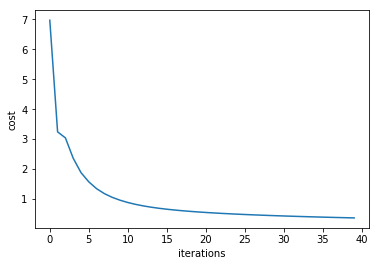

Train accuracy: 0.9554285714285714
Test accuracy: 0.924


In [6]:
topo = [400, 25, 10]
learning_rate = 0.4
iterations = 2000
optimize = ryan_gd(X_train, Y_train, topo, learning_rate, iterations)

_, _, accuracy = ryan_softmax_predict(X_train, Y_train1, optimize)
_, _, accuracy1 = ryan_softmax_predict(X_test, Y_test, optimize)
print("Train accuracy: " + str(accuracy))
print("Test accuracy: " + str(accuracy1))

[[-0.6976269  -0.69748612 -0.69803731 ..., -0.         -0.69761847
  -0.6979676 ]
 [-0.67807911 -0.67864907 -0.67903968 ..., -0.67875733 -0.67849807
  -0.67848946]
 [-0.68543119 -0.68552992 -0.68561632 ..., -0.68546444 -0.6848794  -0.        ]
 ..., 
 [-0.70085079 -0.70052315 -0.         ..., -0.70071941 -0.69981954
  -0.70051792]
 [-0.69601522 -0.69582543 -0.6958007  ..., -0.69615811 -0.6959086
  -0.69567535]
 [-0.69210098 -0.         -0.69290774 ..., -0.69282988 -0.69186089
  -0.69267012]]
Cost after iteration 0: 6.971709
[[-0.0512246  -0.05177979 -0.05162555 ..., -0.         -0.05158776
  -0.05279221]
 [-0.05320672 -0.0538174  -0.05364402 ..., -0.05372974 -0.05359328
  -0.05477591]
 [-0.05398307 -0.05457918 -0.05437386 ..., -0.05447363 -0.0542877  -0.        ]
 ..., 
 [-0.05145894 -0.05197042 -0.         ..., -0.05187238 -0.05167735
  -0.05293449]
 [-0.0527022  -0.05325419 -0.05303325 ..., -0.05318571 -0.05304977
  -0.05421638]
 [-0.05223778 -0.         -0.05266097 ..., -0.05275185 

[[-0.09632765 -0.10896241 -0.10614764 ..., -0.         -0.10695233
  -0.10485227]
 [-0.09985225 -0.11095415 -0.10948772 ..., -0.10930162 -0.10661648
  -0.10587991]
 [-0.10063166 -0.11388894 -0.1108797  ..., -0.11365337 -0.10894104 -0.        ]
 ..., 
 [-0.09843994 -0.11223066 -0.         ..., -0.10808232 -0.10475143
  -0.10511271]
 [-0.09758172 -0.11082384 -0.10762662 ..., -0.11125283 -0.10753858
  -0.10566841]
 [-0.09783914 -0.         -0.10954028 ..., -0.10768511 -0.10525259
  -0.10487213]]
[[-0.09668742 -0.10895585 -0.1060068  ..., -0.         -0.10742891
  -0.1051182 ]
 [-0.09982082 -0.11046165 -0.10911733 ..., -0.10842147 -0.10611295
  -0.10546091]
 [-0.10085667 -0.11380334 -0.11065025 ..., -0.11358855 -0.10888479 -0.        ]
 ..., 
 [-0.0985228  -0.11225712 -0.         ..., -0.10730908 -0.10429934
  -0.10483925]
 [-0.09781556 -0.11074208 -0.10743741 ..., -0.11126914 -0.1076884
  -0.10572374]
 [-0.09800936 -0.         -0.10963842 ..., -0.10700054 -0.10497331
  -0.10471524]]
[[-0.

[[-0.11393473 -0.07981969 -0.06668478 ..., -0.         -0.16245542
  -0.11799718]
 [-0.07464663 -0.0723562  -0.08890251 ..., -0.05189598 -0.07137912
  -0.07904872]
 [-0.1082296  -0.09272663 -0.07505348 ..., -0.11492573 -0.10417674 -0.        ]
 ..., 
 [-0.08913025 -0.15378204 -0.         ..., -0.0577335  -0.07137904
  -0.07864995]
 [-0.09963863 -0.08850374 -0.08410097 ..., -0.11329898 -0.12014345
  -0.10822772]
 [-0.09742794 -0.         -0.16202663 ..., -0.05704611 -0.07864897
  -0.08836492]]
[[-0.11443698 -0.07658508 -0.06328159 ..., -0.         -0.16620329
  -0.11748291]
 [-0.07139518 -0.06873278 -0.08644531 ..., -0.04832527 -0.06842667
  -0.07662984]
 [-0.10862664 -0.0903599  -0.07159773 ..., -0.1141975  -0.10321063 -0.        ]
 ..., 
 [-0.08750476 -0.1592324  -0.         ..., -0.05502398 -0.06879196
  -0.07568445]
 [-0.09921414 -0.08628788 -0.08220322 ..., -0.11307187 -0.12128494
  -0.10841504]
 [-0.09676741 -0.         -0.16914592 ..., -0.05403683 -0.07632695
  -0.08632086]]
[[-0

[[-0.08989087 -0.03204251 -0.03033757 ..., -0.         -0.16898964
  -0.06416127]
 [-0.01429212 -0.01095267 -0.02325827 ..., -0.00641682 -0.01622864
  -0.02978171]
 [-0.08800628 -0.03036522 -0.01278073 ..., -0.04526494 -0.04385737 -0.        ]
 ..., 
 [-0.0370705  -0.2738744  -0.         ..., -0.02958982 -0.02763484
  -0.01476301]
 [-0.06915373 -0.0399452  -0.04533513 ..., -0.0780537  -0.15438571
  -0.10912642]
 [-0.0690729  -0.         -0.36548898 ..., -0.01827775 -0.03922698
  -0.03237678]]
[[-0.08825674 -0.03122394 -0.03010372 ..., -0.         -0.16620467
  -0.06185951]
 [-0.01336059 -0.01015267 -0.02194201 ..., -0.00591375 -0.01522477
  -0.02875204]
 [-0.08585224 -0.02858258 -0.01179467 ..., -0.04269006 -0.04134918 -0.        ]
 ..., 
 [-0.03533013 -0.27489744 -0.         ..., -0.02944894 -0.02675547
  -0.0136532 ]
 [-0.06782334 -0.0388112  -0.04427377 ..., -0.07592434 -0.15606683
  -0.10915707]
 [-0.06801114 -0.         -0.36957118 ..., -0.01767971 -0.03869672
  -0.03098096]]
[[-0

[[-0.05458343 -0.01824941 -0.02548647 ..., -0.         -0.09349154
  -0.02926183]
 [-0.00421724 -0.00278197 -0.00846241 ..., -0.00129307 -0.00427407
  -0.01528316]
 [-0.0425323  -0.00823639 -0.00317255 ..., -0.01540606 -0.01133331 -0.        ]
 ..., 
 [-0.01126517 -0.23644639 -0.         ..., -0.03088615 -0.01324747
  -0.0033046 ]
 [-0.04967126 -0.02496178 -0.02350804 ..., -0.0337701  -0.19448068
  -0.11285189]
 [-0.05242116 -0.         -0.32920645 ..., -0.00904992 -0.03744428
  -0.01437391]]
[[-0.0534     -0.01784338 -0.02523149 ..., -0.         -0.09095315
  -0.02847434]
 [-0.00407361 -0.00267254 -0.00823795 ..., -0.00122719 -0.00407039
  -0.01494748]
 [-0.04117295 -0.00787541 -0.00306859 ..., -0.01495421 -0.01076347 -0.        ]
 ..., 
 [-0.01071034 -0.23355351 -0.         ..., -0.03102984 -0.01282593
  -0.00315803]
 [-0.04931281 -0.0246406  -0.02269778 ..., -0.0324169  -0.19583915
  -0.11301979]
 [-0.05196622 -0.         -0.32392658 ..., -0.00880423 -0.03764427
  -0.01402643]]
[[-0

[[-0.03345262 -0.01090904 -0.02043263 ..., -0.         -0.0532495
  -0.01730867]
 [-0.00230452 -0.00130196 -0.00514008 ..., -0.00046034 -0.00151667
  -0.00959208]
 [-0.01979539 -0.00337792 -0.0020773  ..., -0.00892977 -0.00354558 -0.        ]
 ..., 
 [-0.00346574 -0.17096956 -0.         ..., -0.03342438 -0.00583527
  -0.00147081]
 [-0.0450748  -0.01816565 -0.00885074 ..., -0.01231634 -0.2101916
  -0.10778649]
 [-0.04245593 -0.         -0.20423169 ..., -0.0048292  -0.04262326
  -0.00894999]]
[[-0.0328514  -0.01069213 -0.02031157 ..., -0.         -0.05228375
  -0.01702979]
 [-0.00226414 -0.00126933 -0.00505014 ..., -0.00044454 -0.00146256
  -0.00943318]
 [-0.01919572 -0.00327768 -0.00206683 ..., -0.00877155 -0.00338884 -0.        ]
 ..., 
 [-0.00330893 -0.16865359 -0.         ..., -0.03346332 -0.00563799
  -0.00143624]
 [-0.04497778 -0.0178936  -0.00847979 ..., -0.0118259  -0.20994003
  -0.10706358]
 [-0.04206036 -0.         -0.20001191 ..., -0.00471433 -0.04278329
  -0.00880549]]
[[-0.0

[[-0.02279835 -0.00696455 -0.01919217 ..., -0.         -0.03721545
  -0.01271639]
 [-0.00164514 -0.0007548  -0.00342526 ..., -0.00022425 -0.0007274
  -0.00676018]
 [-0.00982684 -0.00183324 -0.00207793 ..., -0.00617036 -0.00128372 -0.        ]
 ..., 
 [-0.00125416 -0.12573271 -0.         ..., -0.0329387  -0.00267077
  -0.00093362]
 [-0.04337817 -0.01242318 -0.0034707  ..., -0.00515549 -0.18746805
  -0.08393055]
 [-0.0335701  -0.         -0.13188727 ..., -0.00287239 -0.04430609
  -0.00631515]]
[[-0.02248664 -0.00684609 -0.01918788 ..., -0.         -0.03676676
  -0.01258711]
 [-0.00162705 -0.00073939 -0.00337223 ..., -0.00021862 -0.00070923
  -0.00667524]
 [-0.00956335 -0.00179502 -0.00208381 ..., -0.00609117 -0.00123447 -0.        ]
 ..., 
 [-0.00120762 -0.12426225 -0.         ..., -0.03286961 -0.00259125
  -0.00091941]
 [-0.04332592 -0.01223204 -0.0033559  ..., -0.00499709 -0.18597278
  -0.08282029]
 [-0.03323787 -0.         -0.1299987  ..., -0.0028177  -0.04428089
  -0.00623448]]
[[-0.

[[ -1.70836151e-02  -4.78275875e-03  -1.91069748e-02 ...,  -0.00000000e+00
   -2.89047558e-02  -1.02320247e-02]
 [ -1.31091807e-03  -4.70582690e-04  -2.49443949e-03 ...,  -1.30705856e-04
   -4.29583731e-04  -5.11069906e-03]
 [ -5.38785817e-03  -1.18966841e-03  -2.18576780e-03 ...,  -4.75114750e-03
   -5.40317603e-04  -0.00000000e+00]
 ..., 
 [ -5.59326168e-04  -9.70859954e-02  -0.00000000e+00 ...,  -3.07759147e-02
   -1.36682853e-03  -6.68076557e-04]
 [ -4.22288784e-02  -8.89040053e-03  -1.73957286e-03 ...,  -2.69497842e-03
   -1.47749872e-01  -5.97255761e-02]
 [ -2.67346455e-02  -0.00000000e+00  -1.01944884e-01 ...,  -1.87567387e-03
   -4.18379538e-02  -4.77120317e-03]]
[[ -1.69082630e-02  -4.71619863e-03  -1.90923419e-02 ...,  -0.00000000e+00
   -2.86425765e-02  -1.01490505e-02]
 [ -1.30028945e-03  -4.61722513e-04  -2.46837680e-03 ...,  -1.28143018e-04
   -4.21518700e-04  -5.05523772e-03]
 [ -5.26696587e-03  -1.17177578e-03  -2.18705380e-03 ...,  -4.70920131e-03
   -5.22892510e-04  -

[[ -1.49348580e-02  -3.97642422e-03  -1.87805361e-02 ...,  -0.00000000e+00
   -2.56295563e-02  -9.16822844e-03]
 [ -1.17708790e-03  -3.61581855e-04  -2.18763813e-03 ...,  -1.00515398e-04
   -3.34874950e-04  -4.39986379e-03]
 [ -3.98659692e-03  -9.77945410e-04  -2.17636458e-03 ...,  -4.24850438e-03
   -3.49176299e-04  -0.00000000e+00]
 ..., 
 [ -3.81906289e-04  -8.54065267e-02  -0.00000000e+00 ...,  -2.92511033e-02
   -9.75375319e-04  -5.59534865e-04]
 [ -4.15604146e-02  -7.61156104e-03  -1.27086737e-03 ...,  -2.00072307e-03
   -1.25051592e-01  -4.89525453e-02]
 [ -2.38742022e-02  -0.00000000e+00  -9.32481463e-02 ...,  -1.49357029e-03
   -3.90012685e-02  -4.13259062e-03]]
[[ -1.48032441e-02  -3.92793087e-03  -1.87479216e-02 ...,  -0.00000000e+00
   -2.54237244e-02  -9.09937408e-03]
 [ -1.16859724e-03  -3.54908628e-04  -2.16960806e-03 ...,  -9.87542033e-05
   -3.29374625e-04  -4.35397760e-03]
 [ -3.90691402e-03  -9.65519792e-04  -2.17363808e-03 ...,  -4.21867346e-03
   -3.39057395e-04  -

[[ -1.25077860e-02  -3.11023399e-03  -1.78632067e-02 ...,  -0.00000000e+00
   -2.17088072e-02  -7.81955841e-03]
 [ -1.01424799e-03  -2.41502486e-04  -1.85867155e-03 ...,  -6.99105297e-05
   -2.40001302e-04  -3.51329985e-03]
 [ -2.65457605e-03  -7.59686038e-04  -2.07422522e-03 ...,  -3.72430570e-03
   -1.92021713e-04  -0.00000000e+00]
 ..., 
 [ -2.33904518e-04  -7.22322799e-02  -0.00000000e+00 ...,  -2.67382507e-02
   -6.20010534e-04  -4.28985398e-04]
 [ -4.04749054e-02  -6.25100838e-03  -8.44554584e-04 ...,  -1.36566882e-03
   -9.54546260e-02  -3.65939575e-02]
 [ -2.08231173e-02  -0.00000000e+00  -8.31058311e-02 ...,  -1.05784759e-03
   -3.37698030e-02  -3.34369617e-03]]
[[ -1.24161719e-02  -3.07896143e-03  -1.78140809e-02 ...,  -0.00000000e+00
   -2.15554163e-02  -7.76535491e-03]
 [ -1.00785719e-03  -2.37198967e-04  -1.84607539e-03 ...,  -6.88424469e-05
   -2.36726816e-04  -3.47853655e-03]
 [ -2.61054749e-03  -7.51922786e-04  -2.06809865e-03 ...,  -3.70580077e-03
   -1.87296062e-04  -

   -3.09732000e-02  -2.98696802e-03]]
[[ -1.14061701e-02  -2.74261303e-03  -1.71950800e-02 ...,  -0.00000000e+00
   -1.98415109e-02  -7.15340636e-03]
 [ -9.36589434e-04  -1.91795347e-04  -1.70407396e-03 ...,  -5.75759120e-05
   -2.02391694e-04  -3.09371588e-03]
 [ -2.15884788e-03  -6.68785346e-04  -1.98986297e-03 ...,  -3.50929249e-03
   -1.40782967e-04  -0.00000000e+00]
 ..., 
 [ -1.84100514e-04  -6.66592664e-02  -0.00000000e+00 ...,  -2.52449839e-02
   -4.94246636e-04  -3.68863518e-04]
 [ -3.98379934e-02  -5.66521793e-03  -6.87530950e-04 ...,  -1.13179066e-03
   -8.18614395e-02  -3.12580848e-02]
 [ -1.96587198e-02  -0.00000000e+00  -7.73945161e-02 ...,  -8.67829216e-04
   -3.07486462e-02  -2.95907133e-03]]
[[ -1.13285518e-02  -2.71742553e-03  -1.71415196e-02 ...,  -0.00000000e+00
   -1.97083112e-02  -7.10537711e-03]
 [ -9.31066859e-04  -1.88486650e-04  -1.69288084e-03 ...,  -5.67511570e-05
   -1.99893640e-04  -3.06419147e-03]
 [ -2.12674880e-03  -6.62583887e-04  -1.98308108e-03 ..., 

[[ -1.05287484e-02  -2.46347162e-03  -1.65387557e-02 ...,  -0.00000000e+00
   -1.83279606e-02  -6.60366913e-03]
 [ -8.74017800e-04  -1.56206433e-04  -1.57488505e-03 ...,  -4.86243032e-05
   -1.75388629e-04  -2.76278120e-03]
 [ -1.81803169e-03  -6.00236769e-04  -1.90761162e-03 ...,  -3.35004385e-03
   -1.08275071e-04  -0.00000000e+00]
 ..., 
 [ -1.51459941e-04  -6.25817847e-02  -0.00000000e+00 ...,  -2.38847493e-02
   -4.10551248e-04  -3.22073386e-04]
 [ -3.92640858e-02  -5.21034841e-03  -5.79362491e-04 ...,  -9.70126568e-04
   -7.15766638e-02  -2.72692254e-02]
 [ -1.88856782e-02  -0.00000000e+00  -7.20495496e-02 ...,  -7.26165174e-04
   -2.81833862e-02  -2.64371799e-03]]
[[ -1.04604626e-02  -2.44225626e-03  -1.64829699e-02 ...,  -0.00000000e+00
   -1.82096850e-02  -6.56033454e-03]
 [ -8.69145135e-04  -1.53614598e-04  -1.56458384e-03 ...,  -4.79628948e-05
   -1.73402382e-04  -2.73738868e-03]
 [ -1.79352729e-03  -5.95043493e-04  -1.90073976e-03 ...,  -3.33808007e-03
   -1.06032528e-04  -

   -2.58783339e-02  -2.36106388e-03]]
[[ -9.68928806e-03  -2.20752457e-03  -1.58054909e-02 ...,  -0.00000000e+00
   -1.68742400e-02  -6.06696571e-03]
 [ -8.14265784e-04  -1.26289720e-04  -1.44592152e-03 ...,  -4.08618396e-05
   -1.52131282e-04  -2.45617837e-03]
 [ -1.53647952e-03  -5.37764389e-04  -1.81938275e-03 ...,  -3.20669724e-03
   -8.33549902e-05  -0.00000000e+00]
 ..., 
 [ -1.25409663e-04  -5.90488299e-02  -0.00000000e+00 ...,  -2.24464698e-02
   -3.43381508e-04  -2.79193526e-04]
 [ -3.86606904e-02  -4.78220966e-03  -4.89730923e-04 ...,  -8.35109299e-04
   -6.24720272e-02  -2.37295861e-02]
 [ -1.82876877e-02  -0.00000000e+00  -6.62593015e-02 ...,  -6.02264899e-04
   -2.56983112e-02  -2.33887752e-03]]
[[ -9.62869050e-03  -2.18944304e-03  -1.57485570e-02 ...,  -0.00000000e+00
   -1.67695428e-02  -6.02795106e-03]
 [ -8.09970849e-04  -1.24297915e-04  -1.43643022e-03 ...,  -4.03328612e-05
   -1.50549144e-04  -2.43458309e-03]
 [ -1.51777471e-03  -5.33367592e-04  -1.81274023e-03 ..., 

[[ -8.99443326e-03  -2.00310691e-03  -1.51203397e-02 ...,  -0.00000000e+00
   -1.56788352e-02  -5.61828850e-03]
 [ -7.65223819e-04  -1.04827723e-04  -1.33590800e-03 ...,  -3.50506999e-05
   -1.34741332e-04  -2.21375982e-03]
 [ -1.33431988e-03  -4.88218224e-04  -1.74164169e-03 ...,  -3.09278946e-03
   -6.67165587e-05  -0.00000000e+00]
 ..., 
 [ -1.07169542e-04  -5.64121705e-02  -0.00000000e+00 ...,  -2.11631704e-02
   -2.96366328e-04  -2.45647307e-04]
 [ -3.81211074e-02  -4.43121088e-03  -4.25235946e-04 ...,  -7.36827346e-04
   -5.55928784e-02  -2.10263653e-02]
 [ -1.78938566e-02  -0.00000000e+00  -6.10379962e-02 ...,  -5.10000210e-04
   -2.36794394e-02  -2.08811091e-03]]
[[ -8.93951865e-03  -1.98721196e-03  -1.50631774e-02 ...,  -0.00000000e+00
   -1.55849668e-02  -5.58274136e-03]
 [ -7.61368421e-04  -1.03259620e-04  -1.32711840e-03 ...,  -3.46151017e-05
   -1.33435421e-04  -2.19511604e-03]
 [ -1.31945562e-03  -4.84382217e-04  -1.73537697e-03 ...,  -3.08389864e-03
   -6.55394037e-05  -

[[ -7.78481253e-03  -1.66069047e-03  -1.37593457e-02 ...,  -0.00000000e+00
   -1.36421066e-02  -4.83503217e-03]
 [ -6.80938233e-04  -7.44313047e-05  -1.14061113e-03 ...,  -2.62328511e-05
   -1.08079112e-04  -1.82221338e-03]
 [ -1.04054266e-03  -4.06292178e-04  -1.60179355e-03 ...,  -2.89719361e-03
   -4.47933273e-05  -0.00000000e+00]
 ..., 
 [ -8.12761868e-05  -5.24147171e-02  -0.00000000e+00 ...,  -1.87592694e-02
   -2.30013541e-04  -1.92393891e-04]
 [ -3.70922985e-02  -3.82404205e-03  -3.31491636e-04 ...,  -5.91190718e-04
   -4.51221333e-02  -1.68184937e-02]
 [ -1.73877550e-02  -0.00000000e+00  -5.13418543e-02 ...,  -3.73363827e-04
   -2.03618258e-02  -1.66576469e-03]]
[[ -7.73889411e-03  -1.64798485e-03  -1.37034852e-02 ...,  -0.00000000e+00
   -1.35662960e-02  -4.80534703e-03]
 [ -6.77759598e-04  -7.34402601e-05  -1.13316884e-03 ...,  -2.59292330e-05
   -1.07147266e-04  -1.80815700e-03]
 [ -1.03066492e-03  -4.03285888e-04  -1.59645882e-03 ...,  -2.88968689e-03
   -4.41096847e-05  -

[[ -7.21260843e-03  -1.50374521e-03  -1.30413624e-02 ...,  -0.00000000e+00
   -1.27067551e-02  -4.46574004e-03]
 [ -6.41371740e-04  -6.28544405e-05  -1.04801982e-03 ...,  -2.26031820e-05
   -9.68330026e-05  -1.65124640e-03]
 [ -9.23211446e-04  -3.69359447e-04  -1.53550214e-03 ...,  -2.80260806e-03
   -3.69276440e-05  -0.00000000e+00]
 ..., 
 [ -7.11215579e-05  -5.07589444e-02  -0.00000000e+00 ...,  -1.75616060e-02
   -2.04212601e-04  -1.69670250e-04]
 [ -3.65639724e-02  -3.53782183e-03  -2.94143334e-04 ...,  -5.31944316e-04
   -4.08123837e-02  -1.50377359e-02]
 [ -1.72033538e-02  -0.00000000e+00  -4.66316862e-02 ...,  -3.19181828e-04
   -1.89102418e-02  -1.47638497e-03]]
[[ -7.17073074e-03  -1.49237493e-03  -1.29869459e-02 ...,  -0.00000000e+00
   -1.26391310e-02  -4.43877432e-03]
 [ -6.38477333e-04  -6.20707922e-05  -1.04126337e-03 ...,  -2.23504161e-05
   -9.60397152e-05  -1.63908736e-03]
 [ -9.15091993e-04  -3.66701496e-04  -1.53067289e-03 ...,  -2.79558506e-03
   -3.64046952e-05  -

[[ -6.31961215e-03  -1.26469125e-03  -1.18255685e-02 ...,  -0.00000000e+00
   -1.12914858e-02  -3.89309984e-03]
 [ -5.79482554e-04  -4.78381080e-05  -9.05011688e-04 ...,  -1.75741479e-05
   -8.06884688e-05  -1.40186152e-03]
 [ -7.62119845e-04  -3.13996909e-04  -1.43352144e-03 ...,  -2.64951898e-03
   -2.71169484e-05  -0.00000000e+00]
 ..., 
 [ -5.73568177e-05  -4.84304907e-02  -0.00000000e+00 ...,  -1.56384347e-02
   -1.69495417e-04  -1.37395936e-04]
 [ -3.56815293e-02  -3.09232581e-03  -2.43080130e-04 ...,  -4.49696322e-04
   -3.48331799e-02  -1.25005014e-02]
 [ -1.69427796e-02  -0.00000000e+00  -3.93083893e-02 ...,  -2.46939044e-04
   -1.68209093e-02  -1.19882703e-03]]
[[ -6.28392731e-03  -1.25529059e-03  -1.17745604e-02 ...,  -0.00000000e+00
   -1.12361470e-02  -3.87033356e-03]
 [ -5.76995906e-04  -4.73069700e-05  -8.99353667e-04 ...,  -1.73884141e-05
   -8.00742414e-05  -1.39230796e-03]
 [ -7.56163277e-04  -3.11841355e-04  -1.42949383e-03 ...,  -2.64326484e-03
   -2.67781344e-05  -

[[ -5.87438740e-03  -1.14830407e-03  -1.11757378e-02 ...,  -0.00000000e+00
   -1.06081369e-02  -3.60980506e-03]
 [ -5.48328961e-04  -4.15502533e-05  -8.34799219e-04 ...,  -1.53366004e-05
   -7.31740994e-05  -1.28474530e-03]
 [ -6.90098423e-04  -2.87408076e-04  -1.38352874e-03 ...,  -2.57096673e-03
   -2.31429056e-05  -0.00000000e+00]
 ..., 
 [ -5.12771642e-05  -4.73697710e-02  -0.00000000e+00 ...,  -1.46637113e-02
   -1.54255306e-04  -1.22703612e-04]
 [ -3.52126357e-02  -2.87086145e-03  -2.20364112e-04 ...,  -4.12710457e-04
   -3.21598009e-02  -1.13347500e-02]
 [ -1.68085102e-02  -0.00000000e+00  -3.57198440e-02 ...,  -2.16017054e-04
   -1.58638527e-02  -1.06968260e-03]]
[[ -5.84176389e-03  -1.13985576e-03  -1.11269710e-02 ...,  -0.00000000e+00
   -1.05586822e-02  -3.58911406e-03]
 [ -5.46033583e-04  -4.11173902e-05  -8.29688422e-04 ...,  -1.51793595e-05
   -7.26356954e-05  -1.27633551e-03]
 [ -6.85008229e-04  -2.85485586e-04  -1.37988629e-03 ...,  -2.56517786e-03
   -2.28723474e-05  -

[[ -5.17790051e-03  -9.70592775e-04  -1.01001837e-02 ...,  -0.00000000e+00
   -9.57152292e-03  -3.17030782e-03]
 [ -4.98824360e-04  -3.30545807e-05  -7.26782736e-04 ...,  -1.21711289e-05
   -6.20044333e-05  -1.10981223e-03]
 [ -5.86319191e-04  -2.47100546e-04  -1.30618963e-03 ...,  -2.44762638e-03
   -1.79080062e-05  -0.00000000e+00]
 ..., 
 [ -4.26142161e-05  -4.58185113e-02  -0.00000000e+00 ...,  -1.31311348e-02
   -1.32617256e-04  -1.01458757e-04]
 [ -3.44337670e-02  -2.52539185e-03  -1.87774922e-04 ...,  -3.59435158e-04
   -2.83408398e-02  -9.62739615e-03]
 [ -1.65652193e-02  -0.00000000e+00  -3.02477343e-02 ...,  -1.73655998e-04
   -1.44838280e-02  -8.80887699e-04]]
[[ -5.15003410e-03  -9.63607718e-04  -1.00556393e-02 ...,  -0.00000000e+00
   -9.53091300e-03  -3.15282830e-03]
 [ -4.96818538e-04  -3.27451777e-05  -7.22510568e-04 ...,  -1.20526534e-05
   -6.15708667e-05  -1.10300091e-03]
 [ -5.82364547e-04  -2.45519089e-04  -1.30310609e-03 ...,  -2.44274407e-03
   -1.77204979e-05  -

[[ -4.82999972e-03  -8.84167439e-04  -9.53564517e-03 ...,  -0.00000000e+00
   -9.06954846e-03  -2.95272359e-03]
 [ -4.73617012e-04  -2.93439288e-05  -6.73731891e-04 ...,  -1.07356919e-05
   -5.66591135e-05  -1.02569643e-03]
 [ -5.37913705e-04  -2.27521251e-04  -1.26766548e-03 ...,  -2.38737198e-03
   -1.56752204e-05  -0.00000000e+00]
 ..., 
 [ -3.86197750e-05  -4.50827667e-02  -0.00000000e+00 ...,  -1.23665750e-02
   -1.22656380e-04  -9.15882764e-05]
 [ -3.40199608e-02  -2.35326223e-03  -1.72626543e-04 ...,  -3.34690723e-04
   -2.65835890e-02  -8.82242401e-03]
 [ -1.64179532e-02  -0.00000000e+00  -2.75952588e-02 ...,  -1.54982918e-04
   -1.38492849e-02  -7.92772164e-04]]
[[ -4.80448600e-03  -8.77898981e-04  -9.49352099e-03 ...,  -0.00000000e+00
   -9.03317388e-03  -2.93682352e-03]
 [ -4.71753527e-04  -2.90843892e-05  -6.69866062e-04 ...,  -1.06341245e-05
   -5.62727600e-05  -1.01960320e-03]
 [ -5.34443380e-04  -2.26099246e-04  -1.26483471e-03 ...,  -2.38302624e-03
   -1.55204057e-05  -

[[ -4.28438457e-03  -7.52429692e-04  -8.61305722e-03 ...,  -0.00000000e+00
   -8.30549383e-03  -2.61454816e-03]
 [ -4.33273148e-04  -2.41370715e-05  -5.91820594e-04 ...,  -8.67147000e-06
   -4.85578963e-05  -8.97389980e-04]
 [ -4.65847036e-04  -1.97511016e-04  -1.20666088e-03 ...,  -2.29770959e-03
   -1.26073619e-05  -0.00000000e+00]
 ..., 
 [ -3.27378491e-05  -4.39628436e-02  -0.00000000e+00 ...,  -1.11747365e-02
   -1.07976904e-04  -7.70222972e-05]
 [ -3.33280784e-02  -2.08380547e-03  -1.50104897e-04 ...,  -2.98101506e-04
   -2.40076684e-02  -7.61728730e-03]
 [ -1.61353063e-02  -0.00000000e+00  -2.35649017e-02 ...,  -1.28688410e-04
   -1.29298670e-02  -6.62944306e-04]]
[[ -4.26250479e-03  -7.47254904e-04  -8.57510213e-03 ...,  -0.00000000e+00
   -8.27548346e-03  -2.60107249e-03]
 [ -4.31632602e-04  -2.39425142e-05  -5.88569842e-04 ...,  -8.59335349e-06
   -4.82399623e-05  -8.92325660e-04]
 [ -4.63045703e-04  -1.96324831e-04  -1.20418424e-03 ...,  -2.29428763e-03
   -1.24944090e-05  -

[[ -4.01085328e-03  -6.88394768e-04  -8.13318863e-03 ...,  -0.00000000e+00
   -7.93404477e-03  -2.44659647e-03]
 [ -4.12630000e-04  -2.17775661e-05  -5.51376964e-04 ...,  -7.72032872e-06
   -4.46213926e-05  -8.34473699e-04]
 [ -4.31277182e-04  -1.82777172e-04  -1.17543411e-03 ...,  -2.25614842e-03
   -1.12468487e-05  -0.00000000e+00]
 ..., 
 [ -2.99479432e-05  -4.34087952e-02  -0.00000000e+00 ...,  -1.05821885e-02
   -1.00994460e-04  -7.01135442e-05]
 [ -3.29562963e-02  -1.94890174e-03  -1.39296268e-04 ...,  -2.80690495e-04
   -2.27916499e-02  -7.03745725e-03]
 [ -1.59633546e-02  -0.00000000e+00  -2.16108894e-02 ...,  -1.16776329e-04
   -1.25047234e-02  -6.01695449e-04]]
[[ -3.99075858e-03  -6.83748637e-04  -8.09747336e-03 ...,  -0.00000000e+00
   -7.90708427e-03  -2.43430347e-03]
 [ -4.11101841e-04  -2.16102995e-05  -5.48422870e-04 ...,  -7.65262523e-06
   -4.43354862e-05  -8.29884095e-04]
 [ -4.28775211e-04  -1.81702984e-04  -1.17311411e-03 ...,  -2.25320672e-03
   -1.11512110e-05  -

[[ -3.57981439e-03  -5.90614346e-04  -7.35305106e-03 ...,  -0.00000000e+00
   -7.36630345e-03  -2.18437139e-03]
 [ -3.79492764e-04  -1.83597645e-05  -4.88548874e-04 ...,  -6.33267858e-06
   -3.85896301e-05  -7.36894895e-04]
 [ -3.78670150e-04  -1.59991178e-04  -1.12460038e-03 ...,  -2.19690447e-03
   -9.31693763e-06  -0.00000000e+00]
 ..., 
 [ -2.57481880e-05  -4.25295613e-02  -0.00000000e+00 ...,  -9.65682625e-03
   -9.04297409e-05  -5.97262399e-05]
 [ -3.23252114e-02  -1.73649540e-03  -1.22803633e-04 ...,  -2.54399145e-04
   -2.09661706e-02  -6.15444412e-03]
 [ -1.56409666e-02  -0.00000000e+00  -1.86325870e-02 ...,  -9.95927599e-05
   -1.18849237e-02  -5.10363363e-04]]
[[ -3.56246418e-03  -5.86764706e-04  -7.32102799e-03 ...,  -0.00000000e+00
   -7.34393797e-03  -2.17388342e-03]
 [ -3.78143111e-04  -1.82293573e-05  -4.86044434e-04 ...,  -6.27965008e-06
   -3.83513810e-05  -7.33002768e-04]
 [ -3.76597593e-04  -1.59085635e-04  -1.12249841e-03 ...,  -2.19470084e-03
   -9.24440144e-06  -

   -1.16170658e-02  -4.69900005e-04]]
[[ -3.36248070e-03  -5.42904681e-04  -6.94840894e-03 ...,  -0.00000000e+00
   -7.08909316e-03  -2.05339569e-03]
 [ -3.62498275e-04  -1.67638325e-05  -4.57323506e-04 ...,  -5.68416929e-06
   -3.56317990e-05  -6.88320219e-04]
 [ -3.52948056e-04  -1.48718057e-04  -1.09787485e-03 ...,  -2.17038991e-03
   -8.43558533e-06  -0.00000000e+00]
 ..., 
 [ -2.37174421e-05  -4.20756188e-02  -0.00000000e+00 ...,  -9.19447128e-03
   -8.52832341e-05  -5.47120563e-05]
 [ -3.19802905e-02  -1.62946305e-03  -1.14703382e-04 ...,  -2.41635103e-04
   -2.00834333e-02  -5.72293813e-03]
 [ -1.54506418e-02  -0.00000000e+00  -1.71817574e-02 ...,  -9.16254712e-05
   -1.15962289e-02  -4.66721953e-04]]
[[ -3.34647571e-03  -5.39436069e-04  -6.91830694e-03 ...,  -0.00000000e+00
   -7.06893925e-03  -2.04378536e-03]
 [ -3.61239189e-04  -1.66494674e-05  -4.55036842e-04 ...,  -5.63776351e-06
   -3.54162997e-05  -6.84757963e-04]
 [ -3.51074090e-04  -1.47894079e-04  -1.09587001e-03 ..., 

[[ -3.17671859e-03  -5.03038060e-04  -6.59644671e-03 ...,  -0.00000000e+00
   -6.85750356e-03  -1.94216043e-03]
 [ -3.47821240e-04  -1.54621507e-05  -4.30897179e-04 ...,  -5.15697866e-06
   -3.31509474e-05  -6.47093656e-04]
 [ -3.31364817e-04  -1.39210438e-04  -1.07425036e-03 ...,  -2.14964076e-03
   -7.72784851e-06  -0.00000000e+00]
 ..., 
 [ -2.20263984e-05  -4.16769037e-02  -0.00000000e+00 ...,  -8.80159846e-03
   -8.09687757e-05  -5.05423837e-05]
 [ -3.16675348e-02  -1.53800759e-03  -1.07879094e-04 ...,  -2.30967673e-04
   -1.93464639e-02  -5.36126365e-03]
 [ -1.52711627e-02  -0.00000000e+00  -1.59708402e-02 ...,  -8.51685578e-05
   -1.13623012e-02  -4.30709119e-04]]
[[ -3.16183967e-03  -4.99882533e-04  -6.56801010e-03 ...,  -0.00000000e+00
   -6.83918035e-03  -1.93328041e-03]
 [ -3.46639676e-04  -1.53602808e-05  -4.28791554e-04 ...,  -5.11583398e-06
   -3.29542001e-05  -6.43802527e-04]
 [ -3.29651715e-04  -1.38454377e-04  -1.07232237e-03 ...,  -2.14805559e-03
   -7.67292204e-06  -

[[ -2.84291037e-03  -4.33641208e-04  -5.94959700e-03 ...,  -0.00000000e+00
   -6.45517706e-03  -1.74403716e-03]
 [ -3.21101351e-04  -1.32578594e-05  -3.84079721e-04 ...,  -4.27257642e-06
   -2.88106669e-05  -5.73627590e-04]
 [ -2.93474556e-04  -1.22464051e-04  -1.02949243e-03 ...,  -2.11671361e-03
   -6.55608798e-06  -0.00000000e+00]
 ..., 
 [ -1.90897091e-05  -4.09206698e-02  -0.00000000e+00 ...,  -8.10102622e-03
   -7.33845107e-05  -4.33188262e-05]
 [ -3.10531961e-02  -1.37372139e-03  -9.58190903e-05 ...,  -2.12317600e-04
   -1.80563635e-02  -4.72788135e-03]
 [ -1.49050373e-02  -0.00000000e+00  -1.38671873e-02 ...,  -7.43509331e-05
   -1.09715222e-02  -3.69025396e-04]]
[[ -2.82999388e-03  -4.31016129e-04  -5.92419084e-03 ...,  -0.00000000e+00
   -6.43999823e-03  -1.73641829e-03]
 [ -3.20058552e-04  -1.31758745e-05  -3.82286752e-04 ...,  -4.23998637e-06
   -2.86459349e-05  -5.70800041e-04]
 [ -2.92030906e-04  -1.21825788e-04  -1.02769065e-03 ...,  -2.11554463e-03
   -6.51323528e-06  -

   -1.08077393e-02  -3.42565955e-04]]
[[ -2.68063277e-03  -4.00997468e-04  -5.62833688e-03 ...,  -0.00000000e+00
   -6.26676826e-03  -1.64858107e-03]
 [ -3.07951410e-04  -1.22449215e-05  -3.61661516e-04 ...,  -3.87200087e-06
   -2.67593628e-05  -5.38183582e-04]
 [ -2.75456067e-04  -1.14503711e-04  -1.00641990e-03 ...,  -2.10252138e-03
   -6.03072205e-06  -0.00000000e+00]
 ..., 
 [ -1.77092265e-05  -4.05258806e-02  -0.00000000e+00 ...,  -7.76297972e-03
   -6.97616602e-05  -3.99346755e-05]
 [ -3.07241075e-02  -1.29387325e-03  -9.00407491e-05 ...,  -2.03471343e-04
   -1.74416510e-02  -4.42772486e-03]
 [ -1.47045295e-02  -0.00000000e+00  -1.28802885e-02 ...,  -6.94430726e-05
   -1.07949010e-02  -3.40477260e-04]]
[[ -2.66863971e-03  -3.98614274e-04  -5.60441519e-03 ...,  -0.00000000e+00
   -6.25304751e-03  -1.64154939e-03]
 [ -3.06975334e-04  -1.21715122e-05  -3.60014227e-04 ...,  -3.84316305e-06
   -2.66093692e-05  -5.35571010e-04]
 [ -2.74134596e-04  -1.13920636e-04  -1.00467545e-03 ..., 

[[ -2.42101217e-03  -3.50332106e-04  -5.10491840e-03 ...,  -0.00000000e+00
   -5.97652970e-03  -1.49707700e-03]
 [ -2.86685370e-04  -1.06987280e-05  -3.26311495e-04 ...,  -3.27143776e-06
   -2.35640221e-05  -4.81842185e-04]
 [ -2.47155648e-04  -1.02058160e-04  -9.67303520e-04 ...,  -2.08156737e-03
   -5.24746613e-06  -0.00000000e+00]
 ..., 
 [ -1.55650287e-05  -3.98390715e-02  -0.00000000e+00 ...,  -7.22570680e-03
   -6.40247215e-05  -3.47028090e-05]
 [ -3.01434451e-02  -1.16611938e-03  -8.09002687e-05 ...,  -1.89580885e-04
   -1.64684514e-02  -3.95832078e-03]
 [ -1.43490178e-02  -0.00000000e+00  -1.13535589e-02 ...,  -6.20479870e-05
   -1.05290676e-02  -2.96838045e-04]]
[[ -2.41045228e-03  -3.48312978e-04  -5.08337989e-03 ...,  -0.00000000e+00
   -5.96504114e-03  -1.49094646e-03]
 [ -2.85814073e-04  -1.06376992e-05  -3.24887851e-04 ...,  -3.24806594e-06
   -2.34364070e-05  -4.79560203e-04]
 [ -2.46017927e-04  -1.01560234e-04  -9.65648325e-04 ...,  -2.08074345e-03
   -5.21705623e-06  -

[[ -2.18256347e-03  -3.05553683e-04  -4.61378720e-03 ...,  -0.00000000e+00
   -5.72378983e-03  -1.35924378e-03]
 [ -2.66875242e-04  -9.35461308e-06  -2.94449565e-04 ...,  -2.76392834e-06
   -2.07294485e-05  -4.30507240e-04]
 [ -2.21710565e-04  -9.09896917e-05  -9.28547887e-04 ...,  -2.06295737e-03
   -4.58744090e-06  -0.00000000e+00]
 ..., 
 [ -1.36660447e-05  -3.91239282e-02  -0.00000000e+00 ...,  -6.73636311e-03
   -5.87823179e-05  -3.01096224e-05]
 [ -2.95340543e-02  -1.04869590e-03  -7.26123339e-05 ...,  -1.77061181e-04
   -1.55771734e-02  -3.53923422e-03]
 [ -1.39799619e-02  -0.00000000e+00  -1.00112964e-02 ...,  -5.57292079e-05
   -1.03003126e-02  -2.59068703e-04]]
[[ -2.17327053e-03  -3.03843498e-04  -4.59444395e-03 ...,  -0.00000000e+00
   -5.71423756e-03  -1.35389703e-03]
 [ -2.66096984e-04  -9.30364061e-06  -2.93220120e-04 ...,  -2.74500956e-06
   -2.06210165e-05  -4.28515072e-04]
 [ -2.20729062e-04  -9.05660899e-05  -9.26975657e-04 ...,  -2.06221769e-03
   -4.56282779e-06  -

   -1.01999489e-02  -2.42671251e-04]]
[[ -2.06544024e-03  -2.84194634e-04  -4.36888801e-03 ...,  -0.00000000e+00
   -5.60516137e-03  -1.29198822e-03]
 [ -2.57027617e-04  -8.71972060e-06  -2.79023040e-04 ...,  -2.53022435e-06
   -1.93743836e-05  -4.05448382e-04]
 [ -2.09393624e-04  -8.56962582e-05  -9.08364743e-04 ...,  -2.05341778e-03
   -4.28315544e-06  -0.00000000e+00]
 ..., 
 [ -1.27582051e-05  -3.87326398e-02  -0.00000000e+00 ...,  -6.49758457e-03
   -5.62007229e-05  -2.79343055e-05]
 [ -2.92003952e-02  -9.90940490e-04  -6.85786143e-05 ...,  -1.70975535e-04
   -1.51367171e-02  -3.33771776e-03]
 [ -1.37818173e-02  -0.00000000e+00  -9.37412359e-03 ...,  -5.27830893e-05
   -1.01919340e-02  -2.41371860e-04]]
[[ -2.05675209e-03  -2.82627225e-04  -4.35062601e-03 ...,  -0.00000000e+00
   -5.59651815e-03  -1.28701047e-03]
 [ -2.56293588e-04  -8.67327181e-06  -2.77884670e-04 ...,  -2.51329885e-06
   -1.92748760e-05  -4.03593893e-04]
 [ -2.08484502e-04  -8.53076007e-05  -9.06834910e-04 ..., 

   -1.00994301e-02  -2.26528410e-04]]
[[ -1.95587644e-03  -2.64602395e-04  -4.13763639e-03 ...,  -0.00000000e+00
   -5.49782983e-03  -1.22932436e-03]
 [ -2.47731370e-04  -8.14042472e-06  -2.64727647e-04 ...,  -2.32094167e-06
   -1.81299514e-05  -3.82108200e-04]
 [ -1.97973191e-04  -8.08369760e-05  -8.88725307e-04 ...,  -2.04386113e-03
   -4.00995731e-06  -0.00000000e+00]
 ..., 
 [ -1.19239700e-05  -3.83367619e-02  -0.00000000e+00 ...,  -6.27524323e-03
   -5.37727678e-05  -2.59512449e-05]
 [ -2.88631937e-02  -9.36831097e-04  -6.48279891e-05 ...,  -1.65309256e-04
   -1.47210804e-02  -3.15183841e-03]
 [ -1.35853428e-02  -0.00000000e+00  -8.79175437e-03 ...,  -5.01166006e-05
   -1.00920059e-02  -2.25351466e-04]]
[[ -1.94774359e-03  -2.63163226e-04  -4.12038869e-03 ...,  -0.00000000e+00
   -5.49001050e-03  -1.22468210e-03]
 [ -2.47037701e-04  -8.09797996e-06  -2.63671709e-04 ...,  -2.30576733e-06
   -1.80384903e-05  -3.80379773e-04]
 [ -1.97129214e-04  -8.04799654e-05  -8.87236686e-04 ..., 

[[ -1.86092022e-03  -2.47931155e-04  -3.93556547e-03 ...,  -0.00000000e+00
   -5.40786723e-03  -1.17519842e-03]
 [ -2.39597887e-04  -7.64960010e-06  -2.52443104e-04 ...,  -2.14688103e-06
   -1.70700899e-05  -3.61964625e-04]
 [ -1.88150177e-04  -7.67012794e-05  -8.71067131e-04 ...,  -2.03480828e-03
   -3.78189080e-06  -0.00000000e+00]
 ..., 
 [ -1.12128069e-05  -3.79664563e-02  -0.00000000e+00 ...,  -6.08339703e-03
   -5.16526389e-05  -2.42753925e-05]
 [ -2.85482100e-02  -8.89845518e-04  -6.15958129e-05 ...,  -1.60411395e-04
   -1.43567431e-02  -2.99281737e-03]
 [ -1.34057216e-02  -0.00000000e+00  -8.29796975e-03 ...,  -4.78727193e-05
   -1.00059024e-02  -2.11899413e-04]]
[[ -1.85326052e-03  -2.46599011e-04  -3.91920001e-03 ...,  -0.00000000e+00
   -5.40074015e-03  -1.17083932e-03]
 [ -2.38938348e-04  -7.61045831e-06  -2.51456339e-04 ...,  -2.13313690e-06
   -1.69853655e-05  -3.60343329e-04]
 [ -1.87360684e-04  -7.63708154e-05  -8.69615696e-04 ...,  -2.03403832e-03
   -3.76383933e-06  -

   -9.92462000e-03  -1.99603978e-04]]
[[ -1.76422969e-03  -2.31255294e-04  -3.72828605e-03 ...,  -0.00000000e+00
   -5.31938380e-03  -1.12024380e-03]
 [ -2.31230594e-04  -7.16041432e-06  -2.40031429e-04 ...,  -1.97663487e-06
   -1.60091770e-05  -3.41539738e-04]
 [ -1.78214212e-04  -7.25648330e-05  -8.52436043e-04 ...,  -2.02455765e-03
   -3.55773813e-06  -0.00000000e+00]
 ..., 
 [ -1.05000955e-05  -3.75594681e-02  -0.00000000e+00 ...,  -5.88890232e-03
   -4.94729869e-05  -2.26119601e-05]
 [ -2.82024379e-02  -8.41885839e-04  -5.83228978e-05 ...,  -1.55428022e-04
   -1.39805158e-02  -2.83288301e-03]
 [ -1.32132871e-02  -0.00000000e+00  -7.80580763e-03 ...,  -4.56489403e-05
   -9.91803577e-03  -1.98628053e-04]]
[[ -1.75704410e-03  -2.30028249e-04  -3.71282300e-03 ...,  -0.00000000e+00
   -5.31293952e-03  -1.11616580e-03]
 [ -2.30604964e-04  -7.12448546e-06  -2.39112844e-04 ...,  -1.96426475e-06
   -1.59310864e-05  -3.40025507e-04]
 [ -1.77478347e-04  -7.22604979e-05  -8.51024046e-04 ..., 

   -9.84100364e-03  -1.87462473e-04]]
[[ -1.67348195e-03  -2.15884546e-04  -3.53242844e-03 ...,  -0.00000000e+00
   -5.23938832e-03  -1.06879752e-03]
 [ -2.23286592e-04  -6.71097643e-06  -2.28467356e-04 ...,  -1.82327312e-06
   -1.50307371e-05  -3.22455093e-04]
 [ -1.68945020e-04  -6.87528717e-05  -8.34312322e-04 ...,  -2.01368422e-03
   -3.35457059e-06  -0.00000000e+00]
 ..., 
 [ -9.84185160e-06  -3.71461681e-02  -0.00000000e+00 ...,  -5.70717854e-03
   -4.74029782e-05  -2.10921979e-05]
 [ -2.78515442e-02  -7.96736206e-04  -5.52687004e-05 ...,  -1.50745824e-04
   -1.36213466e-02  -2.68460728e-03]
 [ -1.30233786e-02  -0.00000000e+00  -7.35381786e-03 ...,  -4.36150081e-05
   -9.83473692e-03  -1.86575759e-04]]
[[ -1.66673438e-03  -2.14752628e-04  -3.51781703e-03 ...,  -0.00000000e+00
   -5.23356316e-03  -1.06497677e-03]
 [ -2.22692007e-04  -6.67793246e-06  -2.27610617e-04 ...,  -1.81211805e-06
   -1.49586658e-05  -3.21039482e-04]
 [ -1.68257830e-04  -6.84721774e-05  -8.32938864e-04 ..., 

[[ -1.59460185e-03  -2.02748401e-04  -3.36122549e-03 ...,  -0.00000000e+00
   -5.17239228e-03  -1.02416768e-03]
 [ -2.16298681e-04  -6.32792854e-06  -2.18477230e-04 ...,  -1.69501301e-06
   -1.41942059e-05  -3.05937281e-04]
 [ -1.60927983e-04  -6.54953497e-05  -8.18022578e-04 ...,  -2.00298097e-03
   -3.18347976e-06  -0.00000000e+00]
 ..., 
 [ -9.27823952e-06  -3.67590543e-02  -0.00000000e+00 ...,  -5.54987883e-03
   -4.55804724e-05  -1.98052090e-05]
 [ -2.75228573e-02  -7.57355414e-04  -5.26283517e-05 ...,  -1.46664145e-04
   -1.33033458e-02  -2.55715454e-03]
 [ -1.28505828e-02  -0.00000000e+00  -6.96884127e-03 ...,  -4.18864225e-05
   -9.76113312e-03  -1.76425561e-04]]
[[ -1.58822965e-03  -2.01696452e-04  -3.34735883e-03 ...,  -0.00000000e+00
   -5.16708687e-03  -1.02056548e-03]
 [ -2.15730471e-04  -6.29729449e-06  -2.17672522e-04 ...,  -1.68485630e-06
   -1.41272050e-05  -3.04605917e-04]
 [ -1.60281840e-04  -6.52344716e-05  -8.16683825e-04 ...,  -2.00205743e-03
   -3.16987748e-06  -

[[ -1.44964206e-03  -1.79165429e-04  -3.04458724e-03 ...,  -0.00000000e+00
   -5.05581581e-03  -9.42314573e-04]
 [ -2.03216931e-04  -5.64257017e-06  -2.00246452e-04 ...,  -1.47150229e-06
   -1.26918758e-05  -2.75766628e-04]
 [ -1.46278117e-04  -5.96441833e-05  -7.86665768e-04 ...,  -1.97935396e-03
   -2.88191349e-06  -0.00000000e+00]
 ..., 
 [ -8.26385143e-06  -3.59694790e-02  -0.00000000e+00 ...,  -5.26240932e-03
   -4.21629179e-05  -1.75264520e-05]
 [ -2.68513563e-02  -6.84562113e-04  -4.78128753e-05 ...,  -1.39106602e-04
   -1.27015841e-02  -2.32635195e-03]
 [ -1.25132263e-02  -0.00000000e+00  -6.28072883e-03 ...,  -3.87968296e-05
   -9.62122826e-03  -1.58584853e-04]]
[[ -1.44394720e-03  -1.78253978e-04  -3.03210206e-03 ...,  -0.00000000e+00
   -5.05141605e-03  -9.39102111e-04]
 [ -2.02695784e-04  -5.61614031e-06  -1.99533107e-04 ...,  -1.46304275e-06
   -1.26338040e-05  -2.74586458e-04]
 [ -1.45704493e-04  -5.94178431e-05  -7.85393546e-04 ...,  -1.97830050e-03
   -2.87039559e-06  -

   -9.55413414e-03  -1.50744176e-04]]
[[ -1.37761926e-03  -1.67723529e-04  -2.88647915e-03 ...,  -0.00000000e+00
   -5.00120658e-03  -9.01697361e-04]
 [ -1.96580455e-04  -5.31109347e-06  -1.91237283e-04 ...,  -1.36629405e-06
   -1.19628511e-05  -2.60870547e-04]
 [ -1.39032416e-04  -5.68007945e-05  -7.70333733e-04 ...,  -1.96520841e-03
   -2.73802072e-06  -0.00000000e+00]
 ..., 
 [ -7.77053434e-06  -3.55340348e-02  -0.00000000e+00 ...,  -5.12032960e-03
   -4.04265535e-05  -1.64373851e-05]
 [ -2.64798596e-02  -6.48142561e-04  -4.54386890e-05 ...,  -1.35308557e-04
   -1.23925854e-02  -2.21328139e-03]
 [ -1.23356647e-02  -0.00000000e+00  -5.94821490e-03 ...,  -3.72992030e-05
   -9.54861462e-03  -1.50120133e-04]]
[[ -1.37225526e-03  -1.66878829e-04  -2.87468725e-03 ...,  -0.00000000e+00
   -4.99723013e-03  -8.98673044e-04]
 [ -1.96082066e-04  -5.28664877e-06  -1.90567284e-04 ...,  -1.35861282e-06
   -1.19090296e-05  -2.59763733e-04]
 [ -1.38493504e-04  -5.65906711e-05  -7.69095746e-04 ..., 

   -9.48314906e-03  -1.42960758e-04]]
[[ -1.30976136e-03  -1.57114607e-04  -2.73716736e-03 ...,  -0.00000000e+00
   -4.95184015e-03  -8.63440214e-04]
 [ -1.90229716e-04  -5.00434743e-06  -1.82768789e-04 ...,  -1.27069072e-06
   -1.12868892e-05  -2.46895636e-04]
 [ -1.32221125e-04  -5.41588850e-05  -7.54438550e-04 ...,  -1.95007004e-03
   -2.60589273e-06  -0.00000000e+00]
 ..., 
 [ -7.31251147e-06  -3.50938800e-02  -0.00000000e+00 ...,  -4.98688600e-03
   -3.87641432e-05  -1.54381879e-05]
 [ -2.61031677e-02  -6.13643149e-04  -4.32131862e-05 ...,  -1.31692318e-04
   -1.20943004e-02  -2.10768135e-03]
 [ -1.21621630e-02  -0.00000000e+00  -5.64061278e-03 ...,  -3.59077702e-05
   -9.47775391e-03  -1.42390555e-04]]
[[ -1.30470591e-03  -1.56330972e-04  -2.72603305e-03 ...,  -0.00000000e+00
   -4.94824421e-03  -8.60590006e-04]
 [ -1.89752433e-04  -4.98171214e-06  -1.82138408e-04 ...,  -1.26370423e-06
   -1.12369597e-05  -2.45856856e-04]
 [ -1.31714176e-04  -5.39634512e-05  -7.53233419e-04 ..., 

   -9.35587506e-03  -1.30294384e-04]]
[[ -1.19451085e-03  -1.39485535e-04  -2.48311815e-03 ...,  -0.00000000e+00
   -4.87268997e-03  -7.98438698e-04]
 [ -1.79188847e-04  -4.49587706e-06  -1.68403904e-04 ...,  -1.11606527e-06
   -1.01637282e-05  -2.23296638e-04]
 [ -1.20676272e-04  -4.97485755e-05  -7.26179611e-04 ...,  -1.91947943e-03
   -2.38875523e-06  -0.00000000e+00]
 ..., 
 [ -6.55033319e-06  -3.42712090e-02  -0.00000000e+00 ...,  -4.76104507e-03
   -3.58757919e-05  -1.38016962e-05]
 [ -2.53952952e-02  -5.54561874e-04  -3.94585641e-05 ...,  -1.25436001e-04
   -1.15693361e-02  -1.93026832e-03]
 [ -1.18535998e-02  -0.00000000e+00  -5.13068535e-03 ...,  -3.35803482e-05
   -9.35066283e-03  -1.29809869e-04]]
[[ -1.18997315e-03  -1.38801608e-04  -2.47311034e-03 ...,  -0.00000000e+00
   -4.86969383e-03  -7.95877645e-04]
 [ -1.78746770e-04  -4.47618180e-06  -1.67838214e-04 ...,  -1.11017496e-06
   -1.01201595e-05  -2.22371017e-04]
 [ -1.20222101e-04  -4.95767650e-05  -7.25031386e-04 ..., 

[[ -1.14137260e-03  -1.31525411e-04  -2.36592760e-03 ...,  -0.00000000e+00
   -4.83816137e-03  -7.68433718e-04]
 [ -1.73972969e-04  -4.26678625e-06  -1.61776126e-04 ...,  -1.04801712e-06
   -9.65666925e-06  -2.12473962e-04]
 [ -1.15358481e-04  -4.77445662e-05  -7.12548554e-04 ...,  -1.90290918e-03
   -2.29154175e-06  -0.00000000e+00]
 ..., 
 [ -6.20589386e-06  -3.38561436e-02  -0.00000000e+00 ...,  -4.65717856e-03
   -3.45142352e-05  -1.30728896e-05]
 [ -2.50360470e-02  -5.27083112e-04  -3.77377856e-05 ...,  -1.22487988e-04
   -1.13184087e-02  -1.84921778e-03]
 [ -1.17055189e-02  -0.00000000e+00  -4.90077955e-03 ...,  -3.25187789e-05
   -9.28860305e-03  -1.24239904e-04]]
[[ -1.13707133e-03  -1.30885774e-04  -2.35644299e-03 ...,  -0.00000000e+00
   -4.83541904e-03  -7.66003428e-04]
 [ -1.73546906e-04  -4.24839069e-06  -1.61239228e-04 ...,  -1.04259756e-06
   -9.61592770e-06  -2.11599511e-04]
 [ -1.14928067e-04  -4.75830861e-05  -7.11426956e-04 ...,  -1.90149062e-03
   -2.28374864e-06  -

[[ -1.04322952e-03  -1.17106892e-04  -2.14966432e-03 ...,  -0.00000000e+00
   -4.77742850e-03  -7.12900734e-04]
 [ -1.64091437e-04  -3.85256549e-06  -1.49499083e-04 ...,  -9.27621201e-07
   -8.73843547e-06  -1.92579256e-04]
 [ -1.05534796e-04  -4.40841229e-05  -6.86211488e-04 ...,  -1.86730709e-03
   -2.11637665e-06  -0.00000000e+00]
 ..., 
 [ -5.58194155e-06  -3.30215133e-02  -0.00000000e+00 ...,  -4.46556056e-03
   -3.19458054e-05  -1.17689745e-05]
 [ -2.43090913e-02  -4.75870849e-04  -3.45753958e-05 ...,  -1.16901866e-04
   -1.08377140e-02  -1.70056809e-03]
 [ -1.14228298e-02  -0.00000000e+00  -4.48447448e-03 ...,  -3.05687767e-05
   -9.16678431e-03  -1.14327516e-04]]
[[ -1.03936207e-03  -1.16546285e-04  -2.14115132e-03 ...,  -0.00000000e+00
   -4.77510916e-03  -7.10708220e-04]
 [ -1.63694699e-04  -3.83647807e-06  -1.49013818e-04 ...,  -9.23015413e-07
   -8.70274096e-06  -1.91797698e-04]
 [ -1.05147436e-04  -4.39408062e-05  -6.85139649e-04 ...,  -1.86575478e-03
   -2.10958209e-06  -

[[ -9.54958531e-04  -1.04454810e-04  -1.95563128e-03 ...,  -0.00000000e+00
   -4.72561917e-03  -6.62749735e-04]
 [ -1.54877103e-04  -3.48977253e-06  -1.38381813e-04 ...,  -8.25064614e-07
   -7.93303805e-06  -1.74783417e-04]
 [ -9.66839134e-05  -4.08261540e-05  -6.61018276e-04 ...,  -1.82861421e-03
   -1.96309505e-06  -0.00000000e+00]
 ..., 
 [ -5.03494025e-06  -3.21847978e-02  -0.00000000e+00 ...,  -4.29314013e-03
   -2.95720179e-05  -1.06415423e-05]
 [ -2.35740747e-02  -4.29228301e-04  -3.17460227e-05 ...,  -1.11673145e-04
   -1.03829757e-02  -1.56774450e-03]
 [ -1.11593245e-02  -0.00000000e+00  -4.11872858e-03 ...,  -2.88158915e-05
   -9.04719123e-03  -1.05813932e-04]]
[[ -9.51479204e-04  -1.03962237e-04  -1.94799651e-03 ...,  -0.00000000e+00
   -4.72361738e-03  -6.60767578e-04]
 [ -1.54506604e-04  -3.47565851e-06  -1.37941515e-04 ...,  -8.21130986e-07
   -7.90169066e-06  -1.74083698e-04]
 [ -9.63345074e-05  -4.06981928e-05  -6.59991903e-04 ...,  -1.82693909e-03
   -1.95712426e-06  -

[[ -8.72407875e-04  -9.28922282e-05  -1.77482644e-03 ...,  -0.00000000e+00
   -4.67850203e-03  -6.15577492e-04]
 [ -1.45914976e-04  -3.15858731e-06  -1.27878348e-04 ...,  -7.33906643e-07
   -7.19740557e-06  -1.58212403e-04]
 [ -8.83774994e-05  -3.77946290e-05  -6.35887199e-04 ...,  -1.78534483e-03
   -1.82259160e-06  -0.00000000e+00]
 ..., 
 [ -4.53616914e-06  -3.13158514e-02  -0.00000000e+00 ...,  -4.13139082e-03
   -2.72932799e-05  -9.62373089e-06]
 [ -2.28042078e-02  -3.85036667e-04  -2.91088071e-05 ...,  -1.06547355e-04
   -9.93417294e-03  -1.44388852e-03]
 [ -1.09065381e-02  -0.00000000e+00  -3.78331900e-03 ...,  -2.71640621e-05
   -8.92383201e-03  -9.81759962e-05]]
[[ -8.69291051e-04  -9.24607105e-05  -1.76801480e-03 ...,  -0.00000000e+00
   -4.67672625e-03  -6.13789786e-04]
 [ -1.45569060e-04  -3.14623036e-06  -1.27479129e-04 ...,  -7.30552469e-07
   -7.16996118e-06  -1.57587865e-04]
 [ -8.80630827e-05  -3.76802419e-05  -6.34904192e-04 ...,  -1.78355664e-03
   -1.81732701e-06  -

[[ -8.01268373e-04  -8.31328482e-05  -1.61965371e-03 ...,  -0.00000000e+00
   -4.63747173e-03  -5.74622801e-04]
 [ -1.37862662e-04  -2.87907239e-06  -1.18706446e-04 ...,  -6.58892007e-07
   -6.57691046e-06  -1.43972843e-04]
 [ -8.11817904e-05  -3.51808320e-05  -6.12741896e-04 ...,  -1.74133820e-03
   -1.70286812e-06  -0.00000000e+00]
 ..., 
 [ -4.11663615e-06  -3.04884706e-02  -0.00000000e+00 ...,  -3.99115732e-03
   -2.52806755e-05  -8.77245741e-06]
 [ -2.20652426e-02  -3.46457132e-04  -2.68385675e-05 ...,  -1.01890331e-04
   -9.52469875e-03  -1.33703863e-03]
 [ -1.06856532e-02  -0.00000000e+00  -3.49851911e-03 ...,  -2.57185209e-05
   -8.80535675e-03  -9.18241346e-05]]
[[ -7.98464629e-04  -8.27520136e-05  -1.61355117e-03 ...,  -0.00000000e+00
   -4.63581863e-03  -5.73001481e-04]
 [ -1.37538105e-04  -2.86816051e-06  -1.18342123e-04 ...,  -6.56000570e-07
   -6.55270608e-06  -1.43412151e-04]
 [ -8.08972500e-05  -3.50775921e-05  -6.11797232e-04 ...,  -1.73945830e-03
   -1.69816123e-06  -

[[ -7.37289011e-04  -7.45124288e-05  -1.48064811e-03 ...,  -0.00000000e+00
   -4.59839297e-03  -5.37458162e-04]
 [ -1.30300710e-04  -2.63186770e-06  -1.10328280e-04 ...,  -5.94096748e-07
   -6.02919112e-06  -1.31182294e-04]
 [ -7.46661494e-05  -3.28167837e-05  -5.90484315e-04 ...,  -1.69534128e-03
   -1.59537384e-06  -0.00000000e+00]
 ..., 
 [ -3.74765888e-06  -2.96714590e-02  -0.00000000e+00 ...,  -3.86388570e-03
   -2.34290933e-05  -8.02472139e-06]
 [ -2.13302884e-02  -3.11331126e-04  -2.47940187e-05 ...,  -9.74593876e-05
   -9.13379919e-03  -1.24045171e-03]
 [ -1.04868064e-02  -0.00000000e+00  -3.24475628e-03 ...,  -2.43895688e-05
   -8.68554781e-03  -8.62727981e-05]]
[[ -7.34768202e-04  -7.41757359e-05  -1.47518173e-03 ...,  -0.00000000e+00
   -4.59677774e-03  -5.35985946e-04]
 [ -1.29995622e-04  -2.62220030e-06  -1.09995161e-04 ...,  -5.91593570e-07
   -6.00780480e-06  -1.30678373e-04]
 [ -7.44083468e-05  -3.27231992e-05  -5.89575238e-04 ...,  -1.69338833e-03
   -1.59112741e-06  -

[[ -6.79784487e-04  -6.68860071e-05  -1.35612984e-03 ...,  -0.00000000e+00
   -4.55934446e-03  -5.03692510e-04]
 [ -1.23186596e-04  -2.41251050e-06  -1.02662147e-04 ...,  -5.37892999e-07
   -5.54483326e-06  -1.19681476e-04]
 [ -6.87599290e-05  -3.06700815e-05  -5.69052725e-04 ...,  -1.64782223e-03
   -1.49798138e-06  -0.00000000e+00]
 ..., 
 [ -3.42280165e-06  -2.88678760e-02  -0.00000000e+00 ...,  -3.74803219e-03
   -2.17284438e-05  -7.36453280e-06]
 [ -2.06029225e-02  -2.79391040e-04  -2.29491485e-05 ...,  -9.32322300e-05
   -8.75933144e-03  -1.15283738e-03]
 [ -1.03104704e-02  -0.00000000e+00  -3.01753928e-03 ...,  -2.31611568e-05
   -8.56312586e-03  -8.13930733e-05]]
[[ -6.77519666e-04  -6.65879293e-05  -1.35123279e-03 ...,  -0.00000000e+00
   -4.55769284e-03  -5.02354089e-04]
 [ -1.22899325e-04  -2.40391662e-06  -1.02357115e-04 ...,  -5.35716947e-07
   -5.52590286e-06  -1.19228139e-04]
 [ -6.85261175e-05  -3.05849466e-05  -5.68176848e-04 ...,  -1.64581654e-03
   -1.49411573e-06  -

   -8.50055686e-03  -7.91711887e-05]]
[[ -6.51119336e-04  -6.31258902e-05  -1.29418236e-03 ...,  -0.00000000e+00
   -4.53761601e-03  -4.86697102e-04]
 [ -1.19506695e-04  -2.30394872e-06  -9.87819972e-05 ...,  -5.10552598e-07
   -5.30601380e-06  -1.13940256e-04]
 [ -6.57929007e-05  -2.95885668e-05  -5.57769494e-04 ...,  -1.62162300e-03
   -1.44881855e-06  -0.00000000e+00]
 ..., 
 [ -3.26324499e-06  -2.84390877e-02  -0.00000000e+00 ...,  -3.68955120e-03
   -2.08666851e-05  -7.03871921e-06]
 [ -2.02132612e-02  -2.63335377e-04  -2.20250698e-05 ...,  -9.10222103e-05
   -8.56269530e-03  -1.10872921e-03]
 [ -1.02244644e-02  -0.00000000e+00  -2.90417734e-03 ...,  -2.25331890e-05
   -8.49529546e-03  -7.89920364e-05]]
[[ -6.48982853e-04  -6.28467259e-05  -1.28956788e-03 ...,  -0.00000000e+00
   -4.53591855e-03  -4.85425321e-04]
 [ -1.19228453e-04  -2.29587392e-06  -9.84910418e-05 ...,  -5.08532072e-07
   -5.28828016e-06  -1.13512002e-04]
 [ -6.55710523e-05  -2.95075903e-05  -5.56910705e-04 ..., 

[[ -6.24081447e-04  -5.96039847e-05  -1.23580524e-03 ...,  -0.00000000e+00
   -4.51519810e-03  -4.70544823e-04]
 [ -1.15941735e-04  -2.20189557e-06  -9.50804568e-05 ...,  -4.85152483e-07
   -5.08223487e-06  -1.08516068e-04]
 [ -6.29773390e-05  -2.85595618e-05  -5.46704912e-04 ...,  -1.59520432e-03
   -1.40187636e-06  -0.00000000e+00]
 ..., 
 [ -3.11417456e-06  -2.80152580e-02  -0.00000000e+00 ...,  -3.63381028e-03
   -2.00445894e-05  -6.73287699e-06]
 [ -1.98272508e-02  -2.48109495e-04  -2.11496203e-05 ...,  -8.88660817e-05
   -8.37010079e-03  -1.06677192e-03]
 [ -1.01451785e-02  -0.00000000e+00  -2.79694855e-03 ...,  -2.19293563e-05
   -8.42617762e-03  -7.67421857e-05]]
[[ -6.22066504e-04  -5.93424758e-05  -1.23145631e-03 ...,  -0.00000000e+00
   -4.51343970e-03  -4.69335852e-04]
 [ -1.15672120e-04  -2.19430055e-06  -9.48028567e-05 ...,  -4.83274133e-07
   -5.06561292e-06  -1.08111407e-04]
 [ -6.27667855e-05  -2.84824907e-05  -5.45862634e-04 ...,  -1.59316533e-03
   -1.39835145e-06  -

[[ -5.78152094e-04  -5.36757267e-05  -1.13669363e-03 ...,  -0.00000000e+00
   -4.47142042e-03  -4.42778194e-04]
 [ -1.09645363e-04  -2.02896272e-06  -8.86860138e-05 ...,  -4.42810481e-07
   -4.70507339e-06  -9.92725775e-05]
 [ -5.81492181e-05  -2.67875515e-05  -5.26828173e-04 ...,  -1.54612420e-03
   -1.32038955e-06  -0.00000000e+00]
 ..., 
 [ -2.86404907e-06  -2.72466183e-02  -0.00000000e+00 ...,  -3.53746650e-03
   -1.86255110e-05  -6.21533932e-06]
 [ -1.91256408e-02  -2.22068680e-04  -1.96511142e-05 ...,  -8.50234934e-05
   -8.02452537e-03  -9.94488792e-04]
 [ -1.00164976e-02  -0.00000000e+00  -2.61350458e-03 ...,  -2.08733051e-05
   -8.29471083e-03  -7.29427498e-05]]
[[ -5.76344712e-04  -5.34438387e-05  -1.13279324e-03 ...,  -0.00000000e+00
   -4.46951919e-03  -4.41675744e-04]
 [ -1.09390702e-04  -2.02216080e-06  -8.84313429e-05 ...,  -4.41163733e-07
   -4.69030040e-06  -9.89078664e-05]
 [ -5.79578918e-05  -2.67171162e-05  -5.26014978e-04 ...,  -1.54407617e-03
   -1.31712774e-06  -

   -8.22691292e-03  -7.11971074e-05]]
[[ -5.55285349e-04  -5.07497454e-05  -1.08733517e-03 ...,  -0.00000000e+00
   -4.44617802e-03  -4.28767245e-04]
 [ -1.06380786e-04  -1.94287746e-06  -8.54452865e-05 ...,  -4.22077384e-07
   -4.51850361e-06  -9.46516781e-05]
 [ -5.57201570e-05  -2.58920231e-05  -5.16347464e-04 ...,  -1.51951359e-03
   -1.27875481e-06  -0.00000000e+00]
 ..., 
 [ -2.74092784e-06  -2.68380717e-02  -0.00000000e+00 ...,  -3.48851457e-03
   -1.79072474e-05  -5.95793943e-06]
 [ -1.87522703e-02  -2.09025814e-04  -1.88981838e-05 ...,  -8.30154427e-05
   -7.84249322e-03  -9.57906675e-04]
 [ -9.95637352e-03  -0.00000000e+00  -2.52123114e-03 ...,  -2.03309118e-05
   -8.22119766e-03  -7.10558982e-05]]
[[ -5.53581789e-04  -5.05324445e-05  -1.08365666e-03 ...,  -0.00000000e+00
   -4.44418798e-03  -4.27717696e-04]
 [ -1.06133737e-04  -1.93646020e-06  -8.52021787e-05 ...,  -4.20541356e-07
   -4.50463186e-06  -9.43068087e-05]
 [ -5.55384291e-05  -2.58249115e-05  -5.15549324e-04 ..., 

   -8.15180959e-03  -6.94097463e-05]]
[[ -5.33733709e-04  -4.80077306e-05  -1.04077773e-03 ...,  -0.00000000e+00
   -4.41974993e-03  -4.15424862e-04]
 [ -1.03213273e-04  -1.86162078e-06  -8.23515119e-05 ...,  -4.02727963e-07
   -4.34326018e-06  -9.02816541e-05]
 [ -5.34126456e-05  -2.50386836e-05  -5.06059758e-04 ...,  -1.49297821e-03
   -1.23870484e-06  -0.00000000e+00]
 ..., 
 [ -2.62570965e-06  -2.64351613e-02  -0.00000000e+00 ...,  -3.44162728e-03
   -1.72222884e-05  -5.71505117e-06]
 [ -1.83840181e-02  -1.96690335e-04  -1.81833215e-05 ...,  -8.10582210e-05
   -7.66396426e-03  -9.22983495e-04]
 [ -9.90295882e-03  -0.00000000e+00  -2.43345939e-03 ...,  -1.98080314e-05
   -8.14595942e-03  -6.92764736e-05]]
[[ -5.32128251e-04  -4.78040842e-05  -1.03730735e-03 ...,  -0.00000000e+00
   -4.41766631e-03  -4.14425052e-04]
 [ -1.02973524e-04  -1.85555996e-06  -8.21194120e-05 ...,  -4.01293534e-07
   -4.33022556e-06  -8.99554617e-05]
 [ -5.32399833e-05  -2.49747287e-05  -5.05276226e-04 ..., 

[[ -5.14944051e-04  -4.56297515e-05  -1.00013687e-03 ...,  -0.00000000e+00
   -4.39426024e-03  -4.03667476e-04]
 [ -1.00372147e-04  -1.79059521e-06  -7.96200724e-05 ...,  -3.85996830e-07
   -4.19085221e-06  -8.64577164e-05]
 [ -5.13846754e-05  -2.42866274e-05  -4.96729858e-04 ...,  -1.46860862e-03
   -1.20304491e-06  -0.00000000e+00]
 ..., 
 [ -2.52588508e-06  -2.60683150e-02  -0.00000000e+00 ...,  -3.40005027e-03
   -1.66181729e-05  -5.50276587e-06]
 [ -1.80488901e-02  -1.85905807e-04  -1.75552408e-05 ...,  -7.92962629e-05
   -7.50223129e-03  -8.92128957e-04]
 [ -9.85958293e-03  -0.00000000e+00  -2.35614629e-03 ...,  -1.93419223e-05
   -8.07493112e-03  -6.77215630e-05]]
[[ -5.13424283e-04  -4.54379346e-05  -9.96847044e-04 ...,  -0.00000000e+00
   -4.39208796e-03  -4.02710913e-04]
 [ -1.00138876e-04  -1.78484044e-06  -7.93976686e-05 ...,  -3.84648823e-07
   -4.17853738e-06  -8.61477914e-05]
 [ -5.12199336e-05  -2.42254504e-05  -4.95959443e-04 ...,  -1.46658483e-03
   -1.20012744e-06  -

   -8.00236343e-03  -6.62442074e-05]]
[[ -4.95719274e-04  -4.32091515e-05  -9.58484817e-04 ...,  -0.00000000e+00
   -4.36544021e-03  -3.91499808e-04]
 [ -9.73804286e-05  -1.71766032e-06  -7.67895049e-05 ...,  -3.68998704e-07
   -4.03517566e-06  -8.25295558e-05]
 [ -4.92922581e-05  -2.35087142e-05  -4.86797916e-04 ...,  -1.44240061e-03
   -1.16574182e-06  -0.00000000e+00]
 ..., 
 [ -2.42433000e-06  -2.56764405e-02  -0.00000000e+00 ...,  -3.35672447e-03
   -1.59927218e-05  -5.28475609e-06]
 [ -1.76912738e-02  -1.74847383e-04  -1.69072458e-05 ...,  -7.74354724e-05
   -7.33031276e-03  -8.60110811e-04]
 [ -9.81898051e-03  -0.00000000e+00  -2.27612321e-03 ...,  -1.88541475e-05
   -7.99624628e-03  -6.61244081e-05]]
[[ -4.94287284e-04  -4.30293617e-05  -9.55378798e-04 ...,  -0.00000000e+00
   -4.36317122e-03  -3.90587356e-04]
 [ -9.71539118e-05  -1.71221432e-06  -7.65771280e-05 ...,  -3.67737063e-07
   -4.02358728e-06  -8.22362616e-05]
 [ -4.91356371e-05  -2.34504106e-05  -4.86041344e-04 ..., 

[[ -4.78960623e-04  -4.11095965e-05  -9.22098713e-04 ...,  -0.00000000e+00
   -4.33772406e-03  -3.80763388e-04]
 [ -9.46954856e-05  -1.65378735e-06  -7.42899753e-05 ...,  -3.54269426e-07
   -3.89959344e-06  -7.90905050e-05]
 [ -4.74521962e-05  -2.28231206e-05  -4.77787902e-04 ...,  -1.41843274e-03
   -1.13246530e-06  -0.00000000e+00]
 ..., 
 [ -2.33626165e-06  -2.53198529e-02  -0.00000000e+00 ...,  -3.31820783e-03
   -1.54408505e-05  -5.09378566e-06]
 [ -1.73663763e-02  -1.65192121e-04  -1.63373376e-05 ...,  -7.57617029e-05
   -7.17465048e-03  -8.31780665e-04]
 [ -9.78735830e-03  -0.00000000e+00  -2.20547085e-03 ...,  -1.84191321e-05
   -7.92200253e-03  -6.47244798e-05]]
[[ -4.77605191e-04  -4.09402225e-05  -9.19152078e-04 ...,  -0.00000000e+00
   -4.33536652e-03  -3.79889261e-04]
 [ -9.44749781e-05  -1.64860706e-06  -7.40864355e-05 ...,  -3.53081394e-07
   -3.88862985e-06  -7.88116981e-05]
 [ -4.73026691e-05  -2.27673517e-05  -4.77043798e-04 ...,  -1.41644643e-03
   -1.12974053e-06  -

[[ -4.48082835e-04  -3.72678078e-05  -8.54800350e-04 ...,  -0.00000000e+00
   -4.27915539e-03  -3.60608702e-04]
 [ -8.95362211e-05  -1.53512649e-06  -6.95981943e-05 ...,  -3.27309094e-07
   -3.64976449e-06  -7.27117468e-05]
 [ -4.40170397e-05  -2.15401589e-05  -4.60209011e-04 ...,  -1.37129582e-03
   -1.06902453e-06  -0.00000000e+00]
 ..., 
 [ -2.17505014e-06  -2.46215351e-02  -0.00000000e+00 ...,  -3.24505617e-03
   -1.44056660e-05  -4.73876625e-06]
 [ -1.67321788e-02  -1.47382232e-04  -1.52729264e-05 ...,  -7.25386798e-05
   -6.87207888e-03  -7.78393004e-04]
 [ -9.74079833e-03  -0.00000000e+00  -2.07264634e-03 ...,  -1.75908464e-05
   -7.76891621e-03  -6.21174040e-05]]
[[ -4.46868380e-04  -3.71174322e-05  -8.52145080e-04 ...,  -0.00000000e+00
   -4.27662673e-03  -3.59804837e-04]
 [ -8.93271410e-05  -1.53042806e-06  -6.94111987e-05 ...,  -3.26252646e-07
   -3.63993080e-06  -7.24596093e-05]
 [ -4.38806178e-05  -2.14891449e-05  -4.59489050e-04 ...,  -1.36935781e-03
   -1.06646705e-06  -

[[ -4.20413215e-04  -3.38558143e-05  -7.94105507e-04 ...,  -0.00000000e+00
   -4.21661019e-03  -3.42049792e-04]
 [ -8.46429671e-05  -1.42735077e-06  -6.52871705e-05 ...,  -3.03293046e-07
   -3.42538578e-06  -6.69402327e-05]
 [ -4.08808940e-05  -2.03667720e-05  -4.43198929e-04 ...,  -1.32542733e-03
   -1.00943905e-06  -0.00000000e+00]
 ..., 
 [ -2.03165901e-06  -2.39430371e-02  -0.00000000e+00 ...,  -3.17654849e-03
   -1.34545177e-05  -4.41582629e-06]
 [ -1.61195082e-02  -1.31429106e-04  -1.43002949e-05 ...,  -6.94780035e-05
   -6.58125524e-03  -7.29000129e-04]
 [ -9.71612837e-03  -0.00000000e+00  -1.95002727e-03 ...,  -1.68150359e-05
   -7.60988184e-03  -5.97365051e-05]]
[[ -4.19324740e-04  -3.37222043e-05  -7.91708432e-04 ...,  -0.00000000e+00
   -4.21392240e-03  -3.41308484e-04]
 [ -8.44446146e-05  -1.42307682e-06  -6.51153236e-05 ...,  -3.02350140e-07
   -3.41654061e-06  -6.67119653e-05]
 [ -4.07562518e-05  -2.03201235e-05  -4.42502218e-04 ...,  -1.32354661e-03
   -1.00703552e-06  -

[[ -4.07672732e-04  -3.22948827e-05  -7.65995774e-04 ...,  -0.00000000e+00
   -4.18394478e-03  -3.33313463e-04]
 [ -8.22911007e-05  -1.37713941e-06  -6.32643086e-05 ...,  -2.92261805e-07
   -3.32173371e-06  -6.42620159e-05]
 [ -3.94153625e-05  -1.98183293e-05  -4.34900962e-04 ...,  -1.30302845e-03
   -9.80999586e-07  -0.00000000e+00]
 ..., 
 [ -1.96594531e-06  -2.36112104e-02  -0.00000000e+00 ...,  -3.14386170e-03
   -1.30078710e-05  -4.26512147e-06]
 [ -1.58214358e-02  -1.24096390e-04  -1.38454174e-05 ...,  -6.80069309e-05
   -6.44027740e-03  -7.05679392e-04]
 [ -9.71185012e-03  -0.00000000e+00  -1.89218641e-03 ...,  -1.64456992e-05
   -7.52823551e-03  -5.86205983e-05]]
[[ -4.06642062e-04  -3.21688921e-05  -7.63716530e-04 ...,  -0.00000000e+00
   -4.18118277e-03  -3.32600835e-04]
 [ -8.20978787e-05  -1.37305901e-06  -6.30995512e-05 ...,  -2.91369813e-07
   -3.31333597e-06  -6.40447283e-05]
 [ -3.92961541e-05  -1.97737266e-05  -4.34215596e-04 ...,  -1.30117886e-03
   -9.78668852e-07  -

   -7.36093984e-03  -5.65199033e-05]]
[[ -3.83256619e-04  -2.93218039e-05  -7.11757729e-04 ...,  -0.00000000e+00
   -4.11315056e-03  -3.16168470e-04]
 [ -7.75846537e-05  -1.27964425e-06  -5.93136892e-05 ...,  -2.71133358e-07
   -3.12215158e-06  -5.90870401e-05]
 [ -3.65627056e-05  -1.87518472e-05  -4.18045706e-04 ...,  -1.25760178e-03
   -9.24479338e-07  -0.00000000e+00]
 ..., 
 [ -1.84050632e-06  -2.29357565e-02  -0.00000000e+00 ...,  -3.07879626e-03
   -1.21341450e-05  -3.97181623e-06]
 [ -1.52183575e-02  -1.10089056e-04  -1.29592803e-05 ...,  -6.50650400e-05
   -6.15609426e-03  -6.59809052e-04]
 [ -9.71981659e-03  -0.00000000e+00  -1.77844923e-03 ...,  -1.57137470e-05
   -7.35385837e-03  -5.64358768e-05]]
[[ -3.82336206e-04  -2.92102032e-05  -7.09702175e-04 ...,  -0.00000000e+00
   -4.11024608e-03  -3.15510624e-04]
 [ -7.74016733e-05  -1.27593239e-06  -5.91627398e-05 ...,  -2.70336577e-07
   -3.11459762e-06  -5.88907682e-05]
 [ -3.64539251e-05  -1.87112301e-05  -4.17383473e-04 ..., 

[[ -3.72480586e-04  -2.80173732e-05  -6.87634524e-04 ...,  -0.00000000e+00
   -4.07794900e-03  -3.08408304e-04]
 [ -7.54149595e-05  -1.23600173e-06  -5.75366327e-05 ...,  -2.61800517e-07
   -3.03354411e-06  -5.67832215e-05]
 [ -3.52829241e-05  -1.82743467e-05  -4.10158960e-04 ...,  -1.23641504e-03
   -8.98601597e-07  -0.00000000e+00]
 ..., 
 [ -1.78533396e-06  -2.26191266e-02  -0.00000000e+00 ...,  -3.04891161e-03
   -1.17401854e-05  -3.84013159e-06]
 [ -1.49374958e-02  -1.03934297e-04  -1.25614355e-05 ...,  -6.37101917e-05
   -6.02424770e-03  -6.39015027e-04]
 [ -9.73158845e-03  -0.00000000e+00  -1.72687922e-03 ...,  -1.53795756e-05
   -7.26822194e-03  -5.54477254e-05]]
[[ -3.71608562e-04  -2.79120226e-05  -6.85676708e-04 ...,  -0.00000000e+00
   -4.07498196e-03  -3.07774580e-04]
 [ -7.52366971e-05  -1.23245184e-06  -5.73918774e-05 ...,  -2.61044781e-07
   -3.02635685e-06  -5.65962110e-05]
 [ -3.51787510e-05  -1.82355161e-05  -4.09507623e-04 ...,  -1.23466796e-03
   -8.96480551e-07  -

   -7.09348780e-03  -5.35745786e-05]]
[[ -3.51810035e-04  -2.55283995e-05  -6.40964526e-04 ...,  -0.00000000e+00
   -4.00231886e-03  -2.93130877e-04]
 [ -7.10728500e-05  -1.15104982e-06  -5.40648463e-05 ...,  -2.43854542e-07
   -2.86237477e-06  -5.23249867e-05]
 [ -3.27867783e-05  -1.73459480e-05  -3.94144532e-04 ...,  -1.19360124e-03
   -8.47159450e-07  -0.00000000e+00]
 ..., 
 [ -1.67979009e-06  -2.19752185e-02  -0.00000000e+00 ...,  -2.98920746e-03
   -1.09679925e-05  -3.58283939e-06]
 [ -1.43702209e-02  -9.21953856e-05  -1.17850078e-05 ...,  -6.10021221e-05
   -5.75898808e-03  -5.98056820e-04]
 [ -9.77224274e-03  -0.00000000e+00  -1.62522391e-03 ...,  -1.47170277e-05
   -7.08611254e-03  -5.34992822e-05]]
[[ -3.51030252e-04  -2.54348386e-05  -6.39192271e-04 ...,  -0.00000000e+00
   -3.99923338e-03  -2.92543397e-04]
 [ -7.09040394e-05  -1.14781017e-06  -5.39321593e-05 ...,  -2.43175892e-07
   -2.85588120e-06  -5.21557103e-05]
 [ -3.26914508e-05  -1.73105913e-05  -3.93515531e-04 ..., 

   -6.99705297e-03  -5.26115407e-05]]
[[ -3.41938269e-04  -2.43456977e-05  -6.18457242e-04 ...,  -0.00000000e+00
   -3.96187047e-03  -2.85627606e-04]
 [ -6.89067961e-05  -1.10983272e-06  -5.23753483e-05 ...,  -2.35251219e-07
   -2.77994272e-06  -5.01756428e-05]
 [ -3.15731504e-05  -1.68964863e-05  -3.86036290e-04 ...,  -1.17205256e-03
   -8.21673419e-07  -0.00000000e+00]
 ..., 
 [ -1.62950332e-06  -2.16487505e-02  -0.00000000e+00 ...,  -2.95943172e-03
   -1.05906452e-05  -3.45742321e-06]
 [ -1.40846714e-02  -8.66285139e-05  -1.14073426e-05 ...,  -5.96529692e-05
   -5.62602222e-03  -5.77948094e-04]
 [ -9.80180562e-03  -0.00000000e+00  -1.57525429e-03 ...,  -1.43895871e-05
   -6.98958605e-03  -5.25388398e-05]]
[[ -3.41202230e-04  -2.42576653e-05  -6.16772629e-04 ...,  -0.00000000e+00
   -3.95872954e-03  -2.85062231e-04]
 [ -6.87427102e-05  -1.10674130e-06  -5.22485174e-05 ...,  -2.34608630e-07
   -2.77377597e-06  -5.00148181e-05]
 [ -3.14820512e-05  -1.68628106e-05  -3.85418731e-04 ..., 

[[ -3.33317077e-04  -2.33158488e-05  -5.98664292e-04 ...,  -0.00000000e+00
   -3.92391432e-03  -2.78950425e-04]
 [ -6.69612524e-05  -1.07345520e-06  -5.08820160e-05 ...,  -2.27713189e-07
   -2.70751565e-06  -4.82866795e-05]
 [ -3.05004769e-05  -1.65005828e-05  -3.78683241e-04 ...,  -1.15259551e-03
   -7.98883660e-07  -0.00000000e+00]
 ..., 
 [ -1.58564111e-06  -2.13524437e-02  -0.00000000e+00 ...,  -2.93266622e-03
   -1.02560380e-05  -3.34633894e-06]
 [ -1.38267270e-02  -8.17923654e-05  -1.10734849e-05 ...,  -5.84421475e-05
   -5.50625165e-03  -5.60068182e-04]
 [ -9.83409108e-03  -0.00000000e+00  -1.53077567e-03 ...,  -1.40971877e-05
   -6.89946289e-03  -5.16809319e-05]]
[[ -3.32619056e-04  -2.32325860e-05  -5.97055655e-04 ...,  -0.00000000e+00
   -3.92072583e-03  -2.78404385e-04]
 [ -6.68014181e-05  -1.07049341e-06  -5.07603516e-05 ...,  -2.27101698e-07
   -2.70163197e-06  -4.81332246e-05]
 [ -3.04130731e-05  -1.64683867e-05  -3.78076149e-04 ...,  -1.15099284e-03
   -7.97015711e-07  -

   -6.80842190e-03  -5.08483501e-05]]
[[ -3.24478133e-04  -2.22627758e-05  -5.78221299e-04 ...,  -0.00000000e+00
   -3.88217353e-03  -2.71972306e-04]
 [ -6.49104769e-05  -1.03575887e-06  -4.93327476e-05 ...,  -2.19955194e-07
   -2.63277567e-06  -4.63375075e-05]
 [ -2.93872096e-05  -1.60912857e-05  -3.70858611e-04 ...,  -1.13198460e-03
   -7.74966962e-07  -0.00000000e+00]
 ..., 
 [ -1.54071669e-06  -2.10368818e-02  -0.00000000e+00 ...,  -2.90441154e-03
   -9.90765712e-06  -3.23077304e-06]
 [ -1.35533030e-02  -7.68623481e-05  -1.07269665e-05 ...,  -5.71667752e-05
   -5.37966305e-03  -5.41406350e-04]
 [ -9.87438185e-03  -0.00000000e+00  -1.48429351e-03 ...,  -1.37906787e-05
   -6.80079564e-03  -5.07800488e-05]]
[[ -3.23818899e-04  -2.21843429e-05  -5.76689976e-04 ...,  -0.00000000e+00
   -3.87893735e-03  -2.71446140e-04]
 [ -6.47551331e-05  -1.03293026e-06  -4.92164329e-05 ...,  -2.19375210e-07
   -2.62717994e-06  -4.61915964e-05]
 [ -2.93035979e-05  -1.60606181e-05  -3.70262762e-04 ..., 

[[ -3.10021768e-04  -2.05460083e-05  -5.44404344e-04 ...,  -0.00000000e+00
   -3.80689489e-03  -2.60235643e-04]
 [ -6.14225232e-05  -9.73146542e-07  -4.67564928e-05 ...,  -2.07185082e-07
   -2.50930164e-06  -4.31193809e-05]
 [ -2.75336439e-05  -1.54141321e-05  -3.57370868e-04 ...,  -1.09669478e-03
   -7.34543117e-07  -0.00000000e+00]
 ..., 
 [ -1.46732064e-06  -2.04923065e-02  -0.00000000e+00 ...,  -2.85619765e-03
   -9.32501051e-06  -3.03760096e-06]
 [ -1.30845206e-02  -6.88711433e-05  -1.01500437e-05 ...,  -5.49995134e-05
   -5.16356351e-03  -5.10100959e-04]
 [ -9.95889068e-03  -0.00000000e+00  -1.40615367e-03 ...,  -1.32732214e-05
   -6.62382912e-03  -4.92514502e-05]]
[[ -3.09425514e-04  -2.04753352e-05  -5.42998126e-04 ...,  -0.00000000e+00
   -3.80358385e-03  -2.59742146e-04]
 [ -6.12748404e-05  -9.70536666e-07  -4.66490484e-05 ...,  -2.06655812e-07
   -2.50417197e-06  -4.29857778e-05]
 [ -2.74562449e-05  -1.53859898e-05  -3.56794675e-04 ...,  -1.09519406e-03
   -7.32838680e-07  -

[[ -2.96400815e-04  -1.89338041e-05  -5.12019277e-04 ...,  -0.00000000e+00
   -3.72665197e-03  -2.48754751e-04]
 [ -5.79665297e-05  -9.12935505e-07  -4.42770679e-05 ...,  -1.95033145e-07
   -2.39127629e-06  -4.00482931e-05]
 [ -2.57447722e-05  -1.47668737e-05  -3.43775157e-04 ...,  -1.06143480e-03
   -6.94811238e-07  -0.00000000e+00]
 ..., 
 [ -1.39822253e-06  -1.99424928e-02  -0.00000000e+00 ...,  -2.80813069e-03
   -8.75948739e-06  -2.85008053e-06]
 [ -1.26150402e-02  -6.14388731e-05  -9.59339406e-06 ...,  -5.28537277e-05
   -4.94840851e-03  -4.79620842e-04]
 [ -1.00645596e-02  -0.00000000e+00  -1.32982564e-03 ...,  -1.27649536e-05
   -6.43628608e-03  -4.77341525e-05]]
[[ -2.95863324e-04  -1.88702727e-05  -5.10729306e-04 ...,  -0.00000000e+00
   -3.72327550e-03  -2.48292323e-04]
 [ -5.78264686e-05  -9.10533122e-07  -4.41781249e-05 ...,  -1.94550751e-07
   -2.38658021e-06  -3.99262476e-05]
 [ -2.56732457e-05  -1.47411418e-05  -3.43219162e-04 ...,  -1.05999951e-03
   -6.93207878e-07  -

[[ -2.84116083e-04  -1.74829638e-05  -4.82273193e-04 ...,  -0.00000000e+00
   -3.64498449e-03  -2.37987788e-04]
 [ -5.46892349e-05  -8.57483520e-07  -4.19934033e-05 ...,  -1.83943261e-07
   -2.28310305e-06  -3.72408547e-05]
 [ -2.40903612e-05  -1.41750261e-05  -3.30660493e-04 ...,  -1.02771564e-03
   -6.57435948e-07  -0.00000000e+00]
 ..., 
 [ -1.33590998e-06  -1.94111277e-02  -0.00000000e+00 ...,  -2.76216406e-03
   -8.23351755e-06  -2.67550203e-06]
 [ -1.21647003e-02  -5.48328094e-05  -9.07878508e-06 ...,  -5.08193371e-05
   -4.74331194e-03  -4.51211829e-04]
 [ -1.01874590e-02  -0.00000000e+00  -1.25841091e-03 ...,  -1.22865953e-05
   -6.24625984e-03  -4.62846532e-05]]
[[ -2.83631043e-04  -1.74257217e-05  -4.81086638e-04 ...,  -0.00000000e+00
   -3.64155523e-03  -2.37553734e-04]
 [ -5.45564310e-05  -8.55269816e-07  -4.19022524e-05 ...,  -1.83502403e-07
   -2.27879348e-06  -3.71291963e-05]
 [ -2.40241558e-05  -1.41514962e-05  -3.30124372e-04 ...,  -1.02634316e-03
   -6.55927693e-07  -

[[ -2.73024347e-04  -1.61743188e-05  -4.54876929e-04 ...,  -0.00000000e+00
   -3.56219316e-03  -2.27874146e-04]
 [ -5.15820655e-05  -8.06363275e-07  -3.98891285e-05 ...,  -1.73795750e-07
   -2.18372144e-06  -3.46704947e-05]
 [ -2.25579385e-05  -1.36338282e-05  -3.18018901e-04 ...,  -9.95471085e-04
   -6.22277176e-07  -0.00000000e+00]
 ..., 
 [ -1.27961355e-06  -1.88977511e-02  -0.00000000e+00 ...,  -2.71812416e-03
   -7.74365151e-06  -2.51264067e-06]
 [ -1.17324351e-02  -4.89618310e-05  -8.60230483e-06 ...,  -4.88897542e-05
   -4.54772724e-03  -4.24723659e-04]
 [ -1.03269739e-02  -0.00000000e+00  -1.19154052e-03 ...,  -1.18358189e-05
   -6.05420789e-03  -4.48931720e-05]]
[[ -2.72586147e-04  -1.61226230e-05  -4.53782558e-04 ...,  -0.00000000e+00
   -3.55872351e-03  -2.27466115e-04]
 [ -5.14561696e-05  -8.04321485e-07  -3.98051163e-05 ...,  -1.73391804e-07
   -2.17975719e-06  -3.45681827e-05]
 [ -2.24965675e-05  -1.36123125e-05  -3.17502311e-04 ...,  -9.94158523e-04
   -6.20858334e-07  -

[[ -2.62998155e-04  -1.49911586e-05  -4.29577600e-04 ...,  -0.00000000e+00
   -3.47857267e-03  -2.18360816e-04]
 [ -4.86368246e-05  -7.59193056e-07  -3.79491544e-05 ...,  -1.64486816e-07
   -2.09220321e-06  -3.23135907e-05]
 [ -2.11364905e-05  -1.31389860e-05  -3.05841856e-04 ...,  -9.64629980e-04
   -5.89201353e-07  -0.00000000e+00]
 ..., 
 [ -1.22865558e-06  -1.84018388e-02  -0.00000000e+00 ...,  -2.67585342e-03
   -7.28680621e-06  -2.36044789e-06]
 [ -1.13171257e-02  -4.37440346e-05  -8.16042728e-06 ...,  -4.70587092e-05
   -4.36108937e-03  -4.00018146e-04]
 [ -1.04825111e-02  -0.00000000e+00  -1.12888254e-03 ...,  -1.14104665e-05
   -5.86058130e-03  -4.35517935e-05]]
[[ -2.62601797e-04  -1.49443612e-05  -4.28565602e-04 ...,  -0.00000000e+00
   -3.47507476e-03  -2.17976747e-04]
 [ -4.85175037e-05  -7.57308166e-07  -3.78716782e-05 ...,  -1.64115765e-07
   -2.08854821e-06  -3.22197000e-05]
 [ -2.10795239e-05  -1.31193150e-05  -3.05344427e-04 ...,  -9.63374312e-04
   -5.87866494e-07  -

   -5.66582837e-03  -4.22542983e-05]]
[[ -2.53564790e-04  -1.38764407e-05  -4.05216256e-04 ...,  -0.00000000e+00
   -3.39089628e-03  -2.09039357e-04]
 [ -4.57326467e-05  -7.13888926e-07  -3.60880647e-05 ...,  -1.55584499e-07
   -2.00435724e-06  -3.00628614e-05]
 [ -1.97633350e-05  -1.26686487e-05  -2.93641455e-04 ...,  -9.33917380e-04
   -5.56824998e-07  -0.00000000e+00]
 ..., 
 [ -1.18060648e-06  -1.79032124e-02  -0.00000000e+00 ...,  -2.63354670e-03
   -6.84306823e-06  -2.21229121e-06]
 [ -1.09013145e-02  -3.89243919e-05  -7.73350720e-06 ...,  -4.52497588e-05
   -4.17557861e-03  -3.76041532e-04]
 [ -1.06609470e-02  -0.00000000e+00  -1.06776965e-03 ...,  -1.09922910e-05
   -5.65769584e-03  -4.22011139e-05]]
[[ -2.53207272e-04  -1.38341456e-05  -4.04280978e-04 ...,  -0.00000000e+00
   -3.38738149e-03  -2.08678324e-04]
 [ -4.56198384e-05  -7.12153142e-07  -3.60168062e-05 ...,  -1.55243998e-07
   -2.00099077e-06  -2.99768704e-05]
 [ -1.97105520e-05  -1.26507369e-05  -2.93163558e-04 ..., 

   -5.56002550e-03  -4.15680911e-05]]
[[ -2.49029011e-04  -1.33395095e-05  -3.93279761e-04 ...,  -0.00000000e+00
   -3.34517719e-03  -2.04414119e-04]
 [ -4.42857768e-05  -6.91760964e-07  -3.51799283e-05 ...,  -1.51246234e-07
   -1.96142917e-06  -2.89679421e-05]
 [ -1.90894308e-05  -1.24409672e-05  -2.87488763e-04 ...,  -9.18489914e-04
   -5.40782069e-07  -0.00000000e+00]
 ..., 
 [ -1.15745230e-06  -1.76509379e-02  -0.00000000e+00 ...,  -2.61219294e-03
   -6.62436514e-06  -2.13914568e-06]
 [ -1.06914512e-02  -3.66419605e-05  -7.52389503e-06 ...,  -4.43467048e-05
   -4.08249889e-03  -3.64238950e-04]
 [ -1.07601454e-02  -0.00000000e+00  -1.03756513e-03 ...,  -1.07842077e-05
   -5.55188063e-03  -4.15157637e-05]]
[[ -2.48689949e-04  -1.32993402e-05  -3.92381127e-04 ...,  -0.00000000e+00
   -3.34165852e-03  -2.04064370e-04]
 [ -4.41762260e-05  -6.90097430e-07  -3.51116808e-05 ...,  -1.50920286e-07
   -1.95820064e-06  -2.88857413e-05]
 [ -1.90386764e-05  -1.24239103e-05  -2.87020838e-04 ..., 

[[ -2.41566746e-04  -1.24541966e-05  -3.73282330e-04 ...,  -0.00000000e+00
   -3.26424009e-03  -1.96580354e-04]
 [ -4.18277302e-05  -6.54835512e-07  -3.36658379e-05 ...,  -1.44015367e-07
   -1.88969974e-06  -2.71469254e-05]
 [ -1.79596269e-05  -1.20644960e-05  -2.76917755e-04 ...,  -8.92061908e-04
   -5.13656076e-07  -0.00000000e+00]
 ..., 
 [ -1.11926316e-06  -1.72159661e-02  -0.00000000e+00 ...,  -2.57541750e-03
   -6.25623161e-06  -2.01584622e-06]
 [ -1.03301416e-02  -3.29424869e-05  -7.17219180e-06 ...,  -4.28087768e-05
   -3.92316994e-03  -3.44405143e-04]
 [ -1.09460517e-02  -0.00000000e+00  -9.86610055e-04 ...,  -1.04307445e-05
   -5.36441559e-03  -4.03295095e-05]]
[[ -2.41257673e-04  -1.24174662e-05  -3.72443684e-04 ...,  -0.00000000e+00
   -3.26072244e-03  -1.96249513e-04]
 [ -4.17237366e-05  -6.53291669e-07  -3.36025700e-05 ...,  -1.43713171e-07
   -1.88669705e-06  -2.70709492e-05]
 [ -1.79122382e-05  -1.20488590e-05  -2.76467143e-04 ...,  -8.90937239e-04
   -5.12511929e-07  -

   -5.16882377e-03  -3.91253856e-05]]
[[ -2.34195950e-04  -1.15766270e-05  -3.53036342e-04 ...,  -0.00000000e+00
   -3.17641977e-03  -1.88542236e-04]
 [ -3.92975655e-05  -6.17692756e-07  -3.21444278e-05 ...,  -1.36744422e-07
   -1.81734262e-06  -2.53224199e-05]
 [ -1.68158814e-05  -1.16908604e-05  -2.65873391e-04 ...,  -8.64531101e-04
   -4.85895515e-07  -0.00000000e+00]
 ..., 
 [ -1.08139324e-06  -1.67590491e-02  -0.00000000e+00 ...,  -2.53679166e-03
   -5.88152281e-06  -1.89014801e-06]
 [ -9.95095681e-03  -2.93646338e-05  -6.81552780e-06 ...,  -4.12193324e-05
   -3.75729637e-03  -3.24274076e-04]
 [ -1.11626857e-02  -0.00000000e+00  -9.34615994e-04 ...,  -1.00664827e-05
   -5.16068121e-03  -3.90759332e-05]]
[[ -2.33915939e-04  -1.15432169e-05  -3.52256659e-04 ...,  -0.00000000e+00
   -3.17291409e-03  -1.88230568e-04]
 [ -3.91993285e-05  -6.16268154e-07  -3.20861024e-05 ...,  -1.36465451e-07
   -1.81456177e-06  -2.52525778e-05]
 [ -1.67718567e-05  -1.16766428e-05  -2.65441097e-04 ..., 

[[ -2.30906692e-04  -1.11837954e-05  -3.43825763e-04 ...,  -0.00000000e+00
   -3.13440172e-03  -1.84850559e-04]
 [ -3.81334327e-05  -6.00894220e-07  -3.14567798e-05 ...,  -1.33453867e-07
   -1.78451944e-06  -2.44994726e-05]
 [ -1.62959813e-05  -1.15237890e-05  -2.60733279e-04 ...,  -8.51737288e-04
   -4.73173994e-07  -0.00000000e+00]
 ..., 
 [ -1.06443485e-06  -1.65453867e-02  -0.00000000e+00 ...,  -2.51871175e-03
   -5.71046538e-06  -1.83271628e-06]
 [ -9.77363684e-03  -2.77954908e-05  -6.65309291e-06 ...,  -4.04852898e-05
   -3.68022954e-03  -3.15108138e-04]
 [ -1.12718641e-02  -0.00000000e+00  -9.10842899e-04 ...,  -9.89856292e-06
   -5.06304651e-03  -3.84869002e-05]]
[[ -2.30639431e-04  -1.11518408e-05  -3.43072329e-04 ...,  -0.00000000e+00
   -3.13090558e-03  -1.84547628e-04]
 [ -3.80378590e-05  -5.99523144e-07  -3.14006645e-05 ...,  -1.33185183e-07
   -1.78183719e-06  -2.44323629e-05]
 [ -1.62534720e-05  -1.15102101e-05  -2.60309583e-04 ...,  -8.50683083e-04
   -4.72130923e-07  -

[[ -2.24766585e-04  -1.04482078e-05  -3.26315269e-04 ...,  -0.00000000e+00
   -3.05077477e-03  -1.77773840e-04]
 [ -3.58992786e-05  -5.69159989e-07  -3.01582288e-05 ...,  -1.27228575e-07
   -1.72228990e-06  -2.29483457e-05]
 [ -1.53090323e-05  -1.12119012e-05  -2.50758907e-04 ...,  -8.26928997e-04
   -4.48840590e-07  -0.00000000e+00]
 ..., 
 [ -1.03266226e-06  -1.61286362e-02  -0.00000000e+00 ...,  -2.48337492e-03
   -5.38438210e-06  -1.72318971e-06]
 [ -9.42752653e-03  -2.49175162e-05  -6.34398450e-06 ...,  -3.90705802e-05
   -3.53078535e-03  -2.97685829e-04]
 [ -1.14999222e-02  -0.00000000e+00  -8.65469966e-04 ...,  -9.57539024e-06
   -4.86837385e-03  -3.73328754e-05]]
[[ -2.24522684e-04  -1.04189236e-05  -3.25610783e-04 ...,  -0.00000000e+00
   -3.04730455e-03  -1.77487561e-04]
 [ -3.58088467e-05  -5.67889292e-07  -3.01062401e-05 ...,  -1.26978959e-07
   -1.71979107e-06  -2.28863272e-05]
 [ -1.52693768e-05  -1.11995228e-05  -2.50352018e-04 ...,  -8.25917200e-04
   -4.47857710e-07  -

[[ -2.19156356e-04  -9.77332735e-06  -3.09929866e-04 ...,  -0.00000000e+00
   -2.96786896e-03  -1.71084998e-04]
 [ -3.37857922e-05  -5.39738405e-07  -2.89544531e-05 ...,  -1.21439697e-07
   -1.66426752e-06  -2.15140918e-05]
 [ -1.43880346e-05  -1.09276974e-05  -2.41181802e-04 ...,  -8.03110759e-04
   -4.25905934e-07  -0.00000000e+00]
 ..., 
 [ -1.00347819e-06  -1.57254097e-02  -0.00000000e+00 ...,  -2.44904186e-03
   -5.07835974e-06  -1.62040702e-06]
 [ -9.09207354e-03  -2.23535040e-05  -6.05434889e-06 ...,  -3.77235396e-05
   -3.38726325e-03  -2.81405975e-04]
 [ -1.17403419e-02  -0.00000000e+00  -8.22834400e-04 ...,  -9.26814252e-06
   -4.67487696e-03  -3.62106106e-05]]
[[ -2.18933187e-04  -9.74642604e-06  -3.09270111e-04 ...,  -0.00000000e+00
   -2.96443312e-03  -1.70814366e-04]
 [ -3.37002665e-05  -5.38559827e-07  -2.89062258e-05 ...,  -1.21207343e-07
   -1.66193551e-06  -2.14567112e-05]
 [ -1.43510158e-05  -1.09164227e-05  -2.40791187e-04 ...,  -8.02138990e-04
   -4.24979300e-07  -

[[ -2.14015929e-04  -9.15267205e-06  -2.94574765e-04 ...,  -0.00000000e+00
   -2.88587705e-03  -1.64761034e-04]
 [ -3.17874539e-05  -5.12439303e-07  -2.78370483e-05 ...,  -1.16046294e-07
   -1.61007563e-06  -2.01864017e-05]
 [ -1.35280121e-05  -1.06689391e-05  -2.31989057e-04 ...,  -7.80227620e-04
   -4.04278092e-07  -0.00000000e+00]
 ..., 
 [ -9.76589197e-07  -1.53350170e-02  -0.00000000e+00 ...,  -2.41560250e-03
   -4.79095413e-06  -1.52395894e-06]
 [ -8.76649956e-03  -2.00677608e-05  -5.78250249e-06 ...,  -3.64402345e-05
   -3.24930683e-03  -2.66189858e-04]
 [ -1.19923806e-02  -0.00000000e+00  -7.82755864e-04 ...,  -8.97576778e-06
   -4.48301058e-03  -3.51202764e-05]]
[[ -2.13811119e-04  -9.12790171e-06  -2.93956068e-04 ...,  -0.00000000e+00
   -2.88248317e-03  -1.64505139e-04]
 [ -3.17066101e-05  -5.11345271e-07  -2.77922480e-05 ...,  -1.15829601e-07
   -1.60789567e-06  -2.01332541e-05]
 [ -1.34934327e-05  -1.06586784e-05  -2.31614174e-04 ...,  -7.79293688e-04
   -4.03403997e-07  -

   -4.29322631e-03  -3.40625139e-05]]
[[ -2.09102435e-04  -8.55770651e-06  -2.79586486e-04 ...,  -0.00000000e+00
   -2.80162595e-03  -1.58539113e-04]
 [ -2.98226185e-05  -4.86071561e-07  -2.67566349e-05 ...,  -1.10809681e-07
   -1.55733783e-06  -1.89067775e-05]
 [ -1.26921134e-05  -1.04242037e-05  -2.22807881e-04 ...,  -7.57330947e-04
   -3.83045672e-07  -0.00000000e+00]
 ..., 
 [ -9.50739118e-07  -1.49412673e-02  -0.00000000e+00 ...,  -2.38160400e-03
   -4.50996148e-06  -1.42982475e-06]
 [ -8.43712835e-03  -1.79487501e-05  -5.51662242e-06 ...,  -3.51673045e-05
   -3.11118551e-03  -2.51392488e-04]
 [ -1.22664052e-02  -0.00000000e+00  -7.43545552e-04 ...,  -8.68600691e-06
   -4.28537043e-03  -3.40191608e-05]]
[[ -2.08914473e-04  -8.53492198e-06  -2.79007155e-04 ...,  -0.00000000e+00
   -2.79828292e-03  -1.58297691e-04]
 [ -2.97464234e-05  -4.85058195e-07  -2.67150791e-05 ...,  -1.10607798e-07
   -1.55530230e-06  -1.88576543e-05]
 [ -1.26598838e-05  -1.04149095e-05  -2.22448803e-04 ..., 

   -4.19145404e-03  -3.35034940e-05]]
[[ -2.06707056e-04  -8.26725798e-06  -2.72171526e-04 ...,  -0.00000000e+00
   -2.75833890e-03  -1.55444041e-04]
 [ -2.88461160e-05  -4.73134733e-07  -2.62258888e-05 ...,  -1.08228498e-07
   -1.53129922e-06  -1.82799826e-05]
 [ -1.22800821e-05  -1.03062135e-05  -2.18187937e-04 ...,  -7.45786481e-04
   -3.72497604e-07  -0.00000000e+00]
 ..., 
 [ -9.38081300e-07  -1.47414746e-02  -0.00000000e+00 ...,  -2.36422219e-03
   -4.37081886e-06  -1.38329987e-06]
 [ -8.26957332e-03  -1.69421300e-05  -5.38483608e-06 ...,  -3.45298722e-05
   -3.04151349e-03  -2.44097342e-04]
 [ -1.24132111e-02  -0.00000000e+00  -7.24121514e-04 ...,  -8.54097881e-06
   -4.18365815e-03  -3.34609051e-05]]
[[ -2.06527017e-04  -8.24542214e-06  -2.71611444e-04 ...,  -0.00000000e+00
   -2.75502489e-03  -1.55209816e-04]
 [ -2.87722491e-05  -4.72160525e-07  -2.61858985e-05 ...,  -1.08033768e-07
   -1.52933364e-06  -1.82328107e-05]
 [ -1.22490029e-05  -1.02973876e-05  -2.17836841e-04 ..., 

[[ -2.02709252e-04  -7.78241111e-06  -2.59648311e-04 ...,  -0.00000000e+00
   -2.68271532e-03  -1.50192508e-04]
 [ -2.71912360e-05  -4.51452334e-07  -2.53349515e-05 ...,  -1.03881740e-07
   -1.48738422e-06  -1.72311299e-05]
 [ -1.15866851e-05  -1.01118559e-05  -2.10264736e-04 ...,  -7.25941786e-04
   -3.54614819e-07  -0.00000000e+00]
 ..., 
 [ -9.16873099e-07  -1.43959039e-02  -0.00000000e+00 ...,  -2.33390546e-03
   -4.13566314e-06  -1.30485120e-06]
 [ -7.97904608e-03  -1.53055642e-05  -5.16177328e-06 ...,  -3.34412239e-05
   -2.92170894e-03  -2.31821472e-04]
 [ -1.26796236e-02  -0.00000000e+00  -6.91283451e-04 ...,  -8.29337091e-06
   -4.00575196e-03  -3.24979317e-05]]
[[ -2.02541948e-04  -7.76212850e-06  -2.59120446e-04 ...,  -0.00000000e+00
   -2.67945655e-03  -1.49970503e-04]
 [ -2.71213424e-05  -4.50543031e-07  -2.52975422e-05 ...,  -1.03698836e-07
   -1.48553452e-06  -1.71871935e-05]
 [ -1.15575294e-05  -1.01038032e-05  -2.09927370e-04 ...,  -7.25095352e-04
   -3.53859104e-07  -

[[ -1.98987569e-04  -7.33168108e-06  -2.47842320e-04 ...,  -0.00000000e+00
   -2.60841229e-03  -1.45215129e-04]
 [ -2.56257304e-05  -4.31204100e-07  -2.45008697e-05 ...,  -9.97961377e-08
   -1.44602999e-06  -1.62538501e-05]
 [ -1.09360393e-05  -9.93453217e-06  -2.02651801e-04 ...,  -7.06808247e-04
   -3.37673120e-07  -0.00000000e+00]
 ..., 
 [ -8.97039195e-07  -1.40599624e-02  -0.00000000e+00 ...,  -2.30407028e-03
   -3.91382754e-06  -1.23110657e-06]
 [ -7.69574616e-03  -1.38365592e-05  -4.95077564e-06 ...,  -3.24003239e-05
   -2.80617309e-03  -2.20306945e-04]
 [ -1.29538713e-02  -0.00000000e+00  -6.60291821e-04 ...,  -8.05667789e-06
   -3.83078664e-03  -3.15674679e-05]]
[[ -1.98831503e-04  -7.31280892e-06  -2.47344553e-04 ...,  -0.00000000e+00
   -2.60521321e-03  -1.45004723e-04]
 [ -2.55596280e-05  -4.30354435e-07  -2.44658168e-05 ...,  -9.96240924e-08
   -1.44428682e-06  -1.62128950e-05]
 [ -1.09086735e-05  -9.92718495e-06  -2.02327665e-04 ...,  -7.05991970e-04
   -3.36956928e-07  -

   -3.65175250e-03  -3.06323901e-05]]
[[ -1.95217427e-04  -6.87686877e-06  -2.35769499e-04 ...,  -0.00000000e+00
   -2.52925838e-03  -1.40099737e-04]
 [ -2.40206282e-05  -4.10685209e-07  -2.36529636e-05 ...,  -9.56268915e-08
   -1.40374382e-06  -1.52662660e-05]
 [ -1.02738468e-05  -9.75932105e-06  -1.94715384e-04 ...,  -6.86779318e-04
   -3.20255461e-07  -0.00000000e+00]
 ..., 
 [ -8.76867009e-07  -1.37051136e-02  -0.00000000e+00 ...,  -2.27208852e-03
   -3.68685310e-06  -1.15598007e-06]
 [ -7.39562871e-03  -1.24091840e-05  -4.73408033e-06 ...,  -3.13202152e-05
   -2.68525061e-03  -2.08597060e-04]
 [ -1.32598961e-02  -0.00000000e+00  -6.28563874e-04 ...,  -7.81106163e-06
   -3.64437713e-03  -3.05942399e-05]]
[[ -1.95072064e-04  -6.85938894e-06  -2.35302313e-04 ...,  -0.00000000e+00
   -2.52612864e-03  -1.39901277e-04]
 [ -2.39584445e-05  -4.09894803e-07  -2.36202384e-05 ...,  -9.54656694e-08
   -1.40210672e-06  -1.52282905e-05]
 [ -1.02482860e-05  -9.75266642e-06  -1.94405062e-04 ..., 

[[ -1.93498853e-04  -6.67056079e-06  -2.30240484e-04 ...,  -0.00000000e+00
   -2.49189173e-03  -1.37748622e-04]
 [ -2.32844139e-05  -4.01347312e-07  -2.32660130e-05 ...,  -9.37191855e-08
   -1.38436234e-06  -1.48179935e-05]
 [ -9.97164460e-06  -9.68116378e-06  -1.91026996e-04 ...,  -6.77438599e-04
   -3.12243284e-07  -0.00000000e+00]
 ..., 
 [ -8.67649513e-07  -1.35384192e-02  -0.00000000e+00 ...,  -2.25687384e-03
   -3.58286511e-06  -1.12168940e-06]
 [ -7.25436699e-03  -1.17809166e-05  -4.63445385e-06 ...,  -3.08199106e-05
   -2.62888293e-03  -2.03257485e-04]
 [ -1.34094281e-02  -0.00000000e+00  -6.14019218e-04 ...,  -7.69726449e-06
   -3.55642730e-03  -3.01415745e-05]]
[[ -1.93358122e-04  -6.65370316e-06  -2.29787257e-04 ...,  -0.00000000e+00
   -2.48879674e-03  -1.37555663e-04]
 [ -2.32240379e-05  -4.00583409e-07  -2.32343246e-05 ...,  -9.35628282e-08
   -1.38277280e-06  -1.47813595e-05]
 [ -9.94690143e-06  -9.67481482e-06  -1.90723100e-04 ...,  -6.76668007e-04
   -3.11585434e-07  -

   -3.38374849e-03  -2.92650532e-05]]
[[ -1.90087628e-04  -6.26388557e-06  -2.19246060e-04 ...,  -0.00000000e+00
   -2.41541162e-03  -1.33057784e-04]
 [ -2.18188268e-05  -3.82877131e-07  -2.24982782e-05 ...,  -8.99260626e-08
   -1.34575223e-06  -1.39341041e-05]
 [ -9.37262389e-06  -9.52957612e-06  -1.83586275e-04 ...,  -6.58525477e-04
   -2.96235011e-07  -0.00000000e+00]
 ..., 
 [ -8.49324914e-07  -1.31983570e-02  -0.00000000e+00 ...,  -2.22540311e-03
   -3.37600688e-06  -1.05374906e-06]
 [ -6.96572554e-03  -1.05793509e-05  -4.43546645e-06 ...,  -2.98137347e-05
   -2.51484845e-03  -1.92684481e-04]
 [ -1.37258507e-02  -0.00000000e+00  -5.85063909e-04 ...,  -7.46827974e-06
   -3.37665095e-03  -2.92293742e-05]]
[[ -1.89955607e-04  -6.24823957e-06  -2.18820544e-04 ...,  -0.00000000e+00
   -2.41239180e-03  -1.32875811e-04]
 [ -2.17620670e-05  -3.82164641e-07  -2.24685940e-05 ...,  -8.97792151e-08
   -1.34425522e-06  -1.39000950e-05]
 [ -9.34948883e-06  -9.52380905e-06  -1.83295336e-04 ..., 

   -3.21567373e-03  -2.84275597e-05]]
[[ -1.87004955e-04  -5.90083872e-06  -2.09324093e-04 ...,  -0.00000000e+00
   -2.34379603e-03  -1.28806149e-04]
 [ -2.04947289e-05  -3.66301301e-07  -2.18062018e-05 ...,  -8.64997128e-08
   -1.31077015e-06  -1.31449442e-05]
 [ -8.83404139e-06  -9.39692773e-06  -1.76741694e-04 ...,  -6.41037751e-04
   -2.81687199e-07  -0.00000000e+00]
 ..., 
 [ -8.32751380e-07  -1.28806883e-02  -0.00000000e+00 ...,  -2.19541376e-03
   -3.18922459e-06  -9.92746005e-07]
 [ -6.69565431e-03  -9.54980446e-06  -4.25468014e-06 ...,  -2.88917653e-05
   -2.40959489e-03  -1.83193941e-04]
 [ -1.40351473e-02  -0.00000000e+00  -5.58884297e-04 ...,  -7.25819957e-06
   -3.20877574e-03  -2.83935190e-05]]
[[ -1.86880229e-04  -5.88626105e-06  -2.08923569e-04 ...,  -0.00000000e+00
   -2.34085150e-03  -1.28634140e-04]
 [ -2.04412542e-05  -3.65633626e-07  -2.17782566e-05 ...,  -8.63612700e-08
   -1.30935413e-06  -1.31132558e-05]
 [ -8.81233630e-06  -9.39164982e-06  -1.76462660e-04 ..., 

[[ -1.85526613e-04  -5.72869507e-06  -2.04583874e-04 ...,  -0.00000000e+00
   -2.30867375e-03  -1.26768434e-04]
 [ -1.98617417e-05  -3.58404843e-07  -2.14753326e-05 ...,  -8.48603317e-08
   -1.29398741e-06  -1.27707379e-05]
 [ -8.57732201e-06  -9.33481420e-06  -1.73425080e-04 ...,  -6.32530511e-04
   -2.74697462e-07  -0.00000000e+00]
 ..., 
 [ -8.24806459e-07  -1.27249609e-02  -0.00000000e+00 ...,  -2.18047946e-03
   -3.09994888e-06  -9.63713065e-07]
 [ -6.56315208e-03  -9.07638609e-06  -4.16782771e-06 ...,  -2.84462459e-05
   -2.35848440e-03  -1.78676490e-04]
 [ -1.41915951e-02  -0.00000000e+00  -5.46356367e-04 ...,  -7.15654311e-06
   -3.12667895e-03  -2.79903844e-05]]
[[ -1.85405187e-04  -5.71462092e-06  -2.04195298e-04 ...,  -0.00000000e+00
   -2.30576789e-03  -1.26601198e-04]
 [ -1.98098426e-05  -3.57758011e-07  -2.14481934e-05 ...,  -8.47258488e-08
   -1.29260917e-06  -1.27401425e-05]
 [ -8.55629264e-06  -9.32975525e-06  -1.73151803e-04 ...,  -6.31828538e-04
   -2.74123237e-07  -

[[ -1.82798512e-04  -5.41517197e-06  -1.95890286e-04 ...,  -0.00000000e+00
   -2.24266899e-03  -1.23019377e-04]
 [ -1.87002523e-05  -3.43943839e-07  -2.08671731e-05 ...,  -8.18471801e-08
   -1.26304346e-06  -1.20890902e-05]
 [ -8.10730526e-06  -9.22266441e-06  -1.67258080e-04 ...,  -6.16650597e-04
   -2.61801085e-07  -0.00000000e+00]
 ..., 
 [ -8.10165734e-07  -1.24320944e-02  -0.00000000e+00 ...,  -2.15193541e-03
   -2.93613533e-06  -9.10660788e-07]
 [ -6.31384882e-03  -8.23928547e-06  -4.00759089e-06 ...,  -2.76199991e-05
   -2.26329211e-03  -1.70417727e-04]
 [ -1.44944447e-02  -0.00000000e+00  -5.23337803e-04 ...,  -6.96765836e-06
   -2.97293863e-03  -2.72453615e-05]]
[[ -1.82682844e-04  -5.40201251e-06  -1.95523647e-04 ...,  -0.00000000e+00
   -2.23983895e-03  -1.22860905e-04]
 [ -1.86512522e-05  -3.43334231e-07  -2.08414676e-05 ...,  -8.17198748e-08
   -1.26173284e-06  -1.20604733e-05]
 [ -8.08750225e-06  -9.21797666e-06  -1.66995482e-04 ...,  -6.15972591e-04
   -2.61254797e-07  -

   -2.81780103e-03  -2.65065380e-05]]
[[ -1.79974444e-04  -5.09745361e-06  -1.86996984e-04 ...,  -0.00000000e+00
   -2.17292891e-03  -1.19166360e-04]
 [ -1.75113360e-05  -3.29151572e-07  -2.02416920e-05 ...,  -7.87525903e-08
   -1.23109345e-06  -1.13978769e-05]
 [ -7.62727235e-06  -9.10958638e-06  -1.60827271e-04 ...,  -6.00002749e-04
   -2.48488559e-07  -0.00000000e+00]
 ..., 
 [ -7.95062212e-07  -1.21219223e-02  -0.00000000e+00 ...,  -2.12098959e-03
   -2.76842828e-06  -8.56653068e-07]
 [ -6.04974955e-03  -7.42490135e-06  -3.84219116e-06 ...,  -2.67615110e-05
   -2.16386974e-03  -1.62000706e-04]
 [ -1.48276345e-02  -0.00000000e+00  -4.99723627e-04 ...,  -6.77070734e-06
   -2.81145781e-03  -2.64766025e-05]]
[[ -1.79864290e-04  -5.08522204e-06  -1.86652831e-04 ...,  -0.00000000e+00
   -2.17018347e-03  -1.19016852e-04]
 [ -1.74653122e-05  -3.28578639e-07  -2.02173892e-05 ...,  -7.86325261e-08
   -1.22984961e-06  -1.13712498e-05]
 [ -7.60870617e-06  -9.10522801e-06  -1.60575758e-04 ..., 

[[ -1.78665990e-04  -4.95301819e-06  -1.82924186e-04 ...,  -0.00000000e+00
   -2.14021048e-03  -1.17394926e-04]
 [ -1.69666048e-05  -3.22366866e-07  -1.99534974e-05 ...,  -7.73300123e-08
   -1.21633222e-06  -1.10833356e-05]
 [ -7.40758096e-06  -9.05801852e-06  -1.57837453e-04 ...,  -5.92231131e-04
   -2.42345209e-07  -0.00000000e+00]
 ..., 
 [ -7.88091555e-07  -1.19760044e-02  -0.00000000e+00 ...,  -2.10615424e-03
   -2.69157277e-06  -8.32007395e-07]
 [ -5.92551316e-03  -7.06619326e-06  -3.76586411e-06 ...,  -2.63635212e-05
   -2.11761520e-03  -1.58154940e-04]
 [ -1.49889114e-02  -0.00000000e+00  -4.88883472e-04 ...,  -6.67907291e-06
   -2.73610879e-03  -2.61226257e-05]]
[[ -1.78558246e-04  -4.94121031e-06  -1.82590349e-04 ...,  -0.00000000e+00
   -2.13750635e-03  -1.17249515e-04]
 [ -1.69219473e-05  -3.21810240e-07  -1.99298138e-05 ...,  -7.72132347e-08
   -1.21511808e-06  -1.10576085e-05]
 [ -7.38957516e-06  -9.05378999e-06  -1.57591071e-04 ...,  -5.91589789e-04
   -2.41840234e-07  -

[[ -1.76028697e-04  -4.66804144e-06  -1.74827379e-04 ...,  -0.00000000e+00
   -2.07365116e-03  -1.13858191e-04]
 [ -1.58831797e-05  -3.08835793e-07  -1.93759079e-05 ...,  -7.44894167e-08
   -1.18667900e-06  -1.04616721e-05]
 [ -6.97084713e-06  -8.95499354e-06  -1.51802613e-04 ...,  -5.76482671e-04
   -2.30031875e-07  -0.00000000e+00]
 ..., 
 [ -7.74113326e-07  -1.16781150e-02  -0.00000000e+00 ...,  -2.07527085e-03
   -2.53866925e-06  -7.83168201e-07]
 [ -5.67194517e-03  -6.37984757e-06  -3.61286943e-06 ...,  -2.55625784e-05
   -2.02424676e-03  -1.50521787e-04]
 [ -1.53274952e-02  -0.00000000e+00  -4.67280225e-04 ...,  -6.49381031e-06
   -2.58377591e-03  -2.54158958e-05]]
[[ -1.75925554e-04  -4.65707631e-06  -1.74514083e-04 ...,  -0.00000000e+00
   -2.07103427e-03  -1.13720894e-04]
 [ -1.58412445e-05  -3.08310652e-07  -1.93534085e-05 ...,  -7.43791288e-08
   -1.18552216e-06  -1.04377137e-05]
 [ -6.95394425e-06  -8.95097457e-06  -1.51566535e-04 ...,  -5.75864937e-04
   -2.29552519e-07  -

   -2.51292817e-03  -2.50911151e-05]]
[[ -1.74701158e-04  -4.52802112e-06  -1.70816034e-04 ...,  -0.00000000e+00
   -2.03990671e-03  -1.12097475e-04]
 [ -1.53461793e-05  -3.02100635e-07  -1.90868288e-05 ...,  -7.30749851e-08
   -1.17180660e-06  -1.01554487e-05]
 [ -6.75437911e-06  -8.90322557e-06  -1.48764676e-04 ...,  -5.68524050e-04
   -2.23876645e-07  -0.00000000e+00]
 ..., 
 [ -7.67121615e-07  -1.15264583e-02  -0.00000000e+00 ...,  -2.05922061e-03
   -2.46285496e-06  -7.59044985e-07]
 [ -5.54289646e-03  -6.05309368e-06  -3.53637744e-06 ...,  -2.51606910e-05
   -1.97726681e-03  -1.46744104e-04]
 [ -1.55048791e-02  -0.00000000e+00  -4.56550256e-04 ...,  -6.40031654e-06
   -2.50709152e-03  -2.50644653e-05]]
[[ -1.74600213e-04  -4.51747479e-06  -1.70512929e-04 ...,  -0.00000000e+00
   -2.03733573e-03  -1.11964175e-04]
 [ -1.53055959e-05  -3.01590627e-07  -1.90648918e-05 ...,  -7.29678949e-08
   -1.17067723e-06  -1.01323566e-05]
 [ -6.73801731e-06  -8.89928220e-06  -1.48533753e-04 ..., 

[[ -1.73500523e-04  -4.40354187e-06  -1.67229206e-04 ...,  -0.00000000e+00
   -2.00928904e-03  -1.10517568e-04]
 [ -1.48658715e-05  -2.96054183e-07  -1.88262994e-05 ...,  -7.18056848e-08
   -1.15838760e-06  -9.88260246e-06]
 [ -6.56070004e-06  -8.85619515e-06  -1.46019241e-04 ...,  -5.61314501e-04
   -2.18338755e-07  -0.00000000e+00]
 ..., 
 [ -7.60828856e-07  -1.13884353e-02  -0.00000000e+00 ...,  -2.04440990e-03
   -2.39502537e-06  -7.37512261e-07]
 [ -5.42548053e-03  -5.76841817e-06  -3.46754317e-06 ...,  -2.47983237e-05
   -1.93483771e-03  -1.43367043e-04]
 [ -1.56693950e-02  -0.00000000e+00  -4.46940271e-04 ...,  -6.31563932e-06
   -2.43786476e-03  -2.47495812e-05]]
[[ -1.73401507e-04  -4.39337131e-06  -1.66935221e-04 ...,  -0.00000000e+00
   -2.00676068e-03  -1.10387825e-04]
 [ -1.48264986e-05  -2.95557446e-07  -1.88048508e-05 ...,  -7.17014471e-08
   -1.15728226e-06  -9.86027952e-06]
 [ -6.54481922e-06  -8.85230090e-06  -1.45792959e-04 ...,  -5.60719571e-04
   -2.17883358e-07  -

   -2.30394482e-03  -2.41464007e-05]]
[[ -1.71070888e-04  -4.15838472e-06  -1.60099636e-04 ...,  -0.00000000e+00
   -1.94715086e-03  -1.07359232e-04]
 [ -1.39107960e-05  -2.83948923e-07  -1.83014634e-05 ...,  -6.92684148e-08
   -1.13131887e-06  -9.34293433e-06]
 [ -6.17520904e-06  -8.75947577e-06  -1.40474865e-04 ...,  -5.46708073e-04
   -2.07226323e-07  -0.00000000e+00]
 ..., 
 [ -7.48197782e-07  -1.11069599e-02  -0.00000000e+00 ...,  -2.01357219e-03
   -2.26008152e-06  -6.94805152e-07]
 [ -5.18613581e-03  -5.22372384e-06  -3.32934742e-06 ...,  -2.40691757e-05
   -1.84927704e-03  -1.36652246e-04]
 [ -1.60144981e-02  -0.00000000e+00  -4.27795454e-04 ...,  -6.14393309e-06
   -2.29849666e-03  -2.41220182e-05]]
[[ -1.70975629e-04  -4.14896606e-06  -1.59823792e-04 ...,  -0.00000000e+00
   -1.94471186e-03  -1.07236498e-04]
 [ -1.38738351e-05  -2.83477832e-07  -1.82809428e-05 ...,  -6.91698356e-08
   -1.13025972e-06  -9.32212497e-06]
 [ -6.16027694e-06  -8.75561952e-06  -1.40257889e-04 ..., 

[[ -1.69937186e-04  -4.04727787e-06  -1.56835451e-04 ...,  -0.00000000e+00
   -1.91811968e-03  -1.05904015e-04]
 [ -1.34733872e-05  -2.78359184e-07  -1.80574694e-05 ...,  -6.80997822e-08
   -1.11872239e-06  -9.09702131e-06]
 [ -5.99841194e-06  -8.71315185e-06  -1.37894907e-04 ...,  -5.39891891e-04
   -2.02088036e-07  -0.00000000e+00]
 ..., 
 [ -7.42357542e-07  -1.09747720e-02  -0.00000000e+00 ...,  -1.99878163e-03
   -2.19824233e-06  -6.75287969e-07]
 [ -5.07378865e-03  -4.98379726e-06  -3.26539513e-06 ...,  -2.37312310e-05
   -1.80954075e-03  -1.33574742e-04]
 [ -1.61812794e-02  -0.00000000e+00  -4.19011986e-04 ...,  -6.06363277e-06
   -2.23394363e-03  -2.38339804e-05]]
[[ -1.69843627e-04  -4.03820618e-06  -1.56567916e-04 ...,  -0.00000000e+00
   -1.91572376e-03  -1.05784457e-04]
 [ -1.34375336e-05  -2.77899513e-07  -1.80373540e-05 ...,  -6.80037921e-08
   -1.11768365e-06  -9.07689818e-06]
 [ -5.98391136e-06  -8.70928314e-06  -1.37682230e-04 ...,  -5.39329510e-04
   -2.01665398e-07  -

   -2.10940624e-03  -2.32823566e-05]]
[[ -1.67639068e-04  -3.82890687e-06  -1.50347447e-04 ...,  -0.00000000e+00
   -1.85929995e-03  -1.02990916e-04]
 [ -1.26038115e-05  -2.67137305e-07  -1.75639967e-05 ...,  -6.57625143e-08
   -1.09323344e-06  -8.61037435e-06]
 [ -5.64626300e-06  -8.61555035e-06  -1.32682309e-04 ...,  -5.26089656e-04
   -1.91770972e-07  -0.00000000e+00]
 ..., 
 [ -7.30638743e-07  -1.07054813e-02  -0.00000000e+00 ...,  -1.96800385e-03
   -2.07521281e-06  -6.36545889e-07]
 [ -4.84504676e-03  -4.52467788e-06  -3.13682111e-06 ...,  -2.30514780e-05
   -1.72945912e-03  -1.27445671e-04]
 [ -1.65311267e-02  -0.00000000e+00  -4.01523021e-04 ...,  -5.90040002e-06
   -2.10434917e-03  -2.32600572e-05]]
[[ -1.67548880e-04  -3.82053064e-06  -1.50096427e-04 ...,  -0.00000000e+00
   -1.85699389e-03  -1.02877591e-04]
 [ -1.25701655e-05  -2.66699748e-07  -1.75446483e-05 ...,  -6.56716765e-08
   -1.09223390e-06  -8.59160265e-06]
 [ -5.63261597e-06  -8.61159384e-06  -1.32478247e-04 ..., 

[[ -1.66476758e-04  -3.72211074e-06  -1.47133564e-04 ...,  -0.00000000e+00
   -1.82960145e-03  -1.01536082e-04]
 [ -1.21730348e-05  -2.61513705e-07  -1.73146586e-05 ...,  -6.45970617e-08
   -1.08035291e-06  -8.37034948e-06]
 [ -5.47139581e-06  -8.56367642e-06  -1.30055447e-04 ...,  -5.19122361e-04
   -1.86605292e-07  -0.00000000e+00]
 ..., 
 [ -7.24778861e-07  -1.05687138e-02  -0.00000000e+00 ...,  -1.95202503e-03
   -2.01420816e-06  -6.17372973e-07]
 [ -4.72895281e-03  -4.30605253e-06  -3.07232584e-06 ...,  -2.27106703e-05
   -1.68922660e-03  -1.24400827e-04]
 [ -1.67143437e-02  -0.00000000e+00  -3.92846478e-04 ...,  -5.81754096e-06
   -2.03956441e-03  -2.29749769e-05]]
[[ -1.66388252e-04  -3.71408193e-06  -1.46890724e-04 ...,  -0.00000000e+00
   -1.82734208e-03  -1.01425799e-04]
 [ -1.21404863e-05  -2.61086825e-07  -1.72956710e-05 ...,  -6.45087827e-08
   -1.07937210e-06  -8.35224096e-06]
 [ -5.45817018e-06  -8.55964305e-06  -1.29855688e-04 ...,  -5.18592311e-04
   -1.86213414e-07  -

[[ -1.64387482e-04  -3.53657086e-06  -1.41472797e-04 ...,  -0.00000000e+00
   -1.77636514e-03  -9.89507852e-05]
 [ -1.14144035e-05  -2.51483333e-07  -1.68660569e-05 ...,  -6.25309037e-08
   -1.05718627e-06  -7.94922642e-06]
 [ -5.16259802e-06  -8.46479212e-06  -1.25349802e-04 ...,  -5.06632125e-04
   -1.77410741e-07  -0.00000000e+00]
 ..., 
 [ -7.14370277e-07  -1.03220899e-02  -0.00000000e+00 ...,  -1.92258808e-03
   -1.90665095e-06  -5.83617757e-07]
 [ -4.51978532e-03  -3.93523630e-06  -2.95723635e-06 ...,  -2.21036216e-05
   -1.61740916e-03  -1.19017323e-04]
 [ -1.70549778e-02  -0.00000000e+00  -3.77547146e-04 ...,  -5.66789496e-06
   -1.92460316e-03  -2.24712841e-05]]
[[ -1.64301991e-04  -3.52915825e-06  -1.41244358e-04 ...,  -0.00000000e+00
   -1.77419163e-03  -9.88457736e-05]
 [ -1.13837956e-05  -2.51074842e-07  -1.68476736e-05 ...,  -6.24471497e-08
   -1.05623730e-06  -7.93227558e-06]
 [ -5.15011382e-06  -8.46056707e-06  -1.25157677e-04 ...,  -5.06122122e-04
   -1.77037011e-07  -

[[ -1.62369532e-04  -3.36544252e-06  -1.36147626e-04 ...,  -0.00000000e+00
   -1.72518135e-03  -9.64870313e-05]
 [ -1.07011287e-05  -2.41876320e-07  -1.64311190e-05 ...,  -6.05705521e-08
   -1.03474679e-06  -7.55494111e-06]
 [ -4.87109085e-06  -8.36066371e-06  -1.20822874e-04 ...,  -4.94620924e-04
   -1.68641691e-07  -0.00000000e+00]
 ..., 
 [ -7.04480422e-07  -1.00830689e-02  -0.00000000e+00 ...,  -1.89325450e-03
   -1.80533525e-06  -5.51864236e-07]
 [ -4.31735785e-03  -3.60306232e-06  -2.84698056e-06 ...,  -2.15245838e-05
   -1.54868004e-03  -1.13920788e-04]
 [ -1.73987757e-02  -0.00000000e+00  -3.63140682e-04 ...,  -5.52219059e-06
   -1.81558133e-03  -2.19951034e-05]]
[[ -1.62286973e-04  -3.35861321e-06  -1.35932725e-04 ...,  -0.00000000e+00
   -1.72309293e-03  -9.63868623e-05]
 [ -1.06723568e-05  -2.41484694e-07  -1.64132687e-05 ...,  -6.04910840e-08
   -1.03382651e-06  -7.53906664e-06]
 [ -4.85930517e-06  -8.35619354e-06  -1.20637994e-04 ...,  -4.94130804e-04
   -1.68285253e-07  -

[[ -1.60421335e-04  -3.20792781e-06  -1.31137927e-04 ...,  -0.00000000e+00
   -1.67602682e-03  -9.41347787e-05]
 [ -1.00307816e-05  -2.32658585e-07  -1.60082538e-05 ...,  -5.87105067e-08
   -1.01296318e-06  -7.18560546e-06]
 [ -4.59590131e-06  -8.25018917e-06  -1.16465501e-04 ...,  -4.83085954e-04
   -1.60278723e-07  -0.00000000e+00]
 ..., 
 [ -6.95093741e-07  -9.85161523e-03  -0.00000000e+00 ...,  -1.86405098e-03
   -1.70988907e-06  -5.21974714e-07]
 [ -4.12172706e-03  -3.30532241e-06  -2.74119168e-06 ...,  -2.09728392e-05
   -1.48291853e-03  -1.09087634e-04]
 [ -1.77457830e-02  -0.00000000e+00  -3.49580922e-04 ...,  -5.38001942e-06
   -1.71237148e-03  -2.15443183e-05]]
[[ -1.60341659e-04  -3.20164810e-06  -1.30935752e-04 ...,  -0.00000000e+00
   -1.67402230e-03  -9.40390457e-05]
 [ -1.00037480e-05  -2.32282515e-07  -1.59908757e-05 ...,  -5.86351056e-08
   -1.01206882e-06  -7.17073144e-06]
 [ -4.58477607e-06  -8.24543664e-06  -1.16287492e-04 ...,  -4.82615649e-04
   -1.59938815e-07  -

   -1.61481685e-03  -2.11169054e-05]]
[[ -1.58465153e-04  -3.05744143e-06  -1.26234564e-04 ...,  -0.00000000e+00
   -1.62694581e-03  -9.17928466e-05]
 [ -9.37570603e-06  -2.23439447e-07  -1.55791574e-05 ...,  -5.68741788e-08
   -9.90902931e-07  -6.82550936e-06]
 [ -4.32566610e-06  -8.12762717e-06  -1.12097399e-04 ...,  -4.71576084e-04
   -1.51980415e-07  -0.00000000e+00]
 ..., 
 [ -6.85831545e-07  -9.61850275e-03  -0.00000000e+00 ...,  -1.83379647e-03
   -1.61632941e-06  -4.92687812e-07]
 [ -3.92523375e-03  -3.02771302e-06  -2.63537657e-06 ...,  -2.04264891e-05
   -1.41744120e-03  -1.04309835e-04]
 [ -1.81106390e-02  -0.00000000e+00  -3.36307359e-04 ...,  -5.23527933e-06
   -1.61087221e-03  -2.10995755e-05]]
[[ -1.58388451e-04  -3.05169728e-06  -1.26044834e-04 ...,  -0.00000000e+00
   -1.62502695e-03  -9.17013264e-05]
 [ -9.35038619e-06  -2.23078406e-07  -1.55622170e-05 ...,  -5.68027995e-08
   -9.90033062e-07  -6.81160194e-06]
 [ -4.31519282e-06  -8.12256047e-06  -1.11926168e-04 ..., 

   -1.56427304e-03  -2.08944780e-05]]
[[ -1.57477256e-04  -2.98435832e-06  -1.23805263e-04 ...,  -0.00000000e+00
   -1.60226334e-03  -9.06154031e-05]
 [ -9.05169950e-06  -2.18790650e-07  -1.53602010e-05 ...,  -5.59583704e-08
   -9.79666406e-07  -6.64757629e-06]
 [ -4.19147776e-06  -8.06077050e-06  -1.09891772e-04 ...,  -4.65795268e-04
   -1.47826025e-07  -0.00000000e+00]
 ..., 
 [ -6.81215090e-07  -9.50047688e-03  -0.00000000e+00 ...,  -1.81813972e-03
   -1.56992025e-06  -4.78161981e-07]
 [ -3.82601686e-03  -2.89520739e-06  -2.58200247e-06 ...,  -2.01536532e-05
   -1.38456764e-03  -1.01921540e-04]
 [ -1.83016919e-02  -0.00000000e+00  -3.29731659e-04 ...,  -5.16124161e-06
   -1.56045073e-03  -2.08776212e-05]]
[[ -1.57402093e-04  -2.97887741e-06  -1.23621694e-04 ...,  -0.00000000e+00
   -1.60038815e-03  -9.05259174e-05]
 [ -9.02723381e-06  -2.18437020e-07  -1.53434700e-05 ...,  -5.58890018e-08
   -9.78808401e-07  -6.63414266e-06]
 [ -4.18133030e-06  -8.05553912e-06  -1.09723919e-04 ..., 

   -1.51530490e-03  -2.06780778e-05]]
[[ -1.56509345e-04  -2.91463403e-06  -1.21454821e-04 ...,  -0.00000000e+00
   -1.57814461e-03  -8.94637912e-05]
 [ -8.73865074e-06  -2.14236717e-07  -1.51439014e-05 ...,  -5.50683807e-08
   -9.68580936e-07  -6.47568839e-06]
 [ -4.06147419e-06  -7.99178614e-06  -1.07729488e-04 ...,  -4.60154706e-04
   -1.43778508e-07  -0.00000000e+00]
 ..., 
 [ -6.76729998e-07  -9.38461730e-03  -0.00000000e+00 ...,  -1.80253916e-03
   -1.52497919e-06  -4.64095643e-07]
 [ -3.72883568e-03  -2.77015437e-06  -2.52969590e-06 ...,  -1.98884420e-05
   -1.35247273e-03  -9.95951873e-05]
 [ -1.84936112e-02  -0.00000000e+00  -3.23370058e-04 ...,  -5.08797874e-06
   -1.51160247e-03  -2.06616738e-05]]
[[ -1.56435716e-04  -2.90940580e-06  -1.21277208e-04 ...,  -0.00000000e+00
   -1.57631241e-03  -8.93762378e-05]
 [ -8.71501498e-06  -2.13890255e-07  -1.51273692e-05 ...,  -5.50009700e-08
   -9.67734275e-07  -6.46270965e-06]
 [ -4.05164416e-06  -7.98639274e-06  -1.07564918e-04 ..., 

[[ -1.55633587e-04  -2.85313523e-06  -1.19352911e-04 ...,  -0.00000000e+00
   -1.55637344e-03  -8.84225599e-05]
 [ -8.45914017e-06  -2.10114693e-07  -1.49464861e-05 ...,  -5.42691853e-08
   -9.58476700e-07  -6.32217891e-06]
 [ -3.94509284e-06  -7.92626208e-06  -1.05770950e-04 ...,  -4.55072930e-04
   -1.40135223e-07  -0.00000000e+00]
 ..., 
 [ -6.72702370e-07  -9.27957942e-03  -0.00000000e+00 ...,  -1.78819120e-03
   -1.48475643e-06  -4.51505709e-07]
 [ -3.64094330e-03  -2.66093211e-06  -2.48232264e-06 ...,  -1.96503526e-05
   -1.32352142e-03  -9.75003794e-05]
 [ -1.86714955e-02  -0.00000000e+00  -3.17681714e-04 ...,  -5.02099987e-06
   -1.46788008e-03  -2.04674461e-05]]
[[ -1.55561373e-04  -2.84813081e-06  -1.19180621e-04 ...,  -0.00000000e+00
   -1.55458025e-03  -8.83367023e-05]
 [ -8.43624968e-06  -2.09774657e-07  -1.49301291e-05 ...,  -5.42035366e-08
   -9.57640098e-07  -6.30960384e-06]
 [ -3.93554871e-06  -7.92072358e-06  -1.05609330e-04 ...,  -4.54654874e-04
   -1.39835584e-07  -

[[ -1.53932886e-04  -2.73793725e-06  -1.15336028e-04 ...,  -0.00000000e+00
   -1.51421511e-03  -8.63988264e-05]
 [ -7.92639771e-06  -2.02097224e-07  -1.45577737e-05 ...,  -5.27330369e-08
   -9.38620385e-07  -6.02926320e-06]
 [ -3.72243722e-06  -7.79016524e-06  -1.01957930e-04 ...,  -4.45270857e-04
   -1.33109041e-07  -0.00000000e+00]
 ..., 
 [ -6.64953334e-07  -9.07494889e-03  -0.00000000e+00 ...,  -1.75965552e-03
   -1.40779464e-06  -4.27414761e-07]
 [ -3.47040178e-03  -2.45898256e-06  -2.39006635e-06 ...,  -1.91933832e-05
   -1.26750248e-03  -9.34539564e-05]
 [ -1.90291529e-02  -0.00000000e+00  -3.06812117e-04 ...,  -4.88877630e-06
   -1.38426772e-03  -2.00929437e-05]]
[[ -1.53863489e-04  -2.73335337e-06  -1.15173893e-04 ...,  -0.00000000e+00
   -1.51249776e-03  -8.63161180e-05]
 [ -7.90494016e-06  -2.01769552e-07  -1.45417478e-05 ...,  -5.26707877e-08
   -9.37802883e-07  -6.01745067e-06]
 [ -3.71344556e-06  -7.78435599e-06  -1.01801988e-04 ...,  -4.44872938e-04
   -1.32823664e-07  -

[[ -1.52233011e-04  -2.62822187e-06  -1.11403001e-04 ...,  -0.00000000e+00
   -1.47219560e-03  -8.43672406e-05]
 [ -7.40709610e-06  -1.94054153e-07  -1.41610537e-05 ...,  -5.12176168e-08
   -9.18409797e-07  -5.74288259e-06]
 [ -3.50429489e-06  -7.64189818e-06  -9.81275079e-05 ...,  -4.35576230e-04
   -1.26146939e-07  -0.00000000e+00]
 ..., 
 [ -6.57279375e-07  -8.86940813e-03  -0.00000000e+00 ...,  -1.73017163e-03
   -1.33231573e-06  -4.03787025e-07]
 [ -3.30021673e-03  -2.26975257e-06  -2.29729037e-06 ...,  -1.87443932e-05
   -1.21171766e-03  -8.94285311e-05]
 [ -1.94038915e-02  -0.00000000e+00  -2.96169299e-04 ...,  -4.75329553e-06
   -1.30240722e-03  -1.97214290e-05]]
[[ -1.52166530e-04  -2.62403819e-06  -1.11250778e-04 ...,  -0.00000000e+00
   -1.47055378e-03  -8.42874867e-05]
 [ -7.38705323e-06  -1.93738781e-07  -1.41453521e-05 ...,  -5.11587391e-08
   -9.17611033e-07  -5.73180415e-06]
 [ -3.49585291e-06  -7.63584303e-06  -9.79771959e-05 ...,  -4.35199450e-04
   -1.25875815e-07  -

[[ -1.51377786e-04  -2.57500427e-06  -1.09453666e-04 ...,  -0.00000000e+00
   -1.45107955e-03  -8.33389988e-05]
 [ -7.15079399e-06  -1.89991651e-07  -1.39579127e-05 ...,  -5.04623789e-08
   -9.08082406e-07  -5.60103197e-06]
 [ -3.39621182e-06  -7.56250214e-06  -9.61904718e-05 ...,  -4.30744361e-04
   -1.22665527e-07  -0.00000000e+00]
 ..., 
 [ -6.53432466e-07  -8.76555174e-03  -0.00000000e+00 ...,  -1.71494183e-03
   -1.29486066e-06  -3.92062838e-07]
 [ -3.21473711e-03  -2.17903162e-06  -2.25031242e-06 ...,  -1.85217369e-05
   -1.18370455e-03  -8.74067410e-05]
 [ -1.95993714e-02  -0.00000000e+00  -2.90893270e-04 ...,  -4.68368106e-06
   -1.26186793e-03  -1.95353108e-05]]
[[ -1.51312808e-04  -2.57101384e-06  -1.09306339e-04 ...,  -0.00000000e+00
   -1.44947546e-03  -8.32606566e-05]
 [ -7.13145670e-06  -1.89682478e-07  -1.39423739e-05 ...,  -5.04051885e-08
   -9.07293027e-07  -5.59031231e-06]
 [ -3.38804577e-06  -7.55633596e-06  -9.60429847e-05 ...,  -4.30378631e-04
   -1.22401573e-07  -

[[ -1.50542052e-04  -2.52423957e-06  -1.07566922e-04 ...,  -0.00000000e+00
   -1.43044725e-03  -8.23286182e-05]
 [ -6.90354473e-06  -1.86009004e-07  -1.37568717e-05 ...,  -4.97288100e-08
   -8.97875847e-07  -5.46375520e-06]
 [ -3.29167634e-06  -7.48173491e-06  -9.42897739e-05 ...,  -4.26056325e-04
   -1.19276315e-07  -0.00000000e+00]
 ..., 
 [ -6.49673089e-07  -8.66373664e-03  -0.00000000e+00 ...,  -1.69978390e-03
   -1.25858121e-06  -3.80707923e-07]
 [ -3.13132264e-03  -2.09313166e-06  -2.20416373e-06 ...,  -1.83064406e-05
   -1.15635017e-03  -8.54312584e-05]
 [ -1.97950895e-02  -0.00000000e+00  -2.85785171e-04 ...,  -4.61460445e-06
   -1.22266871e-03  -1.93538211e-05]]
[[ -1.50478568e-04  -2.52043255e-06  -1.07424316e-04 ...,  -0.00000000e+00
   -1.42887977e-03  -8.22516063e-05]
 [ -6.88489316e-06  -1.85705910e-07  -1.37414931e-05 ...,  -4.96732626e-08
   -8.97095664e-07  -5.45337938e-06]
 [ -3.28377966e-06  -7.47546977e-06  -9.41450485e-05 ...,  -4.25701674e-04
   -1.19019364e-07  -

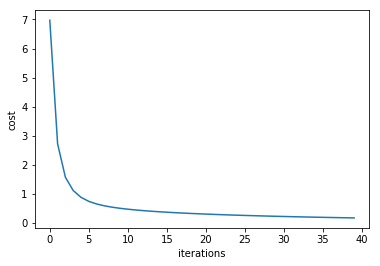

Train accuracy: 0.9877142857142858
Test accuracy: 0.9286666666666666


In [7]:
topo = [400, 25, 10]
learning_rate = 1
iterations = 2000
optimize = ryan_gd(X_train, Y_train, topo, learning_rate, iterations)

_, _, accuracy = ryan_softmax_predict(X_train, Y_train1, optimize)
_, _, accuracy1 = ryan_softmax_predict(X_test, Y_test, optimize)
print("Train accuracy: " + str(accuracy))
print("Test accuracy: " + str(accuracy1))

In [8]:
_, _, accuracy = ryan_softmax_predict(X_test, Y_test, optimize)
print("Best accuracy: " + str(accuracy))

Best accuracy: 0.9286666666666666
